# ABHYAZ Evaluation Portfolio Submission Tasks:

M Naseemunisa

Data Science:   https://www.nirfindia.org/2021/EngineeringRanking.html

Given is the link to NIRF ranked institutes  in 2021. 
Pick up the ranking of top 5 institutes, the related data for these institutes is available. 
Perform an analysis of these 5 institutes.

Data points of interest are: 
 * Intake / Graduating students
 * Placements / Higher studies
 * Funding received  
 * Spending pattern
    

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import plotly.graph_objects as go

In [2]:
import sys
import os 

from scipy.stats import kurtosis, skew  # explore statistics of numerical values
from scipy import stats

In [3]:
!pip install tabula-py

**IIT MADRAS**

In [4]:

import tabula

nirf1 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/IR-E-U-0456.pdf', pages='all')
nirf1_2 = nirf1[2]
nirf1_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              466   
1       2015-16                                              466   
2       2016-17                                              466   

   No. of first year\rstudents admitted in\rthe year Academic Year.1  \
0                                                441         2015-16   
1                                                458         2016-17   
2                                                465         2017-18   

   No. of students\radmitted through\rLateral entry Academic Year.2  \
0                                                 0         2017-18   
1                                                 0         2018-19   
2                                                 0         2019-20   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                334          
1                                                362          
2                                                374          

   No. of students\rplaced  \
0                      283   
1                      268   
2                      286   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0              1306000(Thirteen\rlakhs six thousand)    
1            1360000(Thirteen\rLakhs Sixty thousand)    
2                             1500000(Fifteen lakhs)    

   No. of students\rselected for Higher\rStudies  
0                                             51  
1                                             65  
2                                             43

In [5]:
nirf1_2.shape

(3, 10)

In [6]:
nirf1_2.columns.values

array(['Academic Year', 'No. of first year\rstudents intake in the\ryear',
       'No. of first year\rstudents admitted in\rthe year',
       'Academic Year.1',
       'No. of students\radmitted through\rLateral entry',
       'Academic Year.2',
       'No. of students\rgraduating in\rminimum stipulated\rtime',
       'No. of students\rplaced',
       'Median salary of\rplaced\rgraduates(Amount in\rRs.)',
       'No. of students\rselected for Higher\rStudies'], dtype=object)

In [7]:
nirf1_2.info

<bound method DataFrame.info of   Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              466   
1       2015-16                                              466   
2       2016-17                                              466   

   No. of first year\rstudents admitted in\rthe year Academic Year.1  \
0                                                441         2015-16   
1                                                458         2016-17   
2                                                465         2017-18   

   No. of students\radmitted through\rLateral entry Academic Year.2  \
0                                                 0         2017-18   
1                                                 0         2018-19   
2                                                 0         2019-20   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                334      

In [8]:
# Dropping unneccesary columns

cols = ['Academic Year.1', 'Academic Year.2']
nirf1_2 = nirf1_2.drop(cols, 1)
nirf1_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              466   
1       2015-16                                              466   
2       2016-17                                              466   

   No. of first year\rstudents admitted in\rthe year  \
0                                                441   
1                                                458   
2                                                465   

   No. of students\radmitted through\rLateral entry  \
0                                                 0   
1                                                 0   
2                                                 0   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                334          
1                                                362          
2                                                374          

   No. of students\rplaced  \
0                      283   
1                      268   
2                      286   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0              1306000(Thirteen\rlakhs six thousand)    
1            1360000(Thirteen\rLakhs Sixty thousand)    
2                             1500000(Fifteen lakhs)    

   No. of students\rselected for Higher\rStudies  
0                                             51  
1                                             65  
2                                             43

In [9]:
nirf1_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
nirf1_2

Academic Year  No. of first year students intake in the year  \
0       2014-15                                            466   
1       2015-16                                            466   
2       2016-17                                            466   

   No. of first year students admitted in the year  \
0                                              441   
1                                              458   
2                                              465   

   No. of students admitted through Lateral entry  \
0                                               0   
1                                               0   
2                                               0   

   No. of students graduating in minimum stipulated time  \
0                                                334       
1                                                362       
2                                                374       

   No. of students placed Median salary of placed graduates(Amount inRs.)  \
0                     283           1306000(Thirteen\rlakhs six thousand)   
1                     268         1360000(Thirteen\rLakhs Sixty thousand)   
2                     286                          1500000(Fifteen lakhs)   

   No. of students selected for Higher Studies  
0                                           51  
1                                           65  
2                                           43

In [10]:
nirf1_2.isnull().any()

Academic Year                                            False
No. of first year students intake in the year            False
No. of first year students admitted in the year          False
No. of students admitted through Lateral entry           False
No. of students graduating in minimum stipulated time    False
No. of students placed                                   False
Median salary of placed graduates(Amount inRs.)          False
No. of students selected for Higher Studies              False
dtype: bool

In [11]:
nirf1_2.isnull().sum()

Academic Year                                            0
No. of first year students intake in the year            0
No. of first year students admitted in the year          0
No. of students admitted through Lateral entry           0
No. of students graduating in minimum stipulated time    0
No. of students placed                                   0
Median salary of placed graduates(Amount inRs.)          0
No. of students selected for Higher Studies              0
dtype: int64

In [12]:
nirf1_2.duplicated().sum()

0

In [13]:
nirf1_2.skew(axis=0)

No. of first year students intake in the year            0.000000
No. of first year students admitted in the year         -1.126683
No. of students admitted through Lateral entry           0.000000
No. of students graduating in minimum stipulated time   -1.090291
No. of students placed                                  -1.545393
No. of students selected for Higher Studies              0.782152
dtype: float64

In [14]:
nirf1_2_cat = nirf1_2.select_dtypes(include = ['object'])
nirf1catcolumns = list(nirf1_2_cat.columns.values)
print("Categorical Column = " ,nirf1catcolumns)

Categorical Column =  ['Academic Year', 'Median salary of placed graduates(Amount inRs.)']


In [15]:
nirf1_2_n = nirf1_2.select_dtypes(include = ['float64', 'int64'])
nirf1numericcolumns = list(nirf1_2_n.columns.values)
print("Total Numerical Columns = ",len(nirf1numericcolumns))

Total Numerical Columns =  6


In [16]:
nirf1_2_n.columns

Index(['No. of first year students intake in the year',
       'No. of first year students admitted in the year',
       'No. of students admitted through Lateral entry',
       'No. of students graduating in minimum stipulated time',
       'No. of students placed',
       'No. of students selected for Higher Studies'],
      dtype='object')

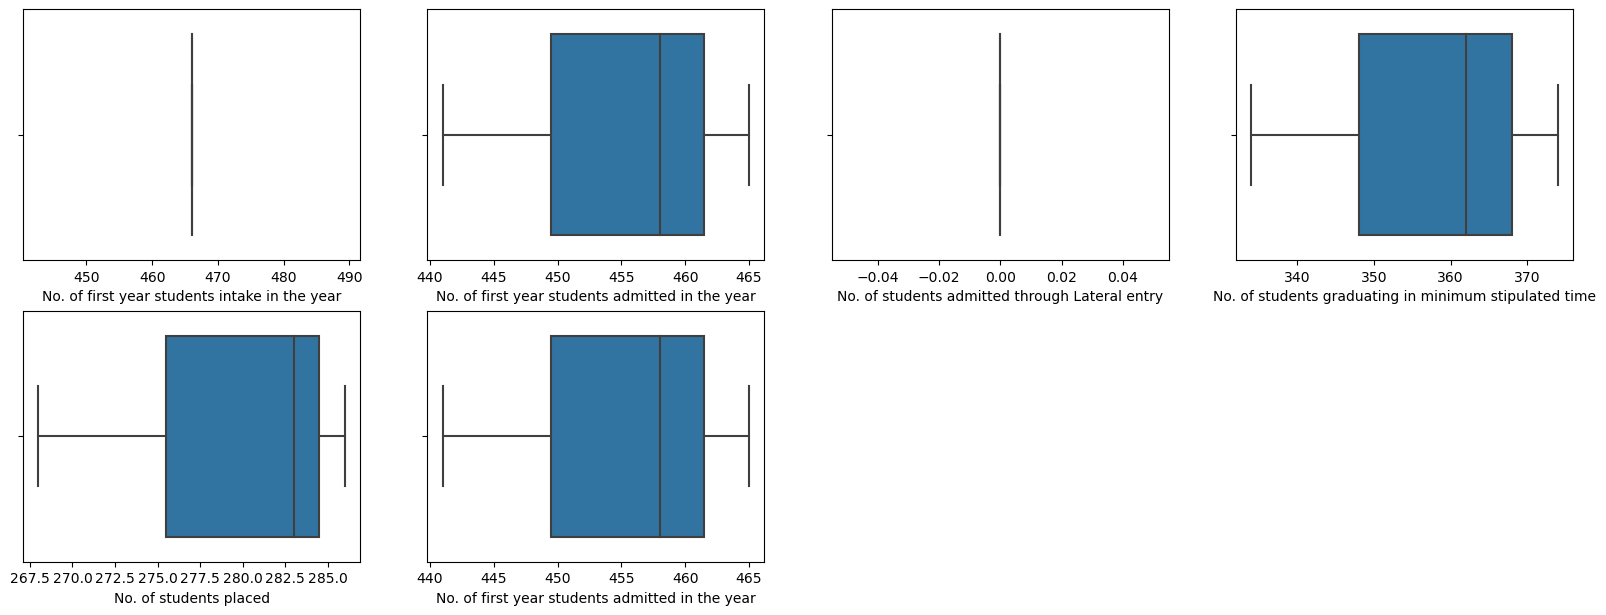

In [17]:
# to check outliers

plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(nirf1_2['No. of first year students intake in the year']);

plt.subplot(4,4,2)
sns.boxplot(nirf1_2['No. of first year students admitted in the year']);

plt.subplot(4,4,3)
sns.boxplot(nirf1_2['No. of students admitted through Lateral entry']);

plt.subplot(4,4,4)
sns.boxplot(nirf1_2['No. of students graduating in minimum stipulated time']);

plt.subplot(4,4,5)
sns.boxplot(nirf1_2['No. of students placed']);

plt.subplot(4,4,6)
sns.boxplot(nirf1_2['No. of first year students admitted in the year']);

In [18]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(nirf1_2_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(nirf1_2_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=nirf1_2_n[column],color='y')
    plt.show()

Description of No. of first year students intake in the year
----------------------------------------------------------------------------
count      3.0
mean     466.0
std        0.0
min      466.0
25%      466.0
50%      466.0
75%      466.0
max      466.0
Name: No. of first year students intake in the year, dtype: float64 

Distribution of No. of first year students intake in the year
----------------------------------------------------------------------------


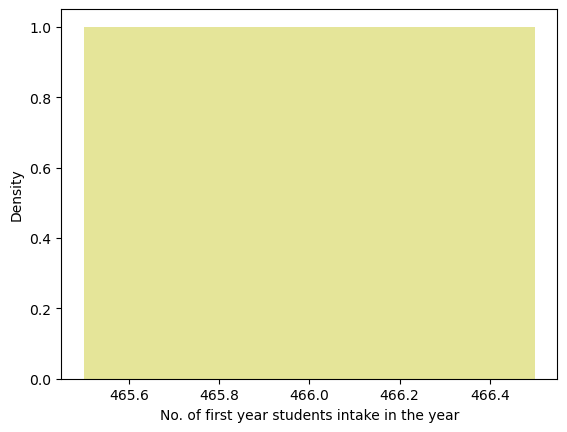

BoxPlot of No. of first year students intake in the year
----------------------------------------------------------------------------


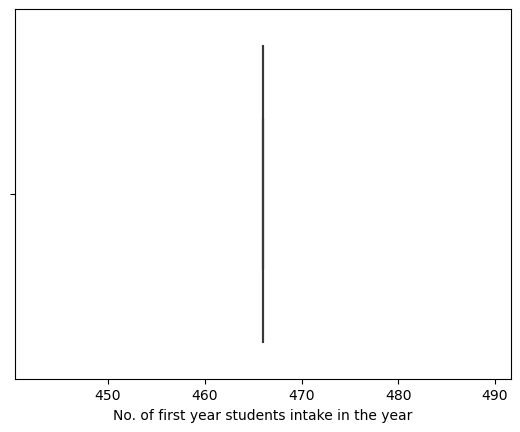

Description of No. of first year students admitted in the year
----------------------------------------------------------------------------
count      3.000000
mean     454.666667
std       12.342339
min      441.000000
25%      449.500000
50%      458.000000
75%      461.500000
max      465.000000
Name: No. of first year students admitted in the year, dtype: float64 

Distribution of No. of first year students admitted in the year
----------------------------------------------------------------------------


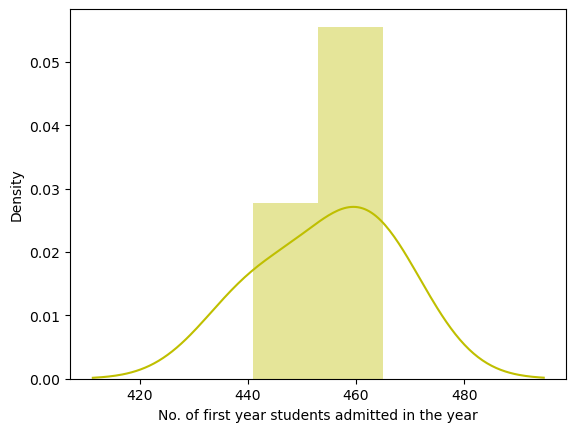

BoxPlot of No. of first year students admitted in the year
----------------------------------------------------------------------------


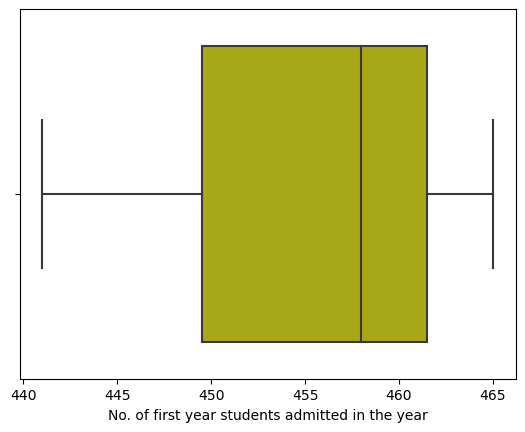

Description of No. of students admitted through Lateral entry
----------------------------------------------------------------------------
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: No. of students admitted through Lateral entry, dtype: float64 

Distribution of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


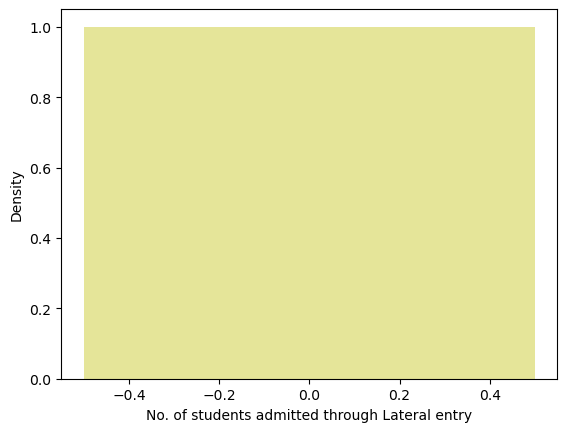

BoxPlot of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


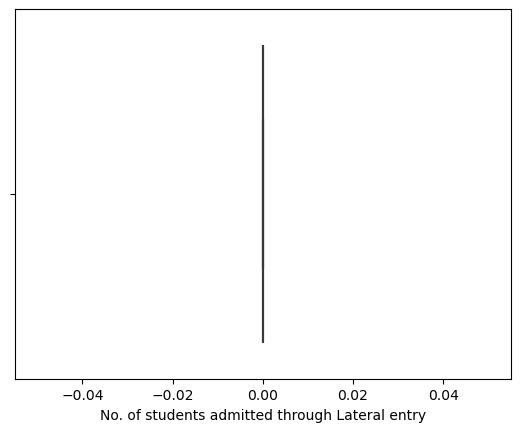

Description of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------
count      3.000000
mean     356.666667
std       20.526406
min      334.000000
25%      348.000000
50%      362.000000
75%      368.000000
max      374.000000
Name: No. of students graduating in minimum stipulated time, dtype: float64 

Distribution of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


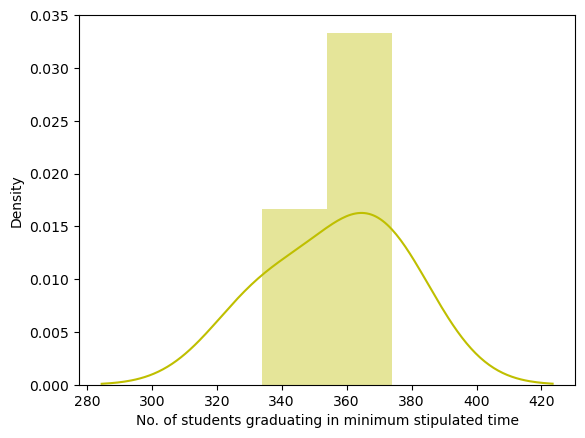

BoxPlot of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


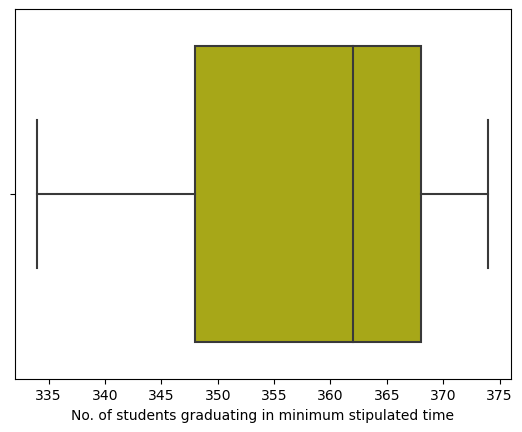

Description of No. of students placed
----------------------------------------------------------------------------
count      3.000000
mean     279.000000
std        9.643651
min      268.000000
25%      275.500000
50%      283.000000
75%      284.500000
max      286.000000
Name: No. of students placed, dtype: float64 

Distribution of No. of students placed
----------------------------------------------------------------------------


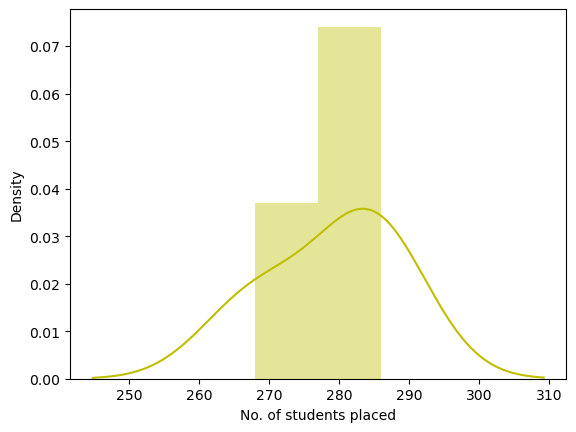

BoxPlot of No. of students placed
----------------------------------------------------------------------------


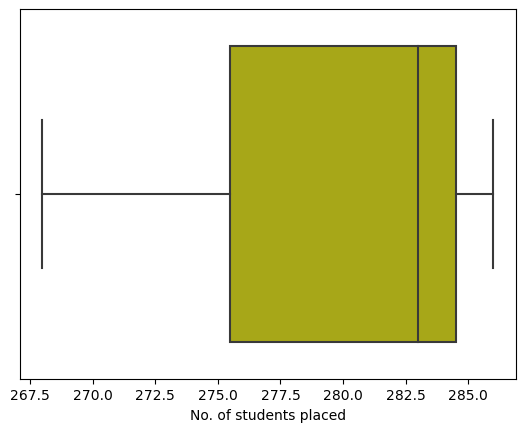

Description of No. of students selected for Higher Studies
----------------------------------------------------------------------------
count     3.000000
mean     53.000000
std      11.135529
min      43.000000
25%      47.000000
50%      51.000000
75%      58.000000
max      65.000000
Name: No. of students selected for Higher Studies, dtype: float64 

Distribution of No. of students selected for Higher Studies
----------------------------------------------------------------------------


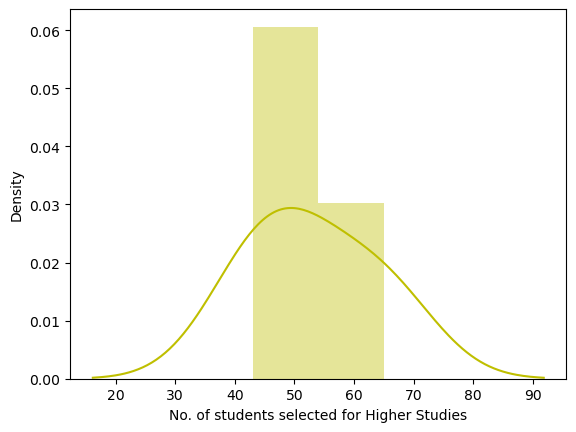

BoxPlot of No. of students selected for Higher Studies
----------------------------------------------------------------------------


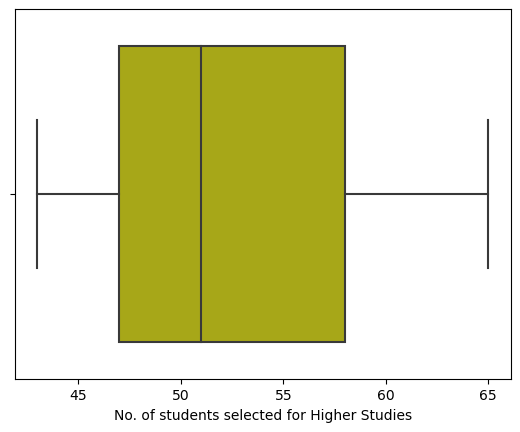

In [19]:
for x in nirf1numericcolumns:
    univariateAnalysis_numeric(x,10)

In [20]:
for column in nirf1_2.columns:
    if nirf1_2[column].dtype == 'object':
        print(column.upper(),': ',nirf1_2[column].nunique())
        print(nirf1_2[column].value_counts().sort_values())
        print('\n')

ACADEMIC YEAR :  3
2014-15    1
2015-16    1
2016-17    1
Name: Academic Year, dtype: int64


MEDIAN SALARY OF PLACED GRADUATES(AMOUNT INRS.) :  3
1306000(Thirteen\rlakhs six thousand)      1
1360000(Thirteen\rLakhs Sixty thousand)    1
1500000(Fifteen lakhs)                     1
Name: Median salary of placed graduates(Amount inRs.), dtype: int64




**DATA VISUALIZATION & ANALYSIS**

In [21]:
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = 8, 5
pd.options.plotting.backend = "plotly"

In [22]:
fig = nirf1_2.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

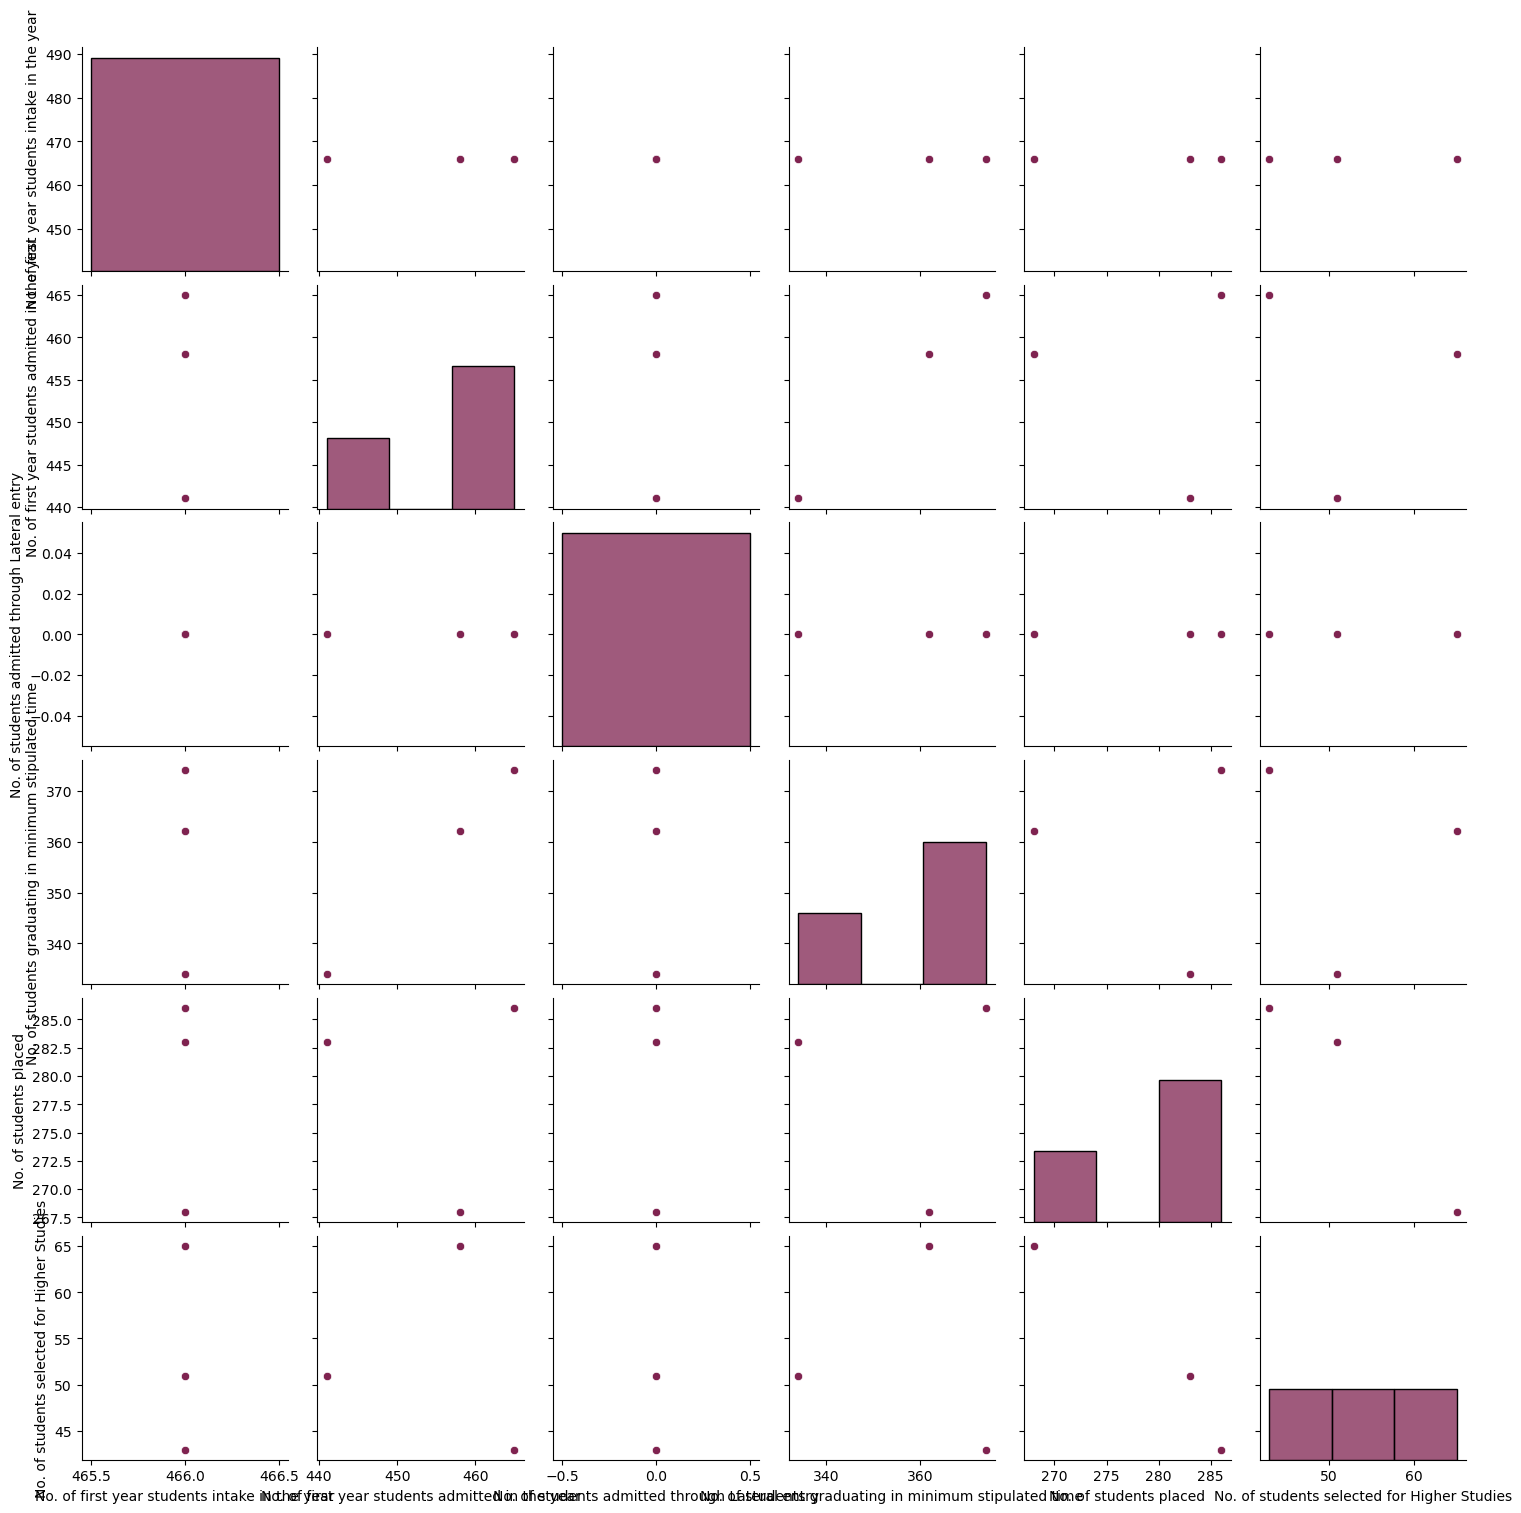

In [23]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(nirf1_2)

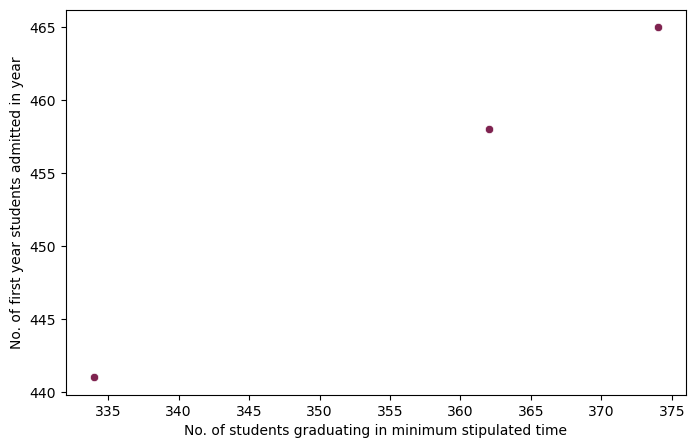

In [24]:
# No. of first year students admitted in year VS No. of students graduating in minimum stipulated time

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=nirf1_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

Positive collinearity between the aforementioned two characteristics is evident, as may be seen.

In other words, as the number of first-year students admitted each year increased, so did the number of students who graduated within the minimum amount of time, which was likewise to be expected.

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

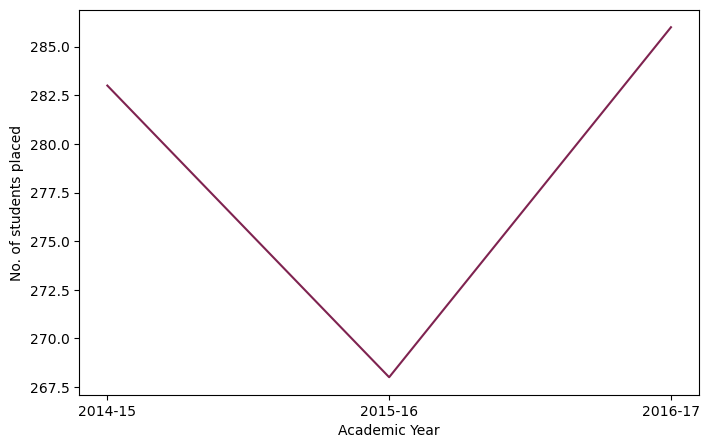

In [25]:
# No. of students placed VS Academic Year

sns.lineplot(data=nirf1_2, y='No. of students placed', x='Academic Year')

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

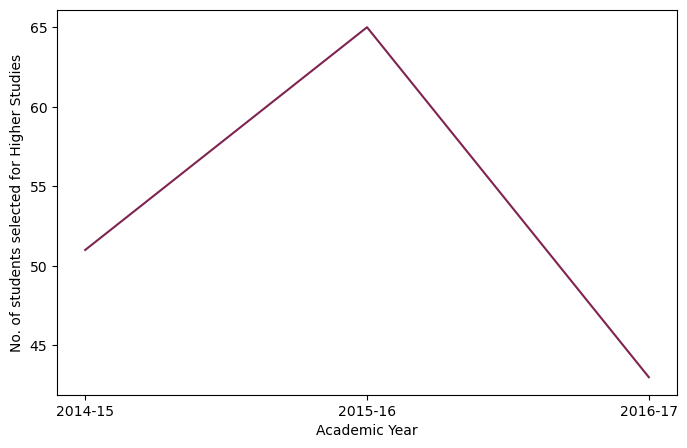

In [26]:
# No. of students selected for Higher Studies VS Academic Year

sns.lineplot(data=nirf1_2, y='No. of students selected for Higher Studies', x='Academic Year')

Comparing this to the previous graph, we can observe that the number of students chosen for higher education was significantly higher in the academic year 2015–16 than it was in the previous two. As a result, placements decreased that year as well. (Supply to analytical question posed above)

In [27]:
# Funding details.

nirf1_3 = nirf1[11]
nirf1_3 

Financial Year  \
0           Total no. of Sponsored Projects   
1             Total no. of Funding Agencies   
2  Total Amount Received (Amount in Rupees)   
3                  Amount Received in Words   

                                             2019-20  \
0                                                612   
1                                                104   
2                                         3903460211   
3  Three Hundred and Ninety Crore Thirty four lak...   

                                             2018-19  \
0                                                580   
1                                                 69   
2                                         5223395988   
3  Five hundred and Twenty Two Crore Thirty Three...   

                                             2017-18  
0                                                579  
1                                                 88  
2                                         3177083996  
3  Three hundred and Seventeen Crore Seventy lakh...

In [28]:
# set relevant column names

nirf1_3  = nirf1_3.transpose()
nirf1_3.reset_index(inplace=True)
nirf1_3.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
nirf1_3 

Financial Year  Total no. of Sponsored Projects  \
0  Financial Year  Total no. of Sponsored Projects   
1         2019-20                              612   
2         2018-19                              580   
3         2017-18                              579   

   Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  \
0  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)   
1                            104                                3903460211   
2                             69                                5223395988   
3                             88                                3177083996   

                            Amount Received in Words  
0                           Amount Received in Words  
1  Three Hundred and Ninety Crore Thirty four lak...  
2  Five hundred and Twenty Two Crore Thirty Three...  
3  Three hundred and Seventeen Crore Seventy lakh...

In [29]:
# Drop irrelevant rows
nirf1_3 =nirf1_3.drop(0)
nirf1_3 

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             612   
2        2018-19                             580   
3        2017-18                             579   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  \
1                           104                               3903460211   
2                            69                               5223395988   
3                            88                               3177083996   

                            Amount Received in Words  
1  Three Hundred and Ninety Crore Thirty four lak...  
2  Five hundred and Twenty Two Crore Thirty Three...  
3  Three hundred and Seventeen Crore Seventy lakh...

In [30]:
# Drop irrelevant Column
nirf1_3 =nirf1_3.drop(['Amount Received in Words'], axis =1)
nirf1_3 

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             612   
2        2018-19                             580   
3        2017-18                             579   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  
1                           104                               3903460211  
2                            69                               5223395988  
3                            88                               3177083996

In [31]:
# convert Column data type from object to int64

print(nirf1_3.dtypes)
nirf1_3 = nirf1_3.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(nirf1_3.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


In [32]:
nirf1_3.describe

<bound method NDFrame.describe of   Financial Year Total no. of Sponsored Projects  \
1        2019-20                             612   
2        2018-19                             580   
3        2017-18                             579   

  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  
1                           104                                3903460211  
2                            69                                5223395988  
3                            88                                3177083996  >

In [33]:
print("Median : ")
nirf1_3['Total Amount Received (Amount in Rupees)'].median()

Median : 


3903460211.0

In [34]:
print("Maximum : ")
nirf1_3['Total Amount Received (Amount in Rupees)'].max()

Maximum : 


5223395988

In [35]:
print("Minimum : ")
nirf1_3['Total Amount Received (Amount in Rupees)'].min()

Minimum : 


3177083996

Understanding spending trends requires looking at the table "Financial Resources: Utilized Amount for the Capital expenditure for the preceding 3 years."

In [36]:
nirf1_4 = nirf1[9]
nirf1_4

Annual Capital Expenditure on Academic Activities and Resources (excluding expenditure on buildings)  \
0    Library ( Books, Journals and e-Resources only)                                                     
1        New Equipment and software for Laboratories                                                     
2                              Engineering Workshops                                                     
3  Other expenditure on creation of Capital Asset...                                                     

                                          Unnamed: 0  \
0  181223515 (Eighteen Crore Twelve Lakh Twenty T...   
1  1865813663 (One Eighty Six crore Fifty Eight l...   
2  519428 (Five Lakh Ninteen Thousand Four Hundre...   
3  256594552 (Twenty Five Crore Sixty Five Lakh N...   

                                          Unnamed: 1  \
0  174628165 (Seventeen Crore Forty Six Lakh Twen...   
1  2052783456 (Two  hundred and Five crore Twenty...   
2  4157456 (Forty One Lakh Fifty Seven Thousand F...   
3  55256201 (Five Crore Fifty Two Lakh Fifty Six ...   

                                          Unnamed: 2  
0  188456181 (Eighteen Crore Eighty Four Lakh Fif...  
1  1838176237 (One hundred and Eighty Three crore...  
2  6288472 (Sixty Two Lakh Eighty Eight Thousand ...  
3  131891456 (Thirteen Crore Eighteen Lakh Ninety...

In [37]:
nirf1_4 = nirf1_4.transpose()
nirf1_4

0  \
Annual Capital Expenditure on Academic Activiti...    Library ( Books, Journals and e-Resources only)   
Unnamed: 0                                          181223515 (Eighteen Crore Twelve Lakh Twenty T...   
Unnamed: 1                                          174628165 (Seventeen Crore Forty Six Lakh Twen...   
Unnamed: 2                                          188456181 (Eighteen Crore Eighty Four Lakh Fif...   

                                                                                                    1  \
Annual Capital Expenditure on Academic Activiti...        New Equipment and software for Laboratories   
Unnamed: 0                                          1865813663 (One Eighty Six crore Fifty Eight l...   
Unnamed: 1                                          2052783456 (Two  hundred and Five crore Twenty...   
Unnamed: 2                                          1838176237 (One hundred and Eighty Three crore...   

                                                                                                    2  \
Annual Capital Expenditure on Academic Activiti...                              Engineering Workshops   
Unnamed: 0                                          519428 (Five Lakh Ninteen Thousand Four Hundre...   
Unnamed: 1                                          4157456 (Forty One Lakh Fifty Seven Thousand F...   
Unnamed: 2                                          6288472 (Sixty Two Lakh Eighty Eight Thousand ...   

                                                                                                    3  
Annual Capital Expenditure on Academic Activiti...  Other expenditure on creation of Capital Asset...  
Unnamed: 0                                          256594552 (Twenty Five Crore Sixty Five Lakh N...  
Unnamed: 1                                          55256201 (Five Crore Fifty Two Lakh Fifty Six ...  
Unnamed: 2                                          131891456 (Thirteen Crore Eighteen Lakh Ninety...

In [38]:
# Set columns & reset indices
nirf1_4.columns = ['Library', 'Software & Equipment', 'Eng Workshop', 'Others']
nirf1_4.reset_index(drop = True, inplace=True)

In [39]:
nirf1_4 = nirf1_4.drop(0) # Drop irrelevant row

In [40]:
# Add the Financial Column Back

fin_yr = ['2019-20', '2018-19', '2017-18']
nirf1_4['Financial Year'] = fin_yr

In [41]:
nirf1_4['Library'] = nirf1_4['Library'].str.replace('\d+', '')
nirf1_4['Software & Equipment'] = nirf1_4['Software & Equipment'].str.replace('\d+', '')
nirf1_4['Eng Workshop'] = nirf1_4['Eng Workshop'].str.replace('\d+', '')
nirf1_4['Others'] = nirf1_4['Others'].str.replace('\d+', '')

In [42]:
nirf1_4

Library  \
1   (Eighteen Crore Twelve Lakh Twenty Three\rTho...   
2   (Seventeen Crore Forty Six Lakh Twenty Eight\...   
3   (Eighteen Crore Eighty Four Lakh Fifty Six\rT...   

                                Software & Equipment  \
1   (One Eighty Six crore Fifty Eight lakhs Thirt...   
2   (Two  hundred and Five crore Twenty Seven\rla...   
3   (One hundred and Eighty Three crore Eighty on...   

                                        Eng Workshop  \
1   (Five Lakh Ninteen Thousand Four Hundred Twen...   
2   (Forty One Lakh Fifty Seven Thousand Four Hun...   
3   (Sixty Two Lakh Eighty Eight Thousand Four Hu...   

                                              Others Financial Year  
1   (Twenty Five Crore Sixty Five Lakh Ninety Fou...        2019-20  
2   (Five Crore Fifty Two Lakh Fifty Six Thousand...        2018-19  
3   (Thirteen Crore Eighteen Lakh Ninety One\rTho...        2017-18

**IIT DELHI**

In [43]:
import tabula

nirf2 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/IR-E-I-1074.pdf', pages='all')
nirf2_2 = nirf2[2]
nirf2_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              749   
1       2015-16                                              749   
2       2016-17                                              749   

   No. of first year\rstudents admitted in\rthe year Academic Year.1  \
0                                                759         2015-16   
1                                                759         2016-17   
2                                                751         2017-18   

   No. of students\radmitted through\rLateral entry Academic Year.2  \
0                                                 0         2017-18   
1                                                 0         2018-19   
2                                                 0         2019-20   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                654          
1                                                615          
2                                                650          

   No. of students\rplaced  \
0                      431   
1                      495   
2                      511   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0          1306000(Thirteen Lakh\rSix Thousand Only)    
1      1570000(Fifteen Lakh\rSeventy Thousand\rOnly)    
2         1550000(Fifteen Lakh\rFifty Thousand Only)    

   No. of students\rselected for Higher\rStudies  
0                                             70  
1                                             78  
2                                             90

In [44]:
nirf2_2.shape

(3, 10)

In [45]:
nirf2_2.columns.values

array(['Academic Year', 'No. of first year\rstudents intake in the\ryear',
       'No. of first year\rstudents admitted in\rthe year',
       'Academic Year.1',
       'No. of students\radmitted through\rLateral entry',
       'Academic Year.2',
       'No. of students\rgraduating in\rminimum stipulated\rtime',
       'No. of students\rplaced',
       'Median salary of\rplaced\rgraduates(Amount in\rRs.)',
       'No. of students\rselected for Higher\rStudies'], dtype=object)

In [46]:
# Dropping unneccesary columns

cols = ['Academic Year.1', 'Academic Year.2']
nirf2_2 = nirf2_2.drop(cols, 1)
nirf2_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              749   
1       2015-16                                              749   
2       2016-17                                              749   

   No. of first year\rstudents admitted in\rthe year  \
0                                                759   
1                                                759   
2                                                751   

   No. of students\radmitted through\rLateral entry  \
0                                                 0   
1                                                 0   
2                                                 0   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                654          
1                                                615          
2                                                650          

   No. of students\rplaced  \
0                      431   
1                      495   
2                      511   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0          1306000(Thirteen Lakh\rSix Thousand Only)    
1      1570000(Fifteen Lakh\rSeventy Thousand\rOnly)    
2         1550000(Fifteen Lakh\rFifty Thousand Only)    

   No. of students\rselected for Higher\rStudies  
0                                             70  
1                                             78  
2                                             90

In [47]:
nirf2_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
nirf2_2

Academic Year  No. of first year students intake in the year  \
0       2014-15                                            749   
1       2015-16                                            749   
2       2016-17                                            749   

   No. of first year students admitted in the year  \
0                                              759   
1                                              759   
2                                              751   

   No. of students admitted through Lateral entry  \
0                                               0   
1                                               0   
2                                               0   

   No. of students graduating in minimum stipulated time  \
0                                                654       
1                                                615       
2                                                650       

   No. of students placed Median salary of placed graduates(Amount inRs.)  \
0                     431       1306000(Thirteen Lakh\rSix Thousand Only)   
1                     495   1570000(Fifteen Lakh\rSeventy Thousand\rOnly)   
2                     511      1550000(Fifteen Lakh\rFifty Thousand Only)   

   No. of students selected for Higher Studies  
0                                           70  
1                                           78  
2                                           90

In [48]:
nirf2_2.isna()

Academic Year  No. of first year students intake in the year  \
0          False                                          False   
1          False                                          False   
2          False                                          False   

   No. of first year students admitted in the year  \
0                                            False   
1                                            False   
2                                            False   

   No. of students admitted through Lateral entry  \
0                                           False   
1                                           False   
2                                           False   

   No. of students graduating in minimum stipulated time  \
0                                              False       
1                                              False       
2                                              False       

   No. of students placed  Median salary of placed graduates(Amount inRs.)  \
0                   False                                            False   
1                   False                                            False   
2                   False                                            False   

   No. of students selected for Higher Studies  
0                                        False  
1                                        False  
2                                        False

In [49]:
nirf2_2.dropna(inplace=True)

In [50]:
nirf2_2.isnull().any()

Academic Year                                            False
No. of first year students intake in the year            False
No. of first year students admitted in the year          False
No. of students admitted through Lateral entry           False
No. of students graduating in minimum stipulated time    False
No. of students placed                                   False
Median salary of placed graduates(Amount inRs.)          False
No. of students selected for Higher Studies              False
dtype: bool

In [51]:
nirf2_2.isnull().sum()

Academic Year                                            0
No. of first year students intake in the year            0
No. of first year students admitted in the year          0
No. of students admitted through Lateral entry           0
No. of students graduating in minimum stipulated time    0
No. of students placed                                   0
Median salary of placed graduates(Amount inRs.)          0
No. of students selected for Higher Studies              0
dtype: int64

In [52]:
nirf2_2.duplicated().sum()

0

In [53]:
nirf2_2.skew(axis=0)

No. of first year students intake in the year            0.000000
No. of first year students admitted in the year         -1.732051
No. of students admitted through Lateral entry           0.000000
No. of students graduating in minimum stipulated time   -1.664570
No. of students placed                                  -1.457863
No. of students selected for Higher Studies              0.585583
dtype: float64

In [54]:
nirf2_2_cat = nirf2_2.select_dtypes(include = ['object'])
nirf2catcolumns = list(nirf2_2_cat.columns.values)
print("Categorical Column = " ,nirf2catcolumns)

Categorical Column =  ['Academic Year', 'Median salary of placed graduates(Amount inRs.)']


In [55]:
nirf2_2_n = nirf2_2.select_dtypes(include = ['float64', 'int64'])
nirf2numericcolumns = list(nirf2_2_n.columns.values)
print("Total Numerical Columns = ",len(nirf2numericcolumns))


Total Numerical Columns =  6


In [56]:
nirf2_2_n.columns

Index(['No. of first year students intake in the year',
       'No. of first year students admitted in the year',
       'No. of students admitted through Lateral entry',
       'No. of students graduating in minimum stipulated time',
       'No. of students placed',
       'No. of students selected for Higher Studies'],
      dtype='object')

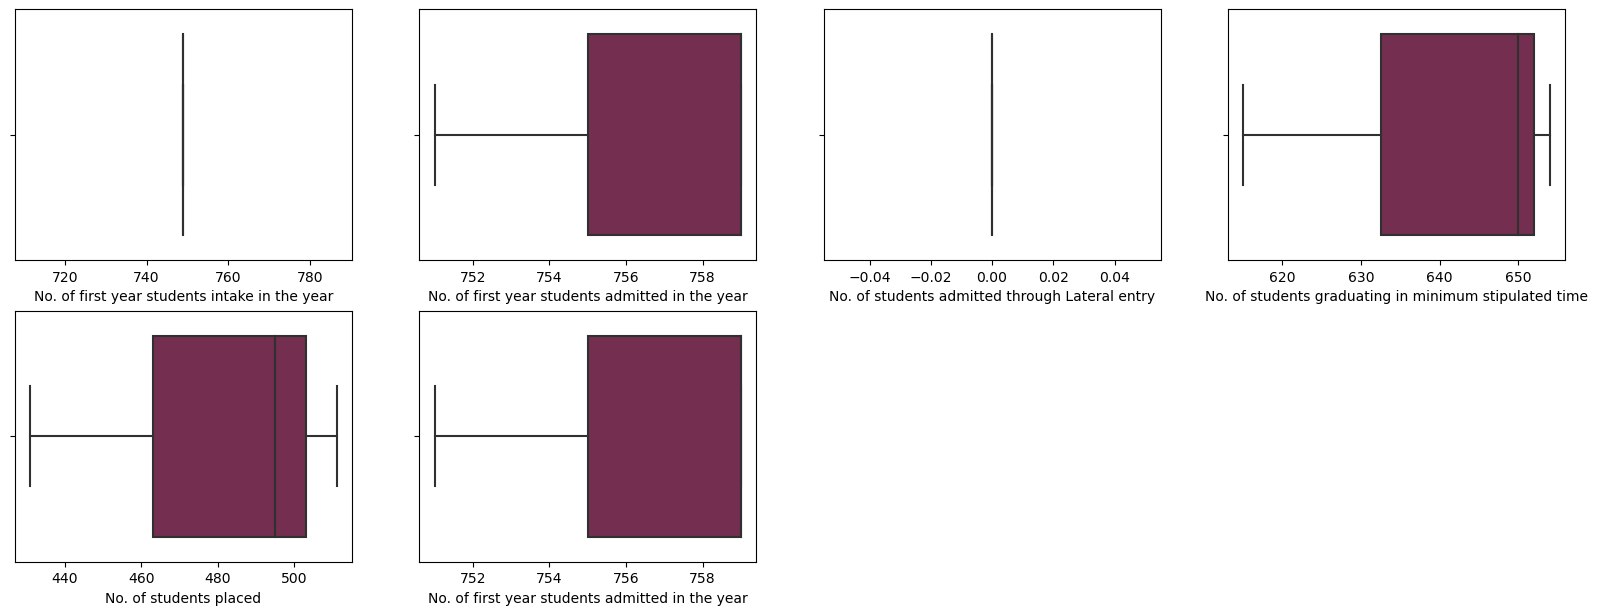

In [57]:
# to check outliers

plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(nirf2_2['No. of first year students intake in the year']);

plt.subplot(4,4,2)
sns.boxplot(nirf2_2['No. of first year students admitted in the year']);

plt.subplot(4,4,3)
sns.boxplot(nirf2_2['No. of students admitted through Lateral entry']);

plt.subplot(4,4,4)
sns.boxplot(nirf2_2['No. of students graduating in minimum stipulated time']);

plt.subplot(4,4,5)
sns.boxplot(nirf2_2['No. of students placed']);

plt.subplot(4,4,6)
sns.boxplot(nirf2_2['No. of first year students admitted in the year']);

In [58]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(nirf2_2_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(nirf2_2_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=nirf2_2_n[column],color='y')
    plt.show()

Description of No. of first year students intake in the year
----------------------------------------------------------------------------
count      3.0
mean     749.0
std        0.0
min      749.0
25%      749.0
50%      749.0
75%      749.0
max      749.0
Name: No. of first year students intake in the year, dtype: float64 

Distribution of No. of first year students intake in the year
----------------------------------------------------------------------------


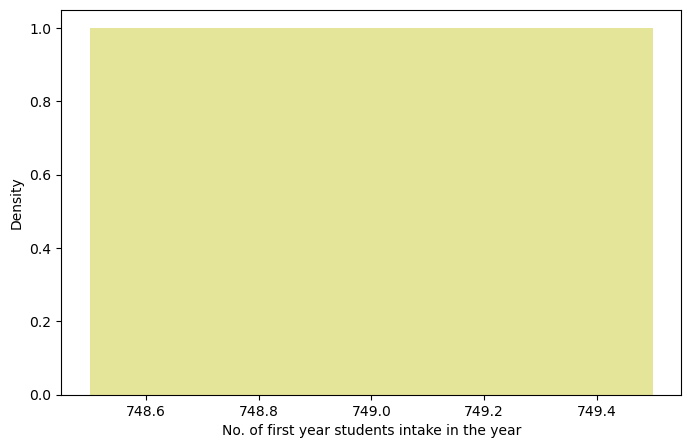

BoxPlot of No. of first year students intake in the year
----------------------------------------------------------------------------


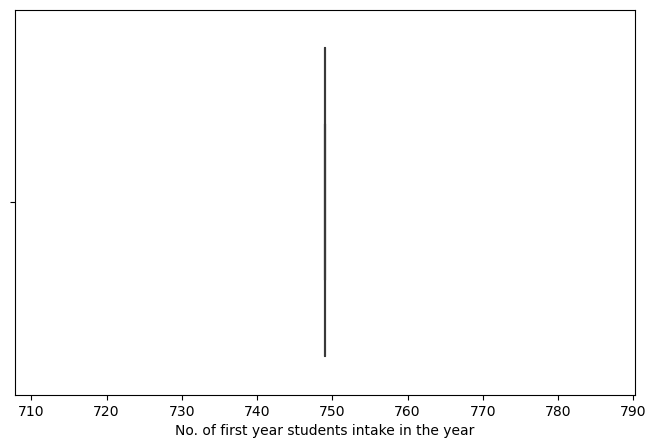

Description of No. of first year students admitted in the year
----------------------------------------------------------------------------
count      3.000000
mean     756.333333
std        4.618802
min      751.000000
25%      755.000000
50%      759.000000
75%      759.000000
max      759.000000
Name: No. of first year students admitted in the year, dtype: float64 

Distribution of No. of first year students admitted in the year
----------------------------------------------------------------------------


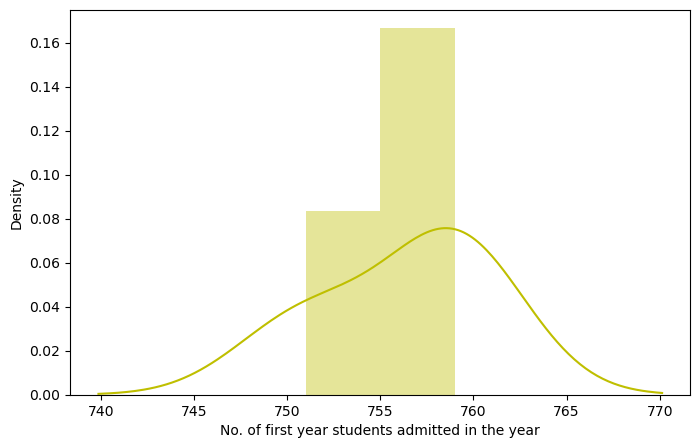

BoxPlot of No. of first year students admitted in the year
----------------------------------------------------------------------------


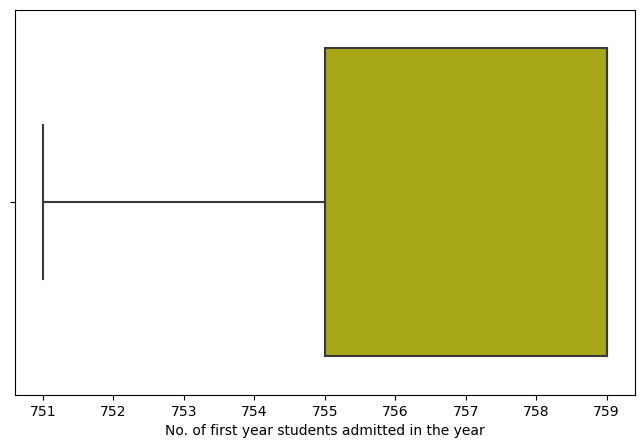

Description of No. of students admitted through Lateral entry
----------------------------------------------------------------------------
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: No. of students admitted through Lateral entry, dtype: float64 

Distribution of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


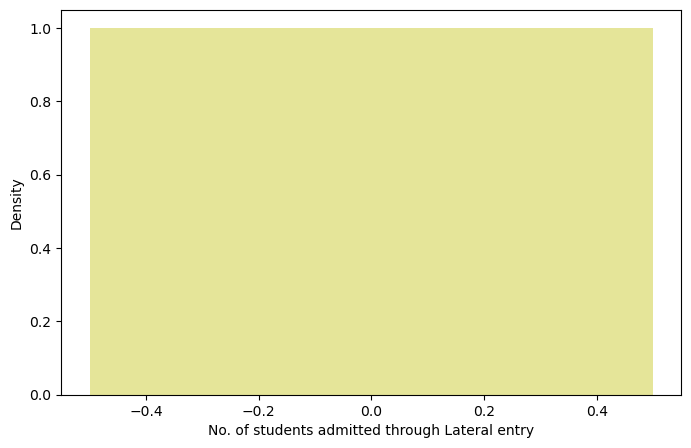

BoxPlot of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


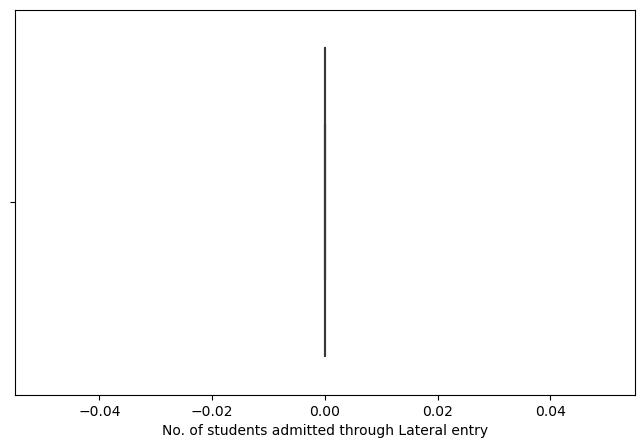

Description of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------
count      3.000000
mean     639.666667
std       21.455380
min      615.000000
25%      632.500000
50%      650.000000
75%      652.000000
max      654.000000
Name: No. of students graduating in minimum stipulated time, dtype: float64 

Distribution of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


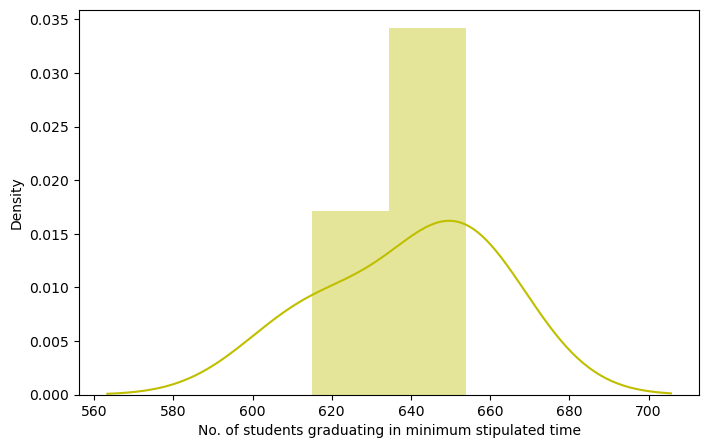

BoxPlot of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


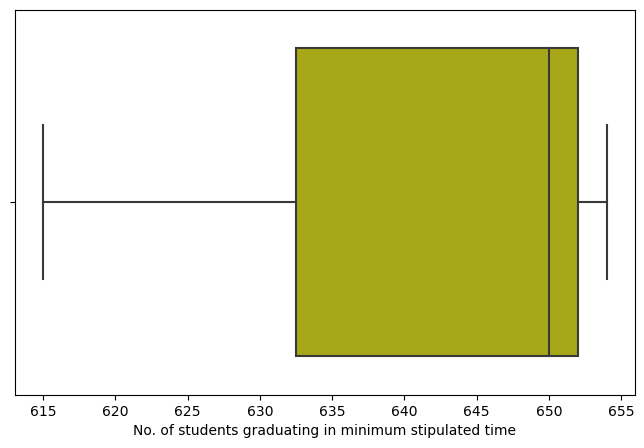

Description of No. of students placed
----------------------------------------------------------------------------
count      3.000000
mean     479.000000
std       42.332021
min      431.000000
25%      463.000000
50%      495.000000
75%      503.000000
max      511.000000
Name: No. of students placed, dtype: float64 

Distribution of No. of students placed
----------------------------------------------------------------------------


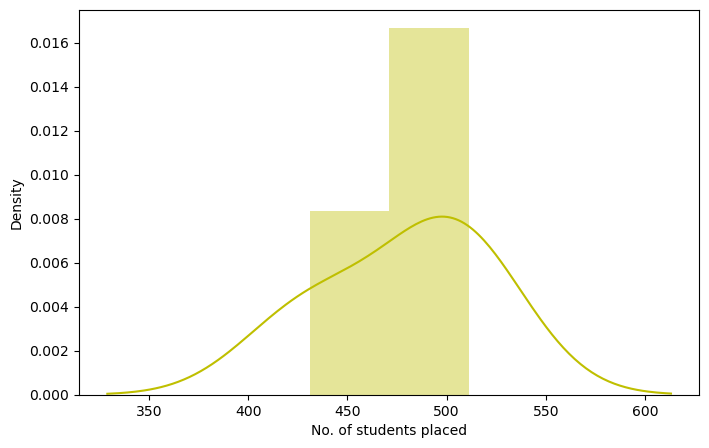

BoxPlot of No. of students placed
----------------------------------------------------------------------------


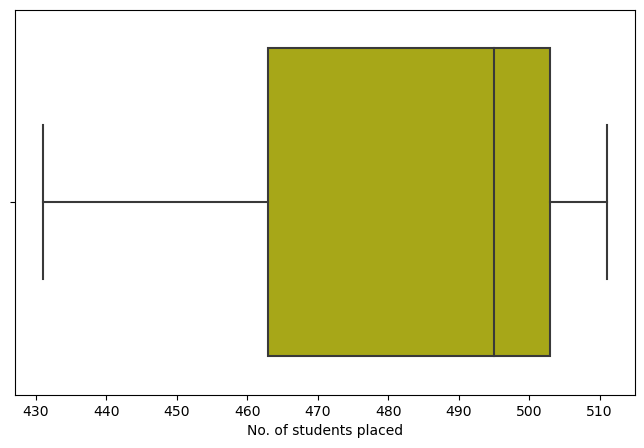

Description of No. of students selected for Higher Studies
----------------------------------------------------------------------------
count     3.000000
mean     79.333333
std      10.066446
min      70.000000
25%      74.000000
50%      78.000000
75%      84.000000
max      90.000000
Name: No. of students selected for Higher Studies, dtype: float64 

Distribution of No. of students selected for Higher Studies
----------------------------------------------------------------------------


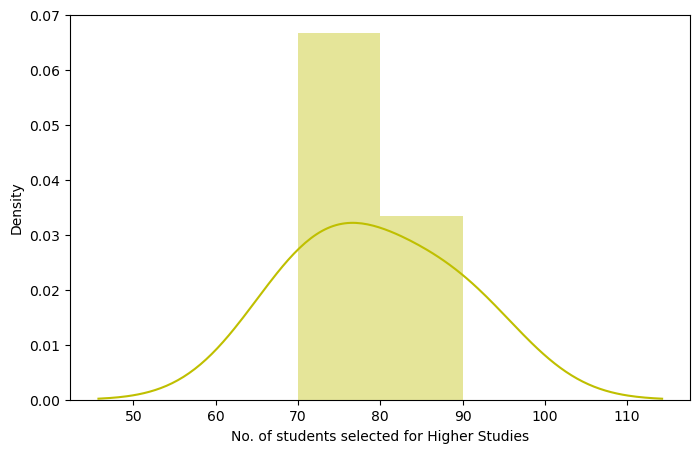

BoxPlot of No. of students selected for Higher Studies
----------------------------------------------------------------------------


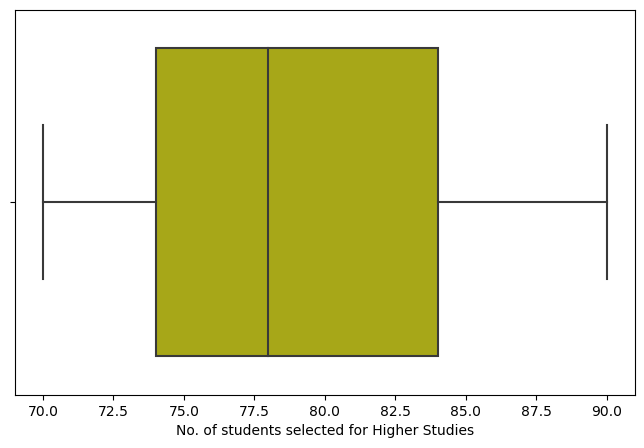

In [59]:
for x in nirf2numericcolumns:
    univariateAnalysis_numeric(x,10)

In [60]:
for column in nirf2_2.columns:
    if nirf2_2[column].dtype == 'object':
        print(column.upper(),': ',nirf2_2[column].nunique())
        print(nirf2_2[column].value_counts().sort_values())
        print('\n')


ACADEMIC YEAR :  3
2014-15    1
2015-16    1
2016-17    1
Name: Academic Year, dtype: int64


MEDIAN SALARY OF PLACED GRADUATES(AMOUNT INRS.) :  3
1306000(Thirteen Lakh\rSix Thousand Only)        1
1570000(Fifteen Lakh\rSeventy Thousand\rOnly)    1
1550000(Fifteen Lakh\rFifty Thousand Only)       1
Name: Median salary of placed graduates(Amount inRs.), dtype: int64




DATA VISUALIZATION & ANALYSIS

In [61]:
fig = nirf2_2.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

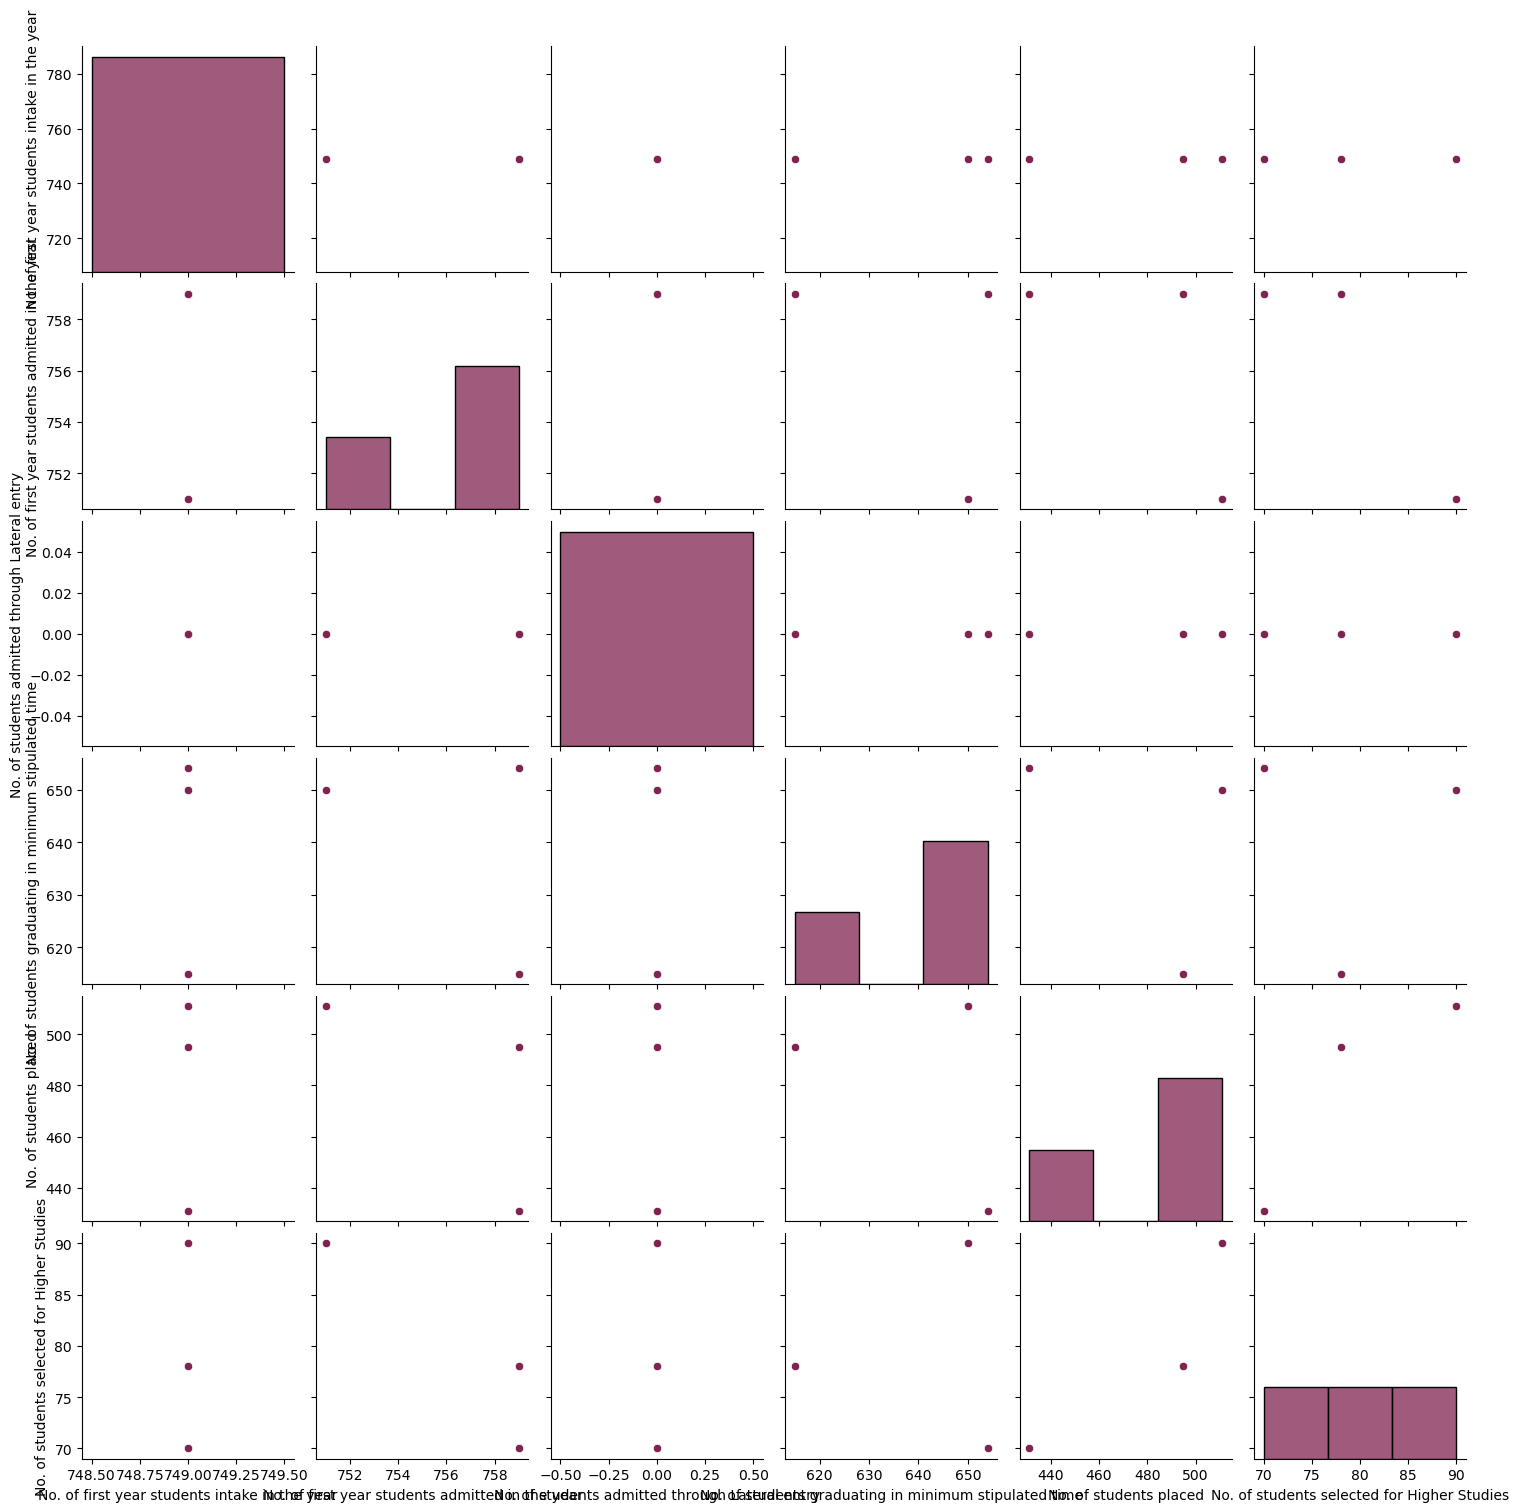

In [62]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(nirf2_2)

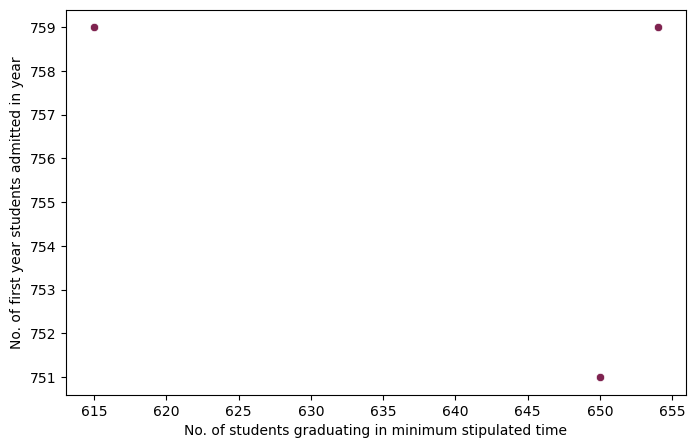

In [63]:
#  No. of first year students admitted in year VS No. of students graduating in minimum stipulated time

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=nirf2_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

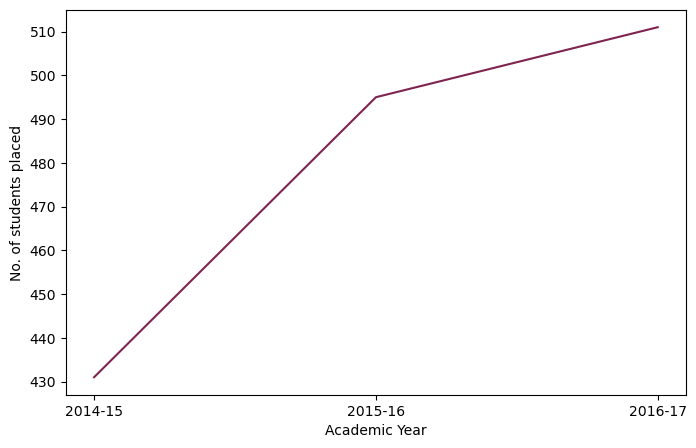

In [64]:
#  No. of students placed VS Academic Year

sns.lineplot(data=nirf2_2, y='No. of students placed', x='Academic Year')

As previously shown, it appears that the two traits have a positive linear relationship.

However, what we can observe is that there was a rise in placements during the 2015–16 school year, which may be related to some underlying explanation (to which we have an answer in the below visualization).

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

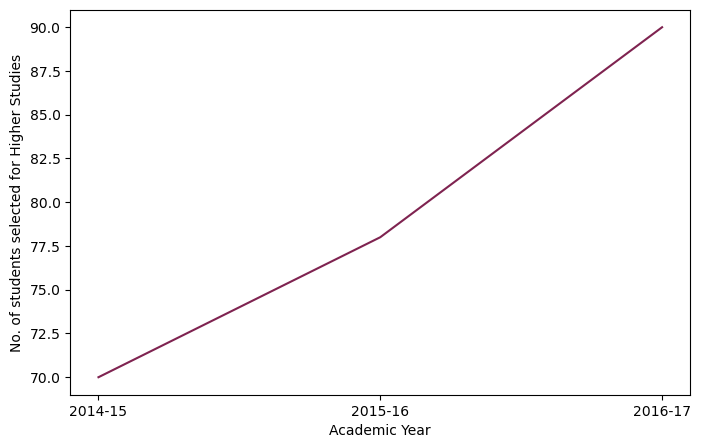

In [65]:
# No. of students selected for Higher Studies VS Academic Year

sns.lineplot(data=nirf2_2, y='No. of students selected for Higher Studies', x='Academic Year')

The number of students chosen for higher education in 2015–16 was lower than in the previous two academic years, showing an inverse trend to the above. Consequently, this led to an increase in placements that same year. (Reply to analysis question posed above

In [66]:
# Funding details.

nirf2_3= nirf2[9]
nirf2_3

Financial Year  \
0           Total no. of Sponsored Projects   
1             Total no. of Funding Agencies   
2  Total Amount Received (Amount in Rupees)   
3                  Amount Received in Words   

                                             2019-20  \
0                                                624   
1                                                195   
2                                         2275026000   
3  Two Hundred Twenty Seven Crore Fifty Lakh Twen...   

                                             2018-19  \
0                                                567   
1                                                140   
2                                         2048965952   
3  Two Hundred Four Crore Eighty Nine Lakh Sixty ...   

                                             2017-18  
0                                                964  
1                                                153  
2                                         5411417468  
3  Five Hundred Forty One Crore Fourteen Lakh\rSe...

In [67]:
#  Transpose the tha dataframe and set relevant column names

nirf2_3 = nirf2_3.transpose()
nirf2_3.reset_index(inplace=True)
nirf2_3.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
nirf2_3

Financial Year  Total no. of Sponsored Projects  \
0  Financial Year  Total no. of Sponsored Projects   
1         2019-20                              624   
2         2018-19                              567   
3         2017-18                              964   

   Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  \
0  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)   
1                            195                                2275026000   
2                            140                                2048965952   
3                            153                                5411417468   

                            Amount Received in Words  
0                           Amount Received in Words  
1  Two Hundred Twenty Seven Crore Fifty Lakh Twen...  
2  Two Hundred Four Crore Eighty Nine Lakh Sixty ...  
3  Five Hundred Forty One Crore Fourteen Lakh\rSe...

In [68]:
#  Drop irrelevant rows

nirf2_3=nirf2_3.drop(0)
nirf2_3

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             624   
2        2018-19                             567   
3        2017-18                             964   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  \
1                           195                               2275026000   
2                           140                               2048965952   
3                           153                               5411417468   

                            Amount Received in Words  
1  Two Hundred Twenty Seven Crore Fifty Lakh Twen...  
2  Two Hundred Four Crore Eighty Nine Lakh Sixty ...  
3  Five Hundred Forty One Crore Fourteen Lakh\rSe...

In [69]:
# Drop irrelevant Column

nirf2_3=nirf2_3.drop(['Amount Received in Words'], axis =1)
nirf2_3

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             624   
2        2018-19                             567   
3        2017-18                             964   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  
1                           195                               2275026000  
2                           140                               2048965952  
3                           153                               5411417468

In [70]:
#  convert Total Amount Received Column data type from object to int64

print(nirf2_3.dtypes)
nirf2_3 = nirf2_3.astype({'Total Amount Received (Amount in Rupees)':'int64'})
print(nirf2_3.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


In [71]:
nirf2_3.describe

<bound method NDFrame.describe of   Financial Year Total no. of Sponsored Projects  \
1        2019-20                             624   
2        2018-19                             567   
3        2017-18                             964   

  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  
1                           195                                2275026000  
2                           140                                2048965952  
3                           153                                5411417468  >

In [72]:
print("Median : ")
nirf2_3['Total Amount Received (Amount in Rupees)'].median()

Median : 


2275026000.0

In [73]:
print("Maximum : ")
nirf2_3['Total Amount Received (Amount in Rupees)'].max()

Maximum : 


5411417468

In [74]:
print("Minimum : ")
nirf2_3['Total Amount Received (Amount in Rupees)'].min()

Minimum : 


2048965952

Understanding spending trends requires looking at the table "Financial Resources: Utilized Amount for the Capital expenditure for the preceding 3 years."

In [75]:
nirf2_7 = nirf2[7]
nirf2_7

Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2019-20  \
0                                    Utilised Amount   
1                                                NaN   
2  170086147 (Seventeen Crore Eighty Six Thousand...   
3  1827027685 (One Hundred Eighty Two Crore Seven...   
4  4058686 (Forty Lakh Fifty Eight Thousand Six H...   
5  745381664 (Seventy Four Crore Fifty Three Lakh...   

                                             2018-19  \
0                                    Utilised Amount   
1                                                NaN   
2  160271963 (Sixteen Crore Two Lakh Seventy One ...   
3  1793766462 (One Hundred Seventy Nine Crore Thi...   
4  4302116 (Forty Three lakh Two Thousand One Hun...   
5  764538188 (Seventy Six Crore Forty five Lakh T...   

                                             2017-18  
0                                    Utilised Amount  
1                                                NaN  
2  146125000 (Fourteen Crore Sixty One Lakh Twent...  
3  1424680000 (One Hundred Forty Two Crore Forty ...  
4  5399000 (Fifty Three Lakh Ninety Nine Thousand...  
5  894827000 (Eighty Nine Crore Forty Eight Lakh ...

In [76]:
nirf2_7 = nirf2_7.transpose()
nirf2_7

0  \
Financial Year              NaN   
2019-20         Utilised Amount   
2018-19         Utilised Amount   
2017-18         Utilised Amount   

                                                                1  \
Financial Year  Annual Capital Expenditure on Academic Activit...   
2019-20                                                       NaN   
2018-19                                                       NaN   
2017-18                                                       NaN   

                                                                2  \
Financial Year    Library ( Books, Journals and e-Resources only)   
2019-20         170086147 (Seventeen Crore Eighty Six Thousand...   
2018-19         160271963 (Sixteen Crore Two Lakh Seventy One ...   
2017-18         146125000 (Fourteen Crore Sixty One Lakh Twent...   

                                                                3  \
Financial Year        New Equipment and software for Laboratories   
2019-20         1827027685 (One Hundred Eighty Two Crore Seven...   
2018-19         1793766462 (One Hundred Seventy Nine Crore Thi...   
2017-18         1424680000 (One Hundred Forty Two Crore Forty ...   

                                                                4  \
Financial Year                              Engineering Workshops   
2019-20         4058686 (Forty Lakh Fifty Eight Thousand Six H...   
2018-19         4302116 (Forty Three lakh Two Thousand One Hun...   
2017-18         5399000 (Fifty Three Lakh Ninety Nine Thousand...   

                                                                5  
Financial Year  Other expenditure on creation of Capital Asset...  
2019-20         745381664 (Seventy Four Crore Fifty Three Lakh...  
2018-19         764538188 (Seventy Six Crore Forty five Lakh T...  
2017-18         894827000 (Eighty Nine Crore Forty Eight Lakh ...

In [77]:
# Set columns & reset indices

nirf2_7.columns = ['Drop1','Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
nirf2_7.reset_index(drop = True, inplace=True)
nirf2_7.drop('Drop1', axis =1, inplace=True)
nirf2_7.drop('Drop', axis =1, inplace=True)
nirf2_7

Library  \
0    Library ( Books, Journals and e-Resources only)   
1  170086147 (Seventeen Crore Eighty Six Thousand...   
2  160271963 (Sixteen Crore Two Lakh Seventy One ...   
3  146125000 (Fourteen Crore Sixty One Lakh Twent...   

                                Software & Equipment  \
0        New Equipment and software for Laboratories   
1  1827027685 (One Hundred Eighty Two Crore Seven...   
2  1793766462 (One Hundred Seventy Nine Crore Thi...   
3  1424680000 (One Hundred Forty Two Crore Forty ...   

                                        Eng Workshop  \
0                              Engineering Workshops   
1  4058686 (Forty Lakh Fifty Eight Thousand Six H...   
2  4302116 (Forty Three lakh Two Thousand One Hun...   
3  5399000 (Fifty Three Lakh Ninety Nine Thousand...   

                                              Others  
0  Other expenditure on creation of Capital Asset...  
1  745381664 (Seventy Four Crore Fifty Three Lakh...  
2  764538188 (Seventy Six Crore Forty five Lakh T...  
3  894827000 (Eighty Nine Crore Forty Eight Lakh ...

In [78]:
nirf2_7 = nirf2_7.drop(0)

In [79]:
# Add the Financial Column Back

fin_yr = ['2019-20', '2018-19', '2017-18']
nirf2_7['Financial Year'] = fin_yr

In [80]:
nirf2_7['Library'] = nirf2_7['Library'].str.replace('\d+', '')
nirf2_7['Software & Equipment'] = nirf2_7['Software & Equipment'].str.replace('\d+', '')
nirf2_7['Eng Workshop'] = nirf2_7['Eng Workshop'].str.replace('\d+', '')
nirf2_7['Others'] = nirf2_7['Others'].str.replace('\d+', '')

In [81]:
nirf2_7

Library  \
1   (Seventeen Crore Eighty Six Thousand One\rHun...   
2   (Sixteen Crore Two Lakh Seventy One Thousand\...   
3   (Fourteen Crore Sixty One Lakh Twenty Five\rT...   

                                Software & Equipment  \
1   (One Hundred Eighty Two Crore Seventy Lakh\rT...   
2   (One Hundred Seventy Nine Crore Thirty Seven\...   
3   (One Hundred Forty Two Crore Forty Six Lakh\r...   

                                        Eng Workshop  \
1   (Forty Lakh Fifty Eight Thousand Six Hundred ...   
2   (Forty Three lakh Two Thousand One Hundred\rS...   
3       (Fifty Three Lakh Ninety Nine Thousand Only)   

                                              Others Financial Year  
1   (Seventy Four Crore Fifty Three Lakh Eighty O...        2019-20  
2   (Seventy Six Crore Forty five Lakh Thirty Eig...        2018-19  
3   (Eighty Nine Crore Forty Eight Lakh Twenty Se...        2017-18

**IIT BOMBAY**

In [82]:
import tabula

nirf3 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/IR-E-U-0306.pdf', pages='all')
nirf3_2= nirf3[2]
nirf3_2


Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              694   
1       2015-16                                              717   
2       2016-17                                              717   

   No. of first year\rstudents admitted in\rthe year Academic Year.1  \
0                                                682         2015-16   
1                                                666         2016-17   
2                                                716         2017-18   

   No. of students\radmitted through\rLateral entry Academic Year.2  \
0                                                 0         2017-18   
1                                                 0         2018-19   
2                                                 0         2019-20   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                572          
1                                                615          
2                                                613          

   No. of students\rplaced  \
0                      412   
1                      430   
2                      448   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0                1011000(Ten Lakhs\rEleven Thousand)    
1  1178400(Eleven Lakhs\rSeventy Eight\rThousand ...    
2                           1300000(Thirteen\rLakhs)    

   No. of students\rselected for Higher\rStudies  
0                                             63  
1                                            125  
2                                            116

In [83]:
nirf3_2.shape

(3, 10)

In [84]:
nirf3_2.columns.values

array(['Academic Year', 'No. of first year\rstudents intake in the\ryear',
       'No. of first year\rstudents admitted in\rthe year',
       'Academic Year.1',
       'No. of students\radmitted through\rLateral entry',
       'Academic Year.2',
       'No. of students\rgraduating in\rminimum stipulated\rtime',
       'No. of students\rplaced',
       'Median salary of\rplaced\rgraduates(Amount in\rRs.)',
       'No. of students\rselected for Higher\rStudies'], dtype=object)

In [85]:
# Dropping unneccesary columns

cols = ['Academic Year.1', 'Academic Year.2']
nirf3_2 = nirf3_2.drop(cols, 1)
nirf3_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              694   
1       2015-16                                              717   
2       2016-17                                              717   

   No. of first year\rstudents admitted in\rthe year  \
0                                                682   
1                                                666   
2                                                716   

   No. of students\radmitted through\rLateral entry  \
0                                                 0   
1                                                 0   
2                                                 0   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                572          
1                                                615          
2                                                613          

   No. of students\rplaced  \
0                      412   
1                      430   
2                      448   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0                1011000(Ten Lakhs\rEleven Thousand)    
1  1178400(Eleven Lakhs\rSeventy Eight\rThousand ...    
2                           1300000(Thirteen\rLakhs)    

   No. of students\rselected for Higher\rStudies  
0                                             63  
1                                            125  
2                                            116

In [86]:
nirf3_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
nirf3_2

Academic Year  No. of first year students intake in the year  \
0       2014-15                                            694   
1       2015-16                                            717   
2       2016-17                                            717   

   No. of first year students admitted in the year  \
0                                              682   
1                                              666   
2                                              716   

   No. of students admitted through Lateral entry  \
0                                               0   
1                                               0   
2                                               0   

   No. of students graduating in minimum stipulated time  \
0                                                572       
1                                                615       
2                                                613       

   No. of students placed    Median salary of placed graduates(Amount inRs.)  \
0                     412                1011000(Ten Lakhs\rEleven Thousand)   
1                     430  1178400(Eleven Lakhs\rSeventy Eight\rThousand ...   
2                     448                           1300000(Thirteen\rLakhs)   

   No. of students selected for Higher Studies  
0                                           63  
1                                          125  
2                                          116

In [87]:
nirf3_2.isna()

Academic Year  No. of first year students intake in the year  \
0          False                                          False   
1          False                                          False   
2          False                                          False   

   No. of first year students admitted in the year  \
0                                            False   
1                                            False   
2                                            False   

   No. of students admitted through Lateral entry  \
0                                           False   
1                                           False   
2                                           False   

   No. of students graduating in minimum stipulated time  \
0                                              False       
1                                              False       
2                                              False       

   No. of students placed  Median salary of placed graduates(Amount inRs.)  \
0                   False                                            False   
1                   False                                            False   
2                   False                                            False   

   No. of students selected for Higher Studies  
0                                        False  
1                                        False  
2                                        False

In [88]:
nirf3_2.dropna(inplace=True)

In [89]:
nirf3_2.isnull().any()

Academic Year                                            False
No. of first year students intake in the year            False
No. of first year students admitted in the year          False
No. of students admitted through Lateral entry           False
No. of students graduating in minimum stipulated time    False
No. of students placed                                   False
Median salary of placed graduates(Amount inRs.)          False
No. of students selected for Higher Studies              False
dtype: bool

In [90]:
nirf3_2.isnull().sum()

Academic Year                                            0
No. of first year students intake in the year            0
No. of first year students admitted in the year          0
No. of students admitted through Lateral entry           0
No. of students graduating in minimum stipulated time    0
No. of students placed                                   0
Median salary of placed graduates(Amount inRs.)          0
No. of students selected for Higher Studies              0
dtype: int64

In [91]:
nirf3_2.duplicated().sum()

0

In [92]:
nirf3_2.skew(axis=0)

No. of first year students intake in the year           -1.732051
No. of first year students admitted in the year          0.999017
No. of students admitted through Lateral entry           0.000000
No. of students graduating in minimum stipulated time   -1.718827
No. of students placed                                   0.000000
No. of students selected for Higher Studies             -1.592483
dtype: float64

In [93]:
nirf3_2_cat = nirf3_2.select_dtypes(include = ['object'])
nirf3catcolumns = list(nirf3_2_cat.columns.values)
print("Categorical Column = " ,nirf3catcolumns)

Categorical Column =  ['Academic Year', 'Median salary of placed graduates(Amount inRs.)']


In [94]:
nirf3_2_n = nirf3_2.select_dtypes(include = ['float64', 'int64'])
nirf3numericcolumns = list(nirf3_2_n.columns.values)
print("Total Numerical Columns = ",len(nirf3numericcolumns))

Total Numerical Columns =  6


In [95]:
nirf3_2_n.columns

Index(['No. of first year students intake in the year',
       'No. of first year students admitted in the year',
       'No. of students admitted through Lateral entry',
       'No. of students graduating in minimum stipulated time',
       'No. of students placed',
       'No. of students selected for Higher Studies'],
      dtype='object')

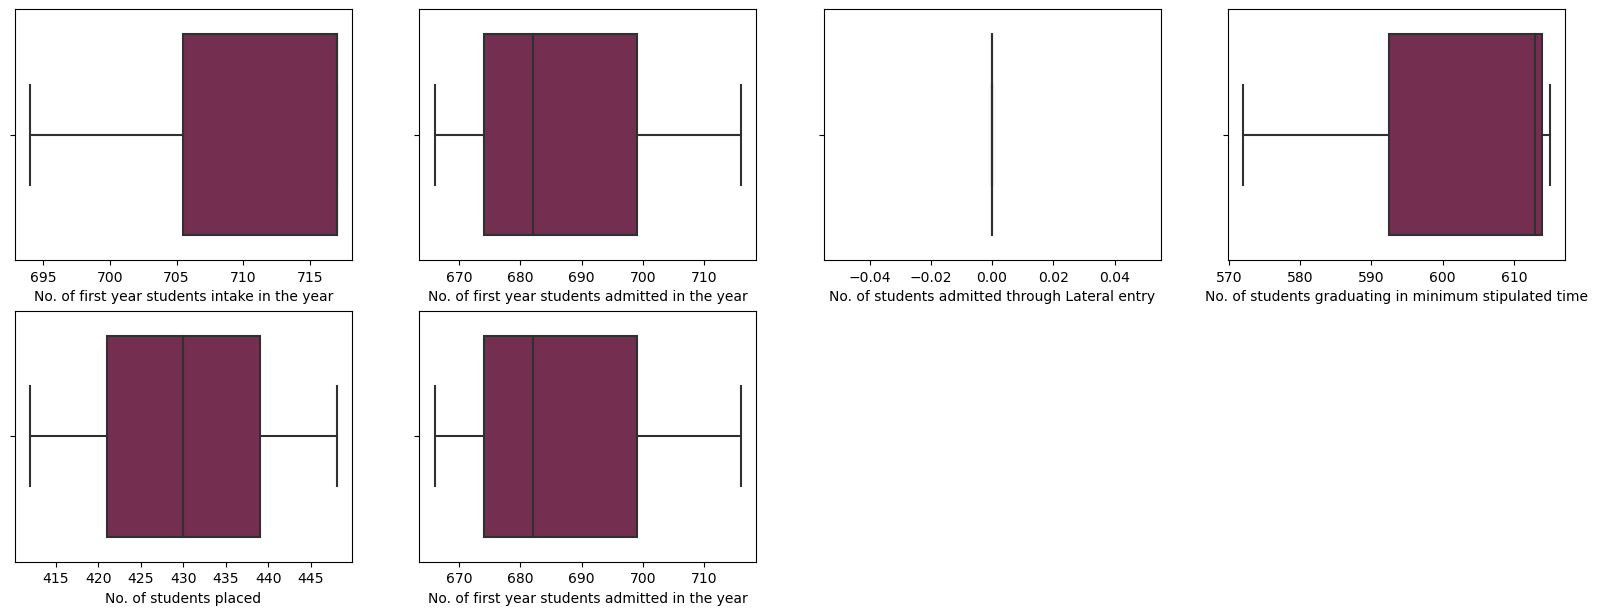

In [96]:
# to check outliers

plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(nirf3_2['No. of first year students intake in the year']);

plt.subplot(4,4,2)
sns.boxplot(nirf3_2['No. of first year students admitted in the year']);

plt.subplot(4,4,3)
sns.boxplot(nirf3_2['No. of students admitted through Lateral entry']);

plt.subplot(4,4,4)
sns.boxplot(nirf3_2['No. of students graduating in minimum stipulated time']);

plt.subplot(4,4,5)
sns.boxplot(nirf3_2['No. of students placed']);

plt.subplot(4,4,6)
sns.boxplot(nirf3_2['No. of first year students admitted in the year']);


In [97]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(nirf3_2_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(nirf3_2_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=nirf3_2_n[column],color='y')
    plt.show()


Description of No. of first year students intake in the year
----------------------------------------------------------------------------
count      3.000000
mean     709.333333
std       13.279056
min      694.000000
25%      705.500000
50%      717.000000
75%      717.000000
max      717.000000
Name: No. of first year students intake in the year, dtype: float64 

Distribution of No. of first year students intake in the year
----------------------------------------------------------------------------


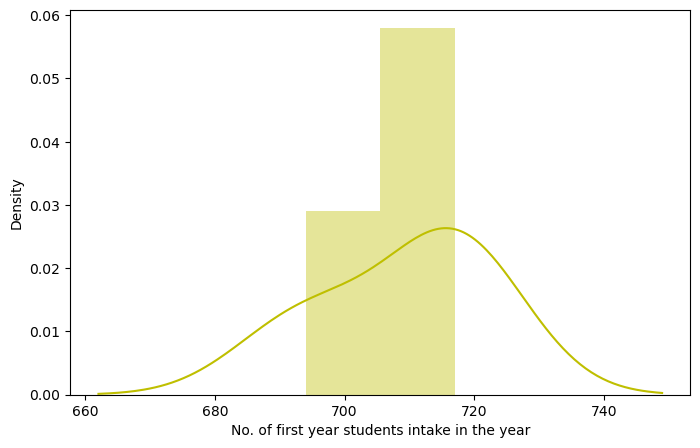

BoxPlot of No. of first year students intake in the year
----------------------------------------------------------------------------


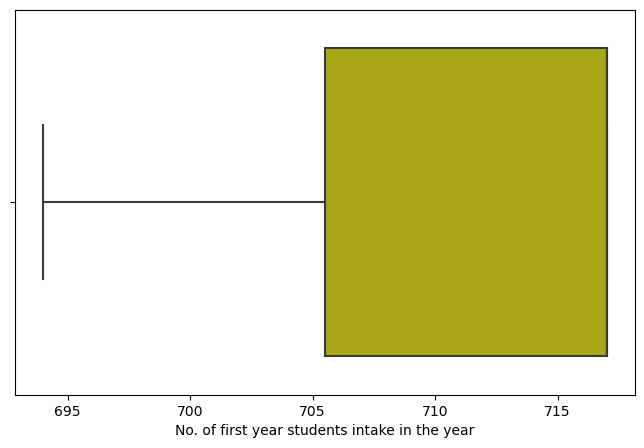

Description of No. of first year students admitted in the year
----------------------------------------------------------------------------
count      3.000000
mean     688.000000
std       25.534291
min      666.000000
25%      674.000000
50%      682.000000
75%      699.000000
max      716.000000
Name: No. of first year students admitted in the year, dtype: float64 

Distribution of No. of first year students admitted in the year
----------------------------------------------------------------------------


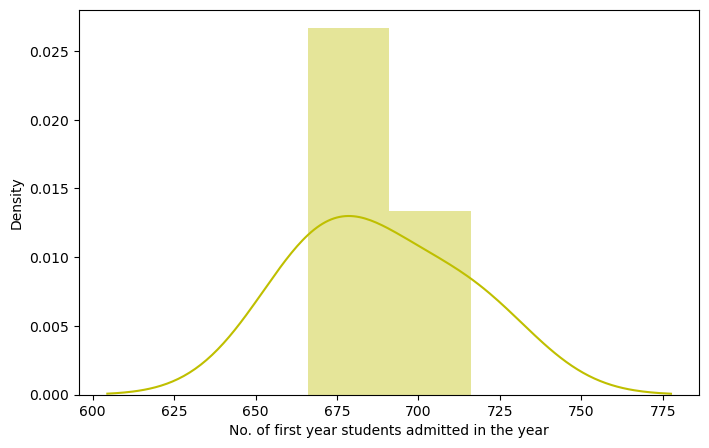

BoxPlot of No. of first year students admitted in the year
----------------------------------------------------------------------------


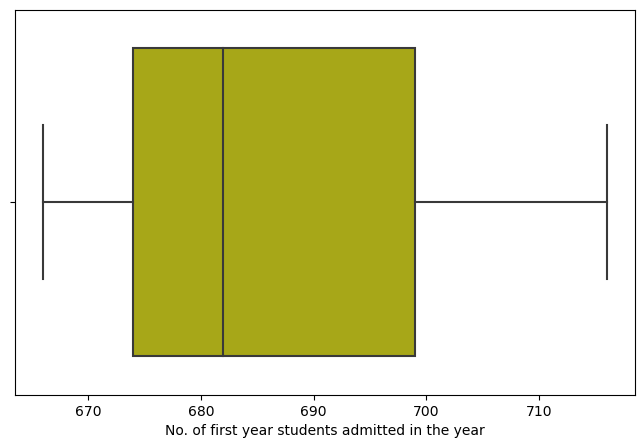

Description of No. of students admitted through Lateral entry
----------------------------------------------------------------------------
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: No. of students admitted through Lateral entry, dtype: float64 

Distribution of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


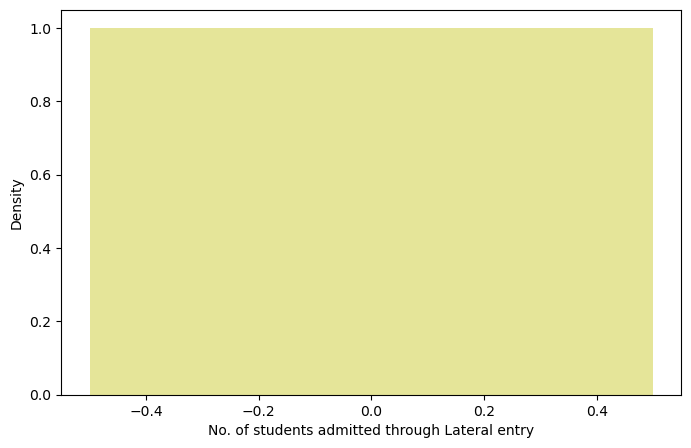

BoxPlot of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


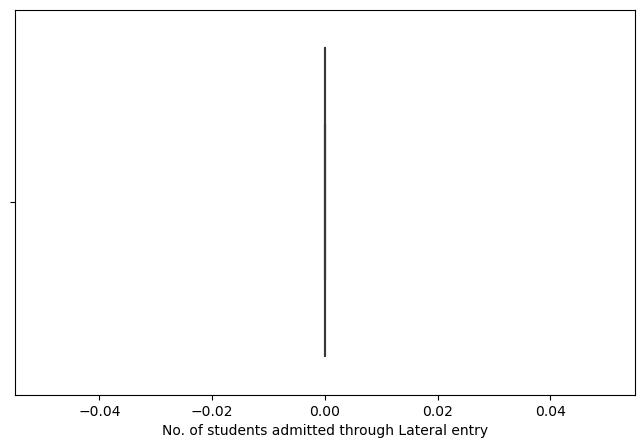

Description of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------
count      3.000000
mean     600.000000
std       24.269322
min      572.000000
25%      592.500000
50%      613.000000
75%      614.000000
max      615.000000
Name: No. of students graduating in minimum stipulated time, dtype: float64 

Distribution of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


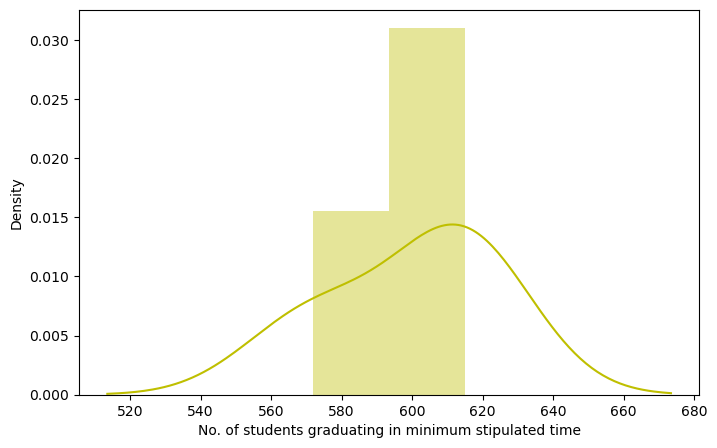

BoxPlot of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


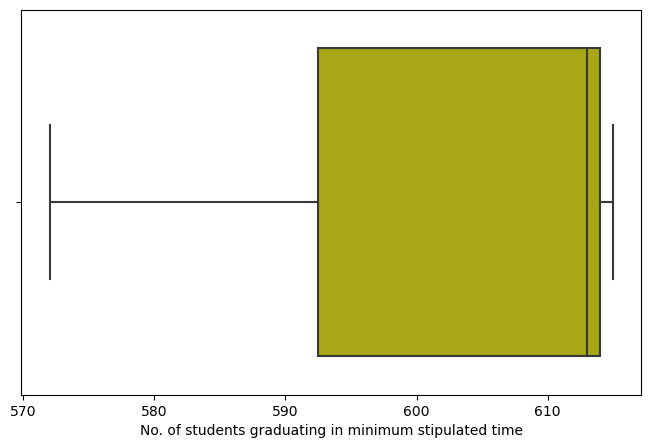

Description of No. of students placed
----------------------------------------------------------------------------
count      3.0
mean     430.0
std       18.0
min      412.0
25%      421.0
50%      430.0
75%      439.0
max      448.0
Name: No. of students placed, dtype: float64 

Distribution of No. of students placed
----------------------------------------------------------------------------


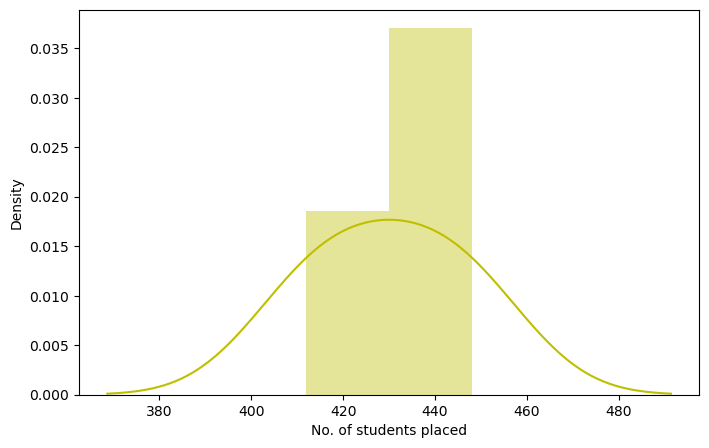

BoxPlot of No. of students placed
----------------------------------------------------------------------------


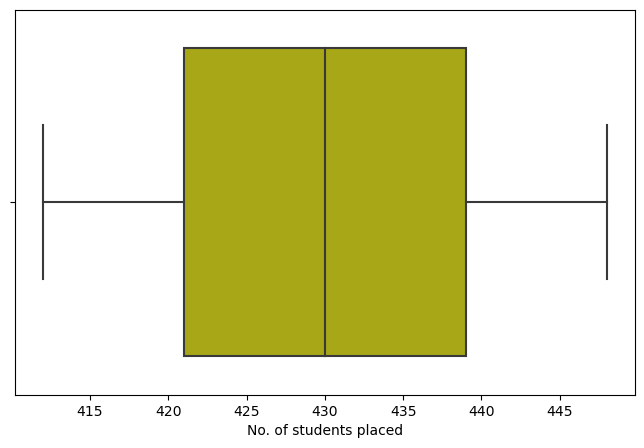

Description of No. of students selected for Higher Studies
----------------------------------------------------------------------------
count      3.000000
mean     101.333333
std       33.501244
min       63.000000
25%       89.500000
50%      116.000000
75%      120.500000
max      125.000000
Name: No. of students selected for Higher Studies, dtype: float64 

Distribution of No. of students selected for Higher Studies
----------------------------------------------------------------------------


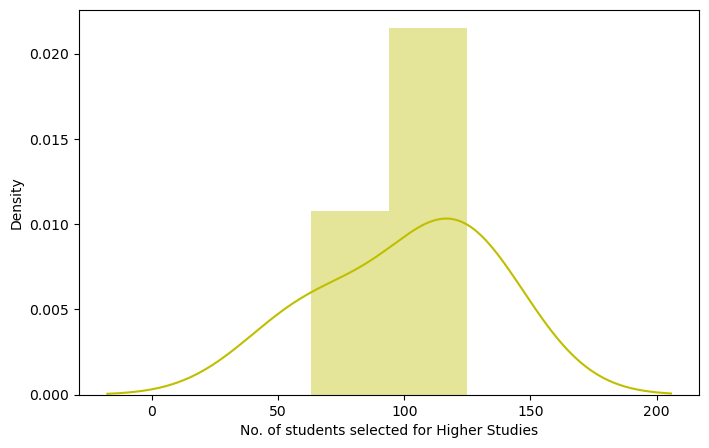

BoxPlot of No. of students selected for Higher Studies
----------------------------------------------------------------------------


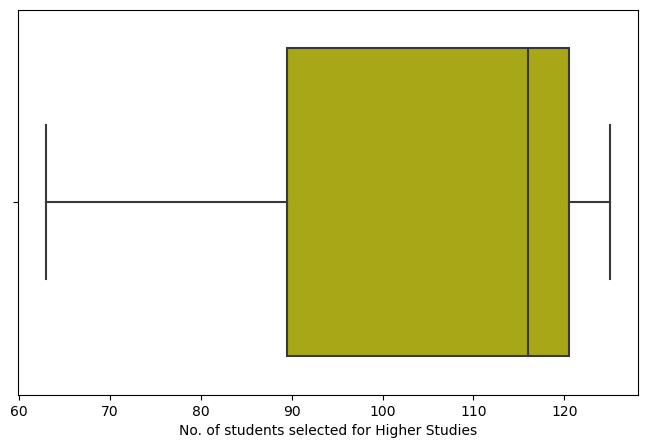

In [98]:
for x in nirf3numericcolumns:
    univariateAnalysis_numeric(x,10)


In [99]:
for column in nirf3_2.columns:
    if nirf3_2[column].dtype == 'object':
        print(column.upper(),': ',nirf3_2[column].nunique())
        print(nirf3_2[column].value_counts().sort_values())
        print('\n')

ACADEMIC YEAR :  3
2014-15    1
2015-16    1
2016-17    1
Name: Academic Year, dtype: int64


MEDIAN SALARY OF PLACED GRADUATES(AMOUNT INRS.) :  3
1011000(Ten Lakhs\rEleven Thousand)                              1
1178400(Eleven Lakhs\rSeventy Eight\rThousand Four\rHundred )    1
1300000(Thirteen\rLakhs)                                         1
Name: Median salary of placed graduates(Amount inRs.), dtype: int64




**DATA VISUALIZATION & ANALYSIS**

In [100]:
fig = nirf3_2.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

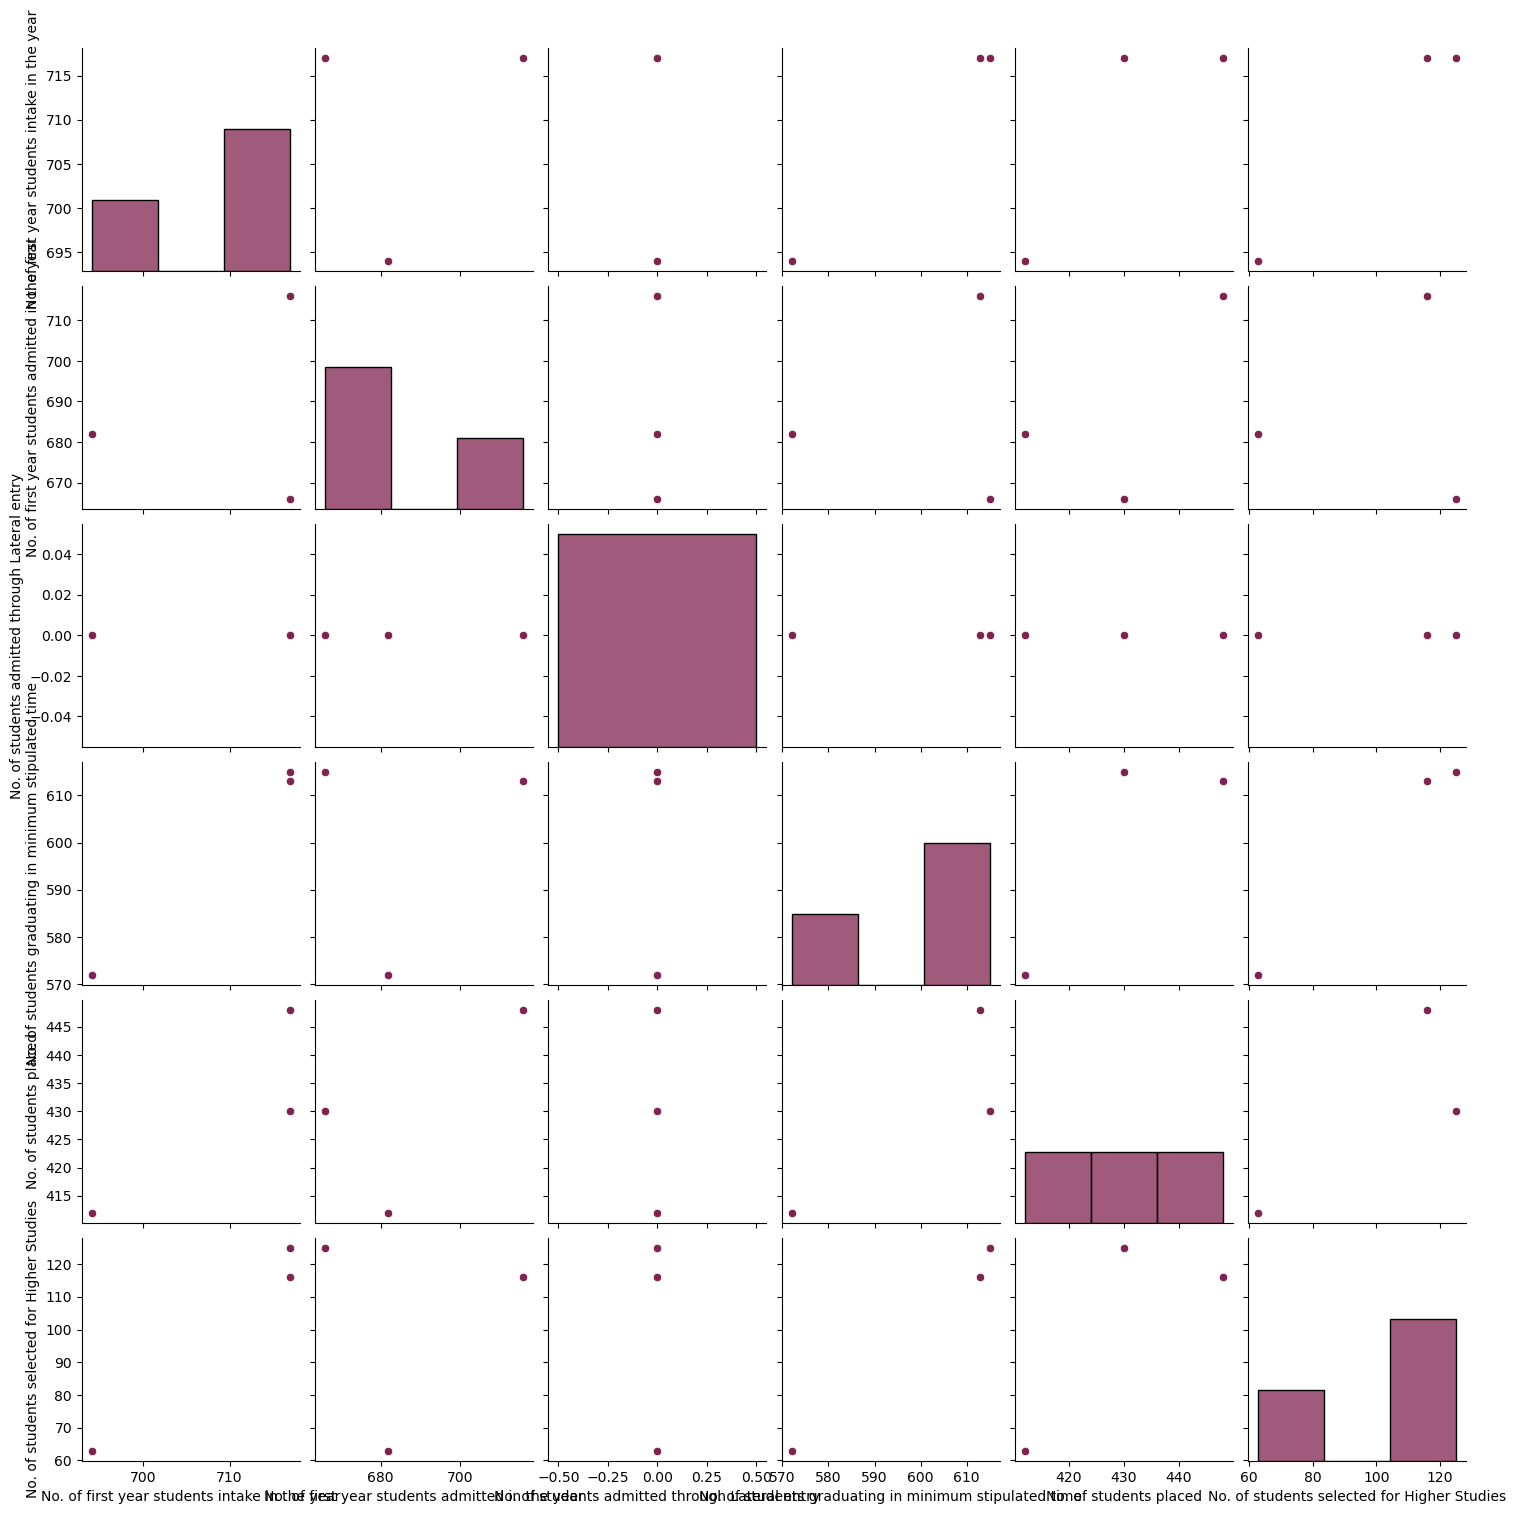

In [101]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(nirf3_2)

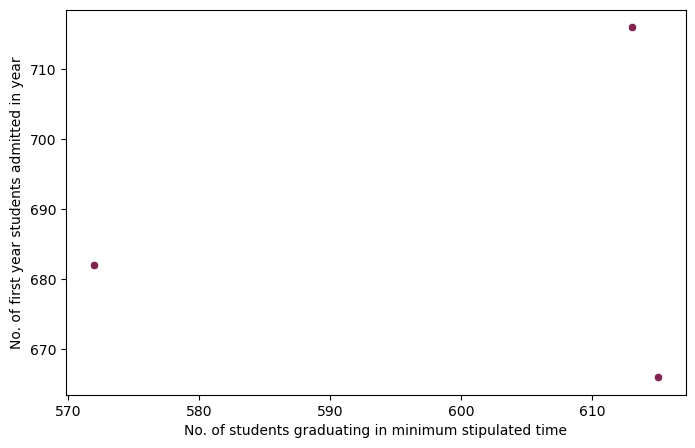

In [102]:
# No. of first year students admitted in year VS No. of students graduating in minimum stipulated time

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=nirf3_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

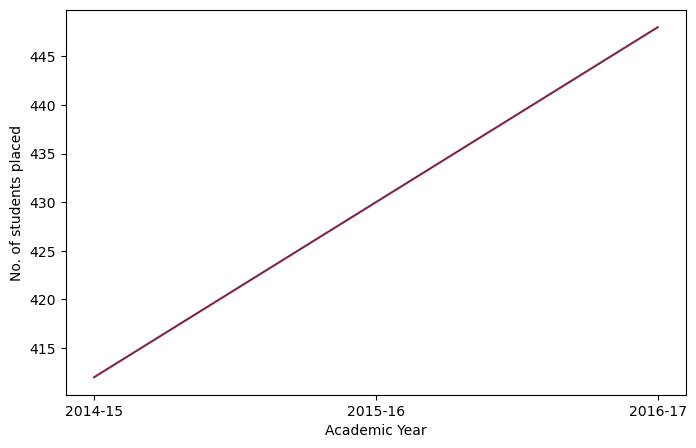

In [103]:
# No. of students placed VS Academic Year

sns.lineplot(data=nirf3_2, y='No. of students placed', x='Academic Year')


<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

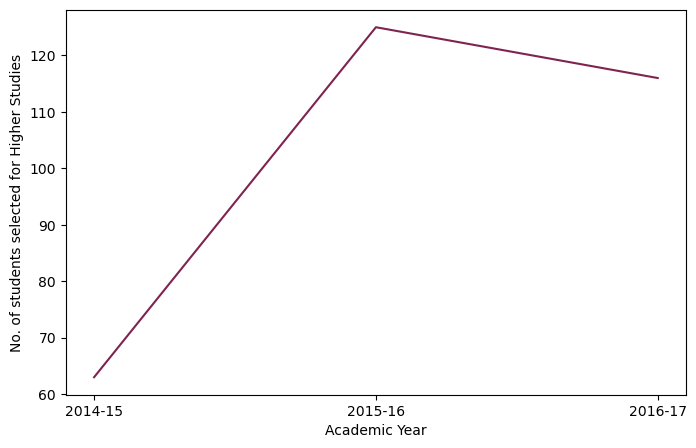

In [104]:
# No. of students selected for Higher Studies VS Academic Year

sns.lineplot(data=nirf3_2, y='No. of students selected for Higher Studies', x='Academic Year')


In [105]:
# Funding details.

nirf3_4= nirf3[10]
nirf3_4

Financial Year  \
0           Total no. of Sponsored Projects   
1             Total no. of Funding Agencies   
2  Total Amount Received (Amount in Rupees)   
3                  Amount Received in Words   

                                             2019-20  \
0                                                622   
1                                                185   
2                                         2297748211   
3  Two Hundred and Twenty Nine Crores Seventy Sev...   

                                             2018-19  \
0                                                563   
1                                                149   
2                                         2298187443   
3  Two Hundred and Twenty Nine Crores Eighty One ...   

                                             2017-18  
0                                                409  
1                                                125  
2                                         2035039984  
3  Two Hundred and Three Crores Fifty Lakhs Thirt...

In [106]:
# Transpose the tha dataframe and set relevant column names

nirf3_4 = nirf3_4.transpose()
nirf3_4.reset_index(inplace=True)
nirf3_4.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
nirf3_4

Financial Year  Total no. of Sponsored Projects  \
0  Financial Year  Total no. of Sponsored Projects   
1         2019-20                              622   
2         2018-19                              563   
3         2017-18                              409   

   Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  \
0  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)   
1                            185                                2297748211   
2                            149                                2298187443   
3                            125                                2035039984   

                            Amount Received in Words  
0                           Amount Received in Words  
1  Two Hundred and Twenty Nine Crores Seventy Sev...  
2  Two Hundred and Twenty Nine Crores Eighty One ...  
3  Two Hundred and Three Crores Fifty Lakhs Thirt...

In [107]:
nirf3_4=nirf3_4.drop(0)
nirf3_4

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             622   
2        2018-19                             563   
3        2017-18                             409   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  \
1                           185                               2297748211   
2                           149                               2298187443   
3                           125                               2035039984   

                            Amount Received in Words  
1  Two Hundred and Twenty Nine Crores Seventy Sev...  
2  Two Hundred and Twenty Nine Crores Eighty One ...  
3  Two Hundred and Three Crores Fifty Lakhs Thirt...

In [108]:
nirf3_4=nirf3_4.drop(['Amount Received in Words'], axis =1)
nirf3_4

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             622   
2        2018-19                             563   
3        2017-18                             409   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  
1                           185                               2297748211  
2                           149                               2298187443  
3                           125                               2035039984

In [109]:
# convert Total Amount Received (Amount in Rupees) Column data type from object to int64
print(nirf3_4.dtypes)
nirf3_4 = nirf3_4.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(nirf3_4.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


In [110]:
nirf3_4.describe

<bound method NDFrame.describe of   Financial Year Total no. of Sponsored Projects  \
1        2019-20                             622   
2        2018-19                             563   
3        2017-18                             409   

  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  
1                           185                                2297748211  
2                           149                                2298187443  
3                           125                                2035039984  >

In [111]:
print("Median : ")
nirf3_4['Total Amount Received (Amount in Rupees)'].median()

Median : 


2297748211.0

In [112]:
print("Maximum : ")
nirf3_4['Total Amount Received (Amount in Rupees)'].max()

Maximum : 


2298187443

In [113]:
print("Minimum : ")
nirf3_4['Total Amount Received (Amount in Rupees)'].min()

Minimum : 


2035039984

    
Understanding spending trends requires looking at the table "Financial Resources: Utilized Amount for the Capital expenditure for the preceding 3 years."

In [114]:
nirf3_7 = nirf3[7]
nirf3_7

Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   

                                             2019-20  \
0                                    Utilised Amount   
1                                                NaN   
2  233311985 (Twenty Three Crores Thirty Three La...   
3  1358206293 (One Hundred Thirty Five Crores Eig...   
4  7800414 (Seventy Eight Lakhs Four Hundred and ...   

                                             2018-19  \
0                                    Utilised Amount   
1                                                NaN   
2  186529104 (Eighteen Crores Sixty Five Lakhs Tw...   
3  1203696299 (One Hundred Twenty Crore Thirty Si...   
4  12162794 (One Crore Twenty One Lakhs Sixty Two...   

                                             2017-18  
0                                    Utilised Amount  
1                                                NaN  
2  166714860 (Sixteen Crores Sixty Seven Lakh Fou...  
3  86137020 (Eight Crore Sixty One Lakh Thirty Se...  
4  24228357 (Two Crores Forty Two Lakhs Twenty Ei...

In [115]:
nirf3_7 = nirf3_7.transpose()
nirf3_7

0  \
Financial Year              NaN   
2019-20         Utilised Amount   
2018-19         Utilised Amount   
2017-18         Utilised Amount   

                                                                1  \
Financial Year  Annual Capital Expenditure on Academic Activit...   
2019-20                                                       NaN   
2018-19                                                       NaN   
2017-18                                                       NaN   

                                                                2  \
Financial Year    Library ( Books, Journals and e-Resources only)   
2019-20         233311985 (Twenty Three Crores Thirty Three La...   
2018-19         186529104 (Eighteen Crores Sixty Five Lakhs Tw...   
2017-18         166714860 (Sixteen Crores Sixty Seven Lakh Fou...   

                                                                3  \
Financial Year        New Equipment and software for Laboratories   
2019-20         1358206293 (One Hundred Thirty Five Crores Eig...   
2018-19         1203696299 (One Hundred Twenty Crore Thirty Si...   
2017-18         86137020 (Eight Crore Sixty One Lakh Thirty Se...   

                                                                4  
Financial Year                              Engineering Workshops  
2019-20         7800414 (Seventy Eight Lakhs Four Hundred and ...  
2018-19         12162794 (One Crore Twenty One Lakhs Sixty Two...  
2017-18         24228357 (Two Crores Forty Two Lakhs Twenty Ei...

In [116]:
nirf3_7.columns = ['Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
nirf3_7.reset_index(drop = True, inplace=True)
nirf3_7.drop('Drop', axis =1, inplace=True)
nirf3_7

Library  \
0  Annual Capital Expenditure on Academic Activit...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                Software & Equipment  \
0    Library ( Books, Journals and e-Resources only)   
1  233311985 (Twenty Three Crores Thirty Three La...   
2  186529104 (Eighteen Crores Sixty Five Lakhs Tw...   
3  166714860 (Sixteen Crores Sixty Seven Lakh Fou...   

                                        Eng Workshop  \
0        New Equipment and software for Laboratories   
1  1358206293 (One Hundred Thirty Five Crores Eig...   
2  1203696299 (One Hundred Twenty Crore Thirty Si...   
3  86137020 (Eight Crore Sixty One Lakh Thirty Se...   

                                              Others  
0                              Engineering Workshops  
1  7800414 (Seventy Eight Lakhs Four Hundred and ...  
2  12162794 (One Crore Twenty One Lakhs Sixty Two...  
3  24228357 (Two Crores Forty Two Lakhs Twenty Ei...

In [117]:
nirf3_7 = nirf3_7.drop(0)

In [118]:
fin_yr = ['2019-20', '2018-19', '2017-18']
nirf3_7['Financial Year'] = fin_yr

In [119]:
nirf3_7['Library'] = nirf3_7['Library'].str.replace('\d+', '')
nirf3_7['Software & Equipment'] = nirf3_7['Software & Equipment'].str.replace('\d+', '')
nirf3_7['Eng Workshop'] = nirf3_7['Eng Workshop'].str.replace('\d+', '')
nirf3_7['Others'] = nirf3_7['Others'].str.replace('\d+', '')

In [120]:
nirf3_7

Library                               Software & Equipment  \
1     NaN   (Twenty Three Crores Thirty Three Lakhs Eleve...   
2     NaN   (Eighteen Crores Sixty Five Lakhs Twenty Nine...   
3     NaN   (Sixteen Crores Sixty Seven Lakh Fourteen\rTh...   

                                        Eng Workshop  \
1   (One Hundred Thirty Five Crores Eighty Two\rL...   
2   (One Hundred Twenty Crore Thirty Six Lakhs\rN...   
3   (Eight Crore Sixty One Lakh Thirty Seven Thou...   

                                              Others Financial Year  
1   (Seventy Eight Lakhs Four Hundred and Fourtee...        2019-20  
2   (One Crore Twenty One Lakhs Sixty Two Thousan...        2018-19  
3   (Two Crores Forty Two Lakhs Twenty Eight\rTho...        2017-18

**IIT KANPUR**

In [121]:
import tabula

nirf4 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/IR-E-I-1075.pdf', pages='all')
nirf4_2= nirf4[2]
nirf4_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              827   
1       2015-16                                              827   
2       2016-17                                              827   

   No. of first year\rstudents admitted in\rthe year Academic Year.1  \
0                                                809         2015-16   
1                                                803         2016-17   
2                                                826         2017-18   

   No. of students\radmitted through\rLateral entry Academic Year.2  \
0                                                 0         2017-18   
1                                                 0         2018-19   
2                                                 0         2019-20   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                789          
1                                                770          
2                                                789          

   No. of students\rplaced  \
0                      354   
1                      437   
2                      463   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0                           1400000(Fourteen\rLakhs)    
1                            1500000(Fifteen\rLakhs)    
2                          1700000(Seventeen\rLakhs)    

   No. of students\rselected for Higher\rStudies  
0                                            387  
1                                            301  
2                                            325

In [122]:
nirf4_2.shape

(3, 10)

In [123]:
nirf4_2.columns.values

array(['Academic Year', 'No. of first year\rstudents intake in the\ryear',
       'No. of first year\rstudents admitted in\rthe year',
       'Academic Year.1',
       'No. of students\radmitted through\rLateral entry',
       'Academic Year.2',
       'No. of students\rgraduating in\rminimum stipulated\rtime',
       'No. of students\rplaced',
       'Median salary of\rplaced\rgraduates(Amount in\rRs.)',
       'No. of students\rselected for Higher\rStudies'], dtype=object)

In [124]:
# Dropping unneccesary columns
cols = ['Academic Year.1', 'Academic Year.2']
nirf4_2 = nirf4_2.drop(cols, 1)
nirf4_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              827   
1       2015-16                                              827   
2       2016-17                                              827   

   No. of first year\rstudents admitted in\rthe year  \
0                                                809   
1                                                803   
2                                                826   

   No. of students\radmitted through\rLateral entry  \
0                                                 0   
1                                                 0   
2                                                 0   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                789          
1                                                770          
2                                                789          

   No. of students\rplaced  \
0                      354   
1                      437   
2                      463   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0                           1400000(Fourteen\rLakhs)    
1                            1500000(Fifteen\rLakhs)    
2                          1700000(Seventeen\rLakhs)    

   No. of students\rselected for Higher\rStudies  
0                                            387  
1                                            301  
2                                            325

In [125]:
nirf4_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
nirf4_2

Academic Year  No. of first year students intake in the year  \
0       2014-15                                            827   
1       2015-16                                            827   
2       2016-17                                            827   

   No. of first year students admitted in the year  \
0                                              809   
1                                              803   
2                                              826   

   No. of students admitted through Lateral entry  \
0                                               0   
1                                               0   
2                                               0   

   No. of students graduating in minimum stipulated time  \
0                                                789       
1                                                770       
2                                                789       

   No. of students placed Median salary of placed graduates(Amount inRs.)  \
0                     354                        1400000(Fourteen\rLakhs)   
1                     437                         1500000(Fifteen\rLakhs)   
2                     463                       1700000(Seventeen\rLakhs)   

   No. of students selected for Higher Studies  
0                                          387  
1                                          301  
2                                          325

In [126]:
nirf4_2.isna()

Academic Year  No. of first year students intake in the year  \
0          False                                          False   
1          False                                          False   
2          False                                          False   

   No. of first year students admitted in the year  \
0                                            False   
1                                            False   
2                                            False   

   No. of students admitted through Lateral entry  \
0                                           False   
1                                           False   
2                                           False   

   No. of students graduating in minimum stipulated time  \
0                                              False       
1                                              False       
2                                              False       

   No. of students placed  Median salary of placed graduates(Amount inRs.)  \
0                   False                                            False   
1                   False                                            False   
2                   False                                            False   

   No. of students selected for Higher Studies  
0                                        False  
1                                        False  
2                                        False

In [127]:
nirf4_2.dropna(inplace=True)

In [128]:
nirf4_2.isnull().any()

Academic Year                                            False
No. of first year students intake in the year            False
No. of first year students admitted in the year          False
No. of students admitted through Lateral entry           False
No. of students graduating in minimum stipulated time    False
No. of students placed                                   False
Median salary of placed graduates(Amount inRs.)          False
No. of students selected for Higher Studies              False
dtype: bool

In [129]:
nirf4_2.isnull().sum()

Academic Year                                            0
No. of first year students intake in the year            0
No. of first year students admitted in the year          0
No. of students admitted through Lateral entry           0
No. of students graduating in minimum stipulated time    0
No. of students placed                                   0
Median salary of placed graduates(Amount inRs.)          0
No. of students selected for Higher Studies              0
dtype: int64

In [130]:
nirf1_2.duplicated().sum()

0

In [131]:
nirf1_2.skew(axis=0)

No. of first year students intake in the year            0.000000
No. of first year students admitted in the year         -1.126683
No. of students admitted through Lateral entry           0.000000
No. of students graduating in minimum stipulated time   -1.090291
No. of students placed                                  -1.545393
No. of students selected for Higher Studies              0.782152
dtype: float64

In [132]:
nirf4_2_cat = nirf4_2.select_dtypes(include = ['object'])
nirf4catcolumns = list(nirf4_2_cat.columns.values)
print("Categorical Column = " ,nirf4catcolumns)

Categorical Column =  ['Academic Year', 'Median salary of placed graduates(Amount inRs.)']


In [133]:
nirf4_2_n = nirf4_2.select_dtypes(include = ['float64', 'int64'])
nirf4numericcolumns = list(nirf4_2_n.columns.values)
print("Total Numerical Columns = ",len(nirf4numericcolumns))

Total Numerical Columns =  6


In [134]:
nirf4_2_n.columns

Index(['No. of first year students intake in the year',
       'No. of first year students admitted in the year',
       'No. of students admitted through Lateral entry',
       'No. of students graduating in minimum stipulated time',
       'No. of students placed',
       'No. of students selected for Higher Studies'],
      dtype='object')

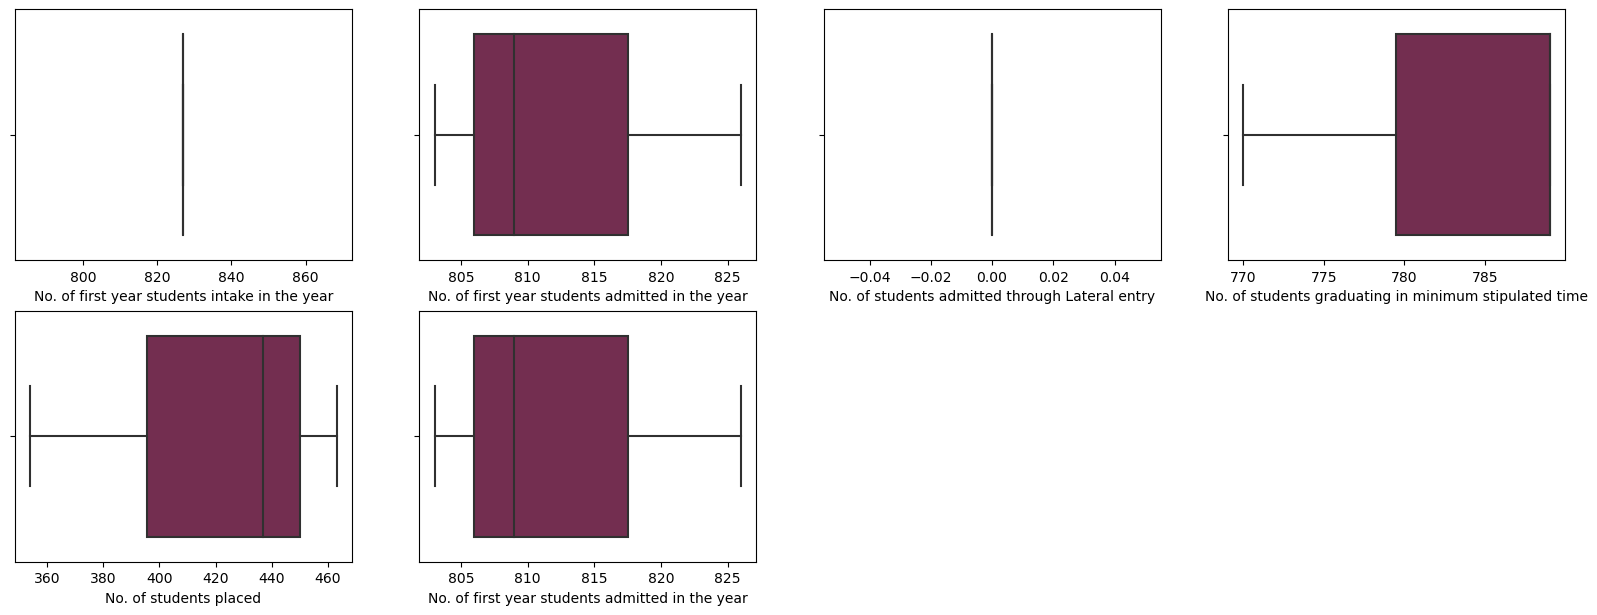

In [135]:
# to check outliers

plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(nirf4_2['No. of first year students intake in the year']);

plt.subplot(4,4,2)
sns.boxplot(nirf4_2['No. of first year students admitted in the year']);

plt.subplot(4,4,3)
sns.boxplot(nirf4_2['No. of students admitted through Lateral entry']);

plt.subplot(4,4,4)
sns.boxplot(nirf4_2['No. of students graduating in minimum stipulated time']);

plt.subplot(4,4,5)
sns.boxplot(nirf4_2['No. of students placed']);

plt.subplot(4,4,6)
sns.boxplot(nirf4_2['No. of first year students admitted in the year']);


In [136]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(nirf4_2_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(nirf4_2_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=nirf4_2_n[column],color='y')
    plt.show()

Description of No. of first year students intake in the year
----------------------------------------------------------------------------
count      3.0
mean     827.0
std        0.0
min      827.0
25%      827.0
50%      827.0
75%      827.0
max      827.0
Name: No. of first year students intake in the year, dtype: float64 

Distribution of No. of first year students intake in the year
----------------------------------------------------------------------------


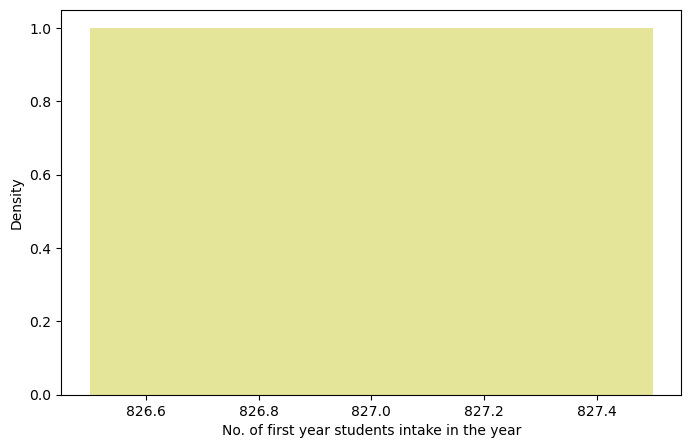

BoxPlot of No. of first year students intake in the year
----------------------------------------------------------------------------


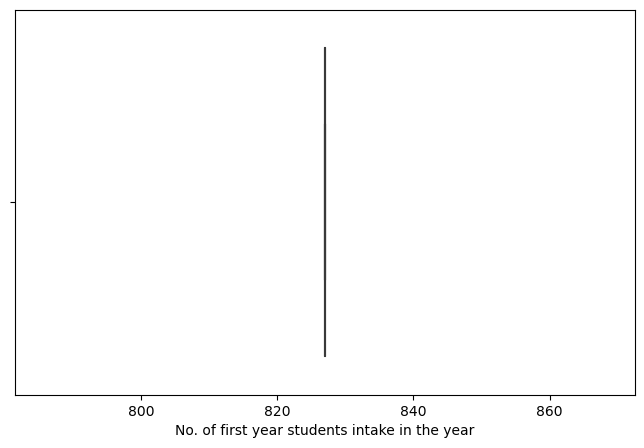

Description of No. of first year students admitted in the year
----------------------------------------------------------------------------
count      3.000000
mean     812.666667
std       11.930353
min      803.000000
25%      806.000000
50%      809.000000
75%      817.500000
max      826.000000
Name: No. of first year students admitted in the year, dtype: float64 

Distribution of No. of first year students admitted in the year
----------------------------------------------------------------------------


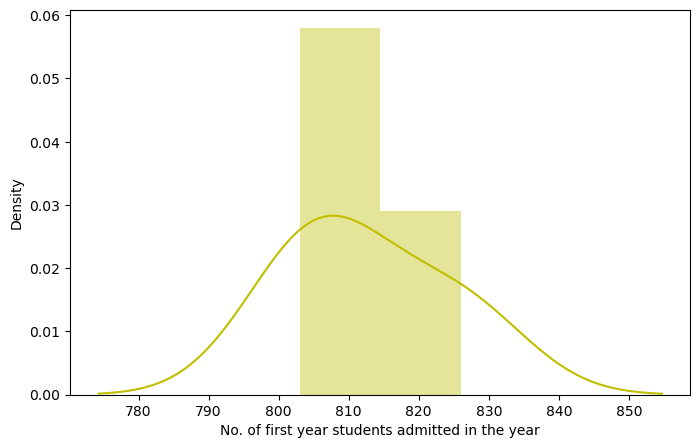

BoxPlot of No. of first year students admitted in the year
----------------------------------------------------------------------------


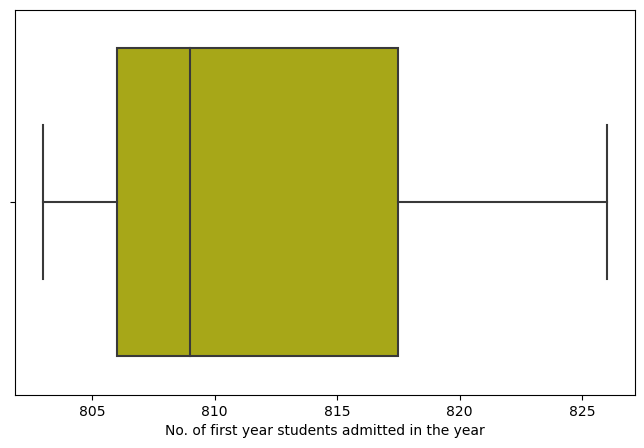

Description of No. of students admitted through Lateral entry
----------------------------------------------------------------------------
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: No. of students admitted through Lateral entry, dtype: float64 

Distribution of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


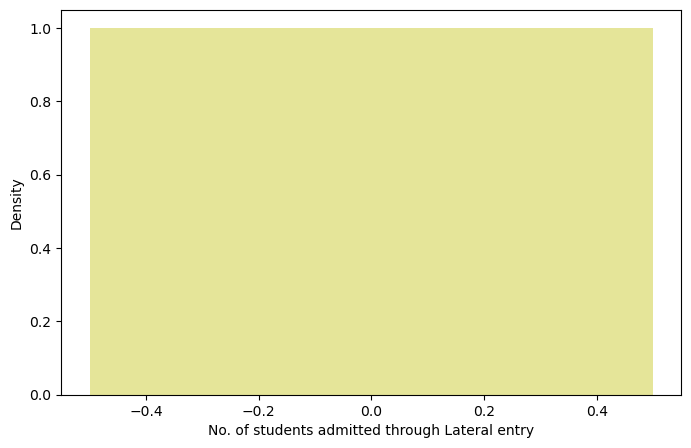

BoxPlot of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


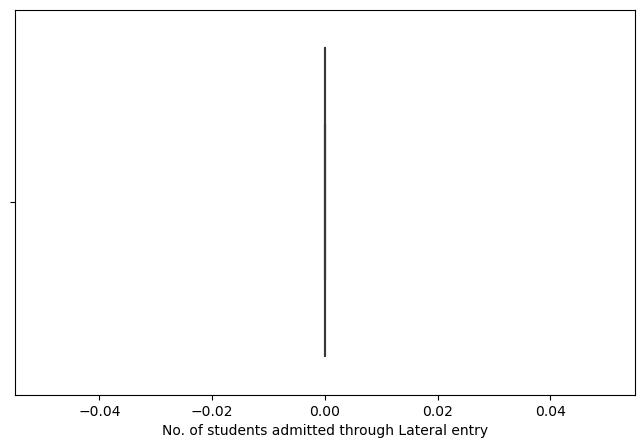

Description of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------
count      3.000000
mean     782.666667
std       10.969655
min      770.000000
25%      779.500000
50%      789.000000
75%      789.000000
max      789.000000
Name: No. of students graduating in minimum stipulated time, dtype: float64 

Distribution of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


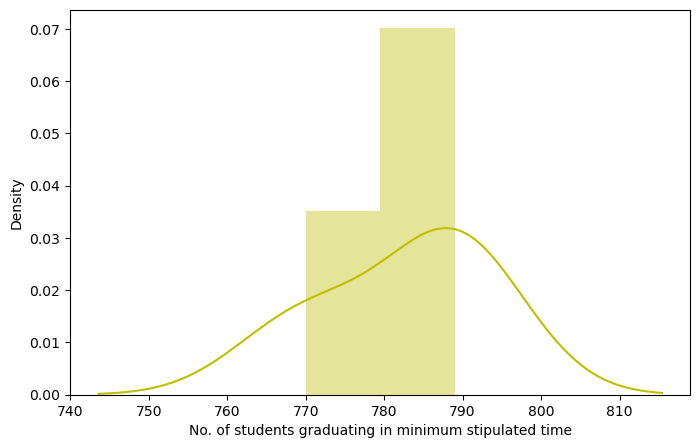

BoxPlot of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


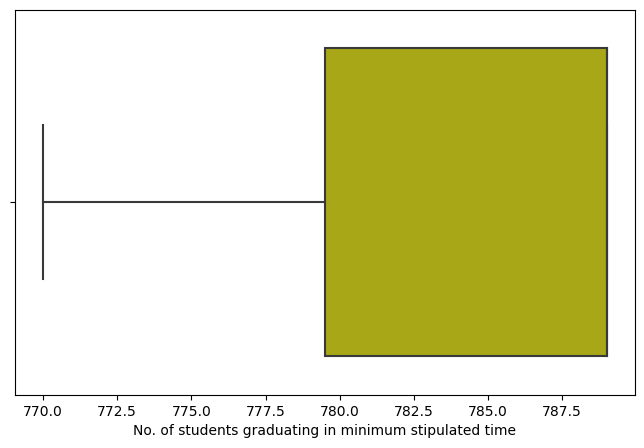

Description of No. of students placed
----------------------------------------------------------------------------
count      3.000000
mean     418.000000
std       56.929781
min      354.000000
25%      395.500000
50%      437.000000
75%      450.000000
max      463.000000
Name: No. of students placed, dtype: float64 

Distribution of No. of students placed
----------------------------------------------------------------------------


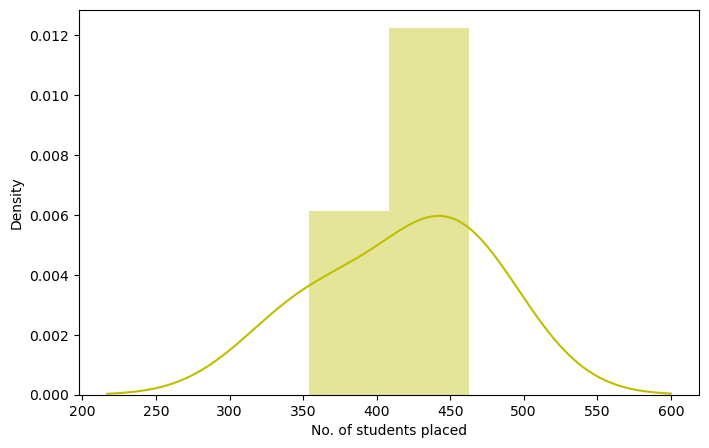

BoxPlot of No. of students placed
----------------------------------------------------------------------------


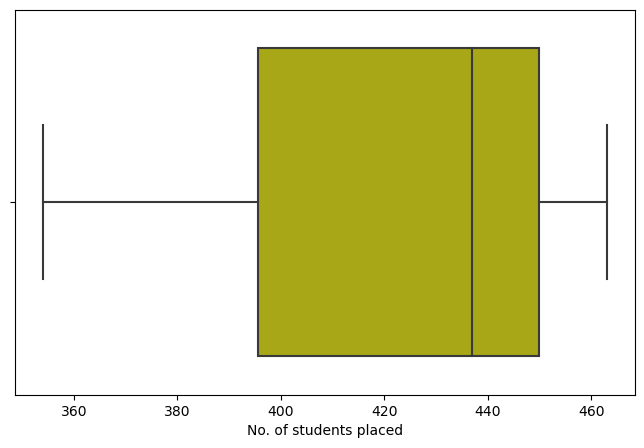

Description of No. of students selected for Higher Studies
----------------------------------------------------------------------------
count      3.000000
mean     337.666667
std       44.377171
min      301.000000
25%      313.000000
50%      325.000000
75%      356.000000
max      387.000000
Name: No. of students selected for Higher Studies, dtype: float64 

Distribution of No. of students selected for Higher Studies
----------------------------------------------------------------------------


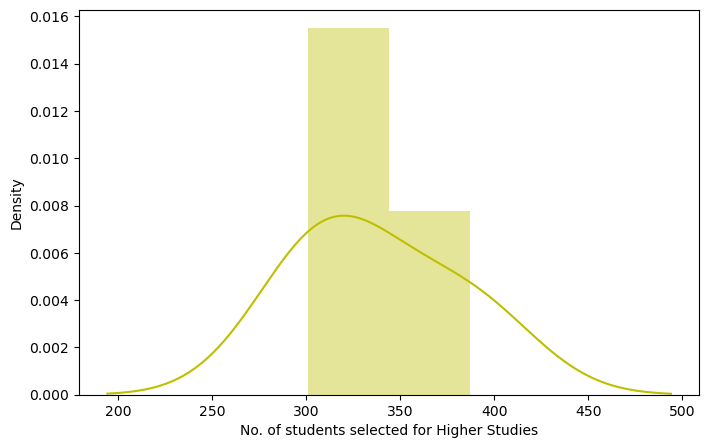

BoxPlot of No. of students selected for Higher Studies
----------------------------------------------------------------------------


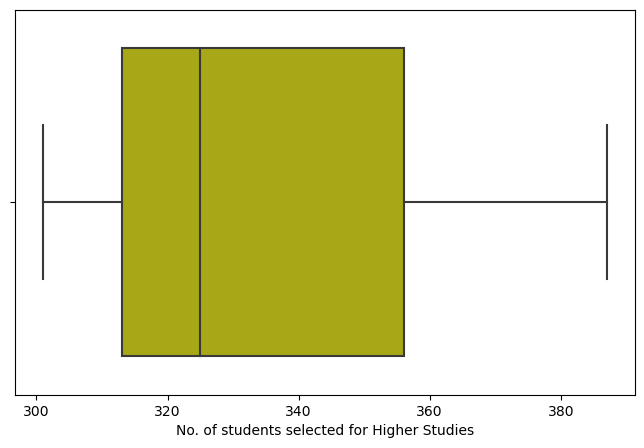

In [137]:
for x in nirf4numericcolumns:
    univariateAnalysis_numeric(x,10)

In [138]:
for column in nirf4_2.columns:
    if nirf4_2[column].dtype == 'object':
        print(column.upper(),': ',nirf4_2[column].nunique())
        print(nirf4_2[column].value_counts().sort_values())
        print('\n')

ACADEMIC YEAR :  3
2014-15    1
2015-16    1
2016-17    1
Name: Academic Year, dtype: int64


MEDIAN SALARY OF PLACED GRADUATES(AMOUNT INRS.) :  3
1400000(Fourteen\rLakhs)     1
1500000(Fifteen\rLakhs)      1
1700000(Seventeen\rLakhs)    1
Name: Median salary of placed graduates(Amount inRs.), dtype: int64




DATA VISUALIZATION & ANALYSIS


In [139]:
fig = nirf4_2.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

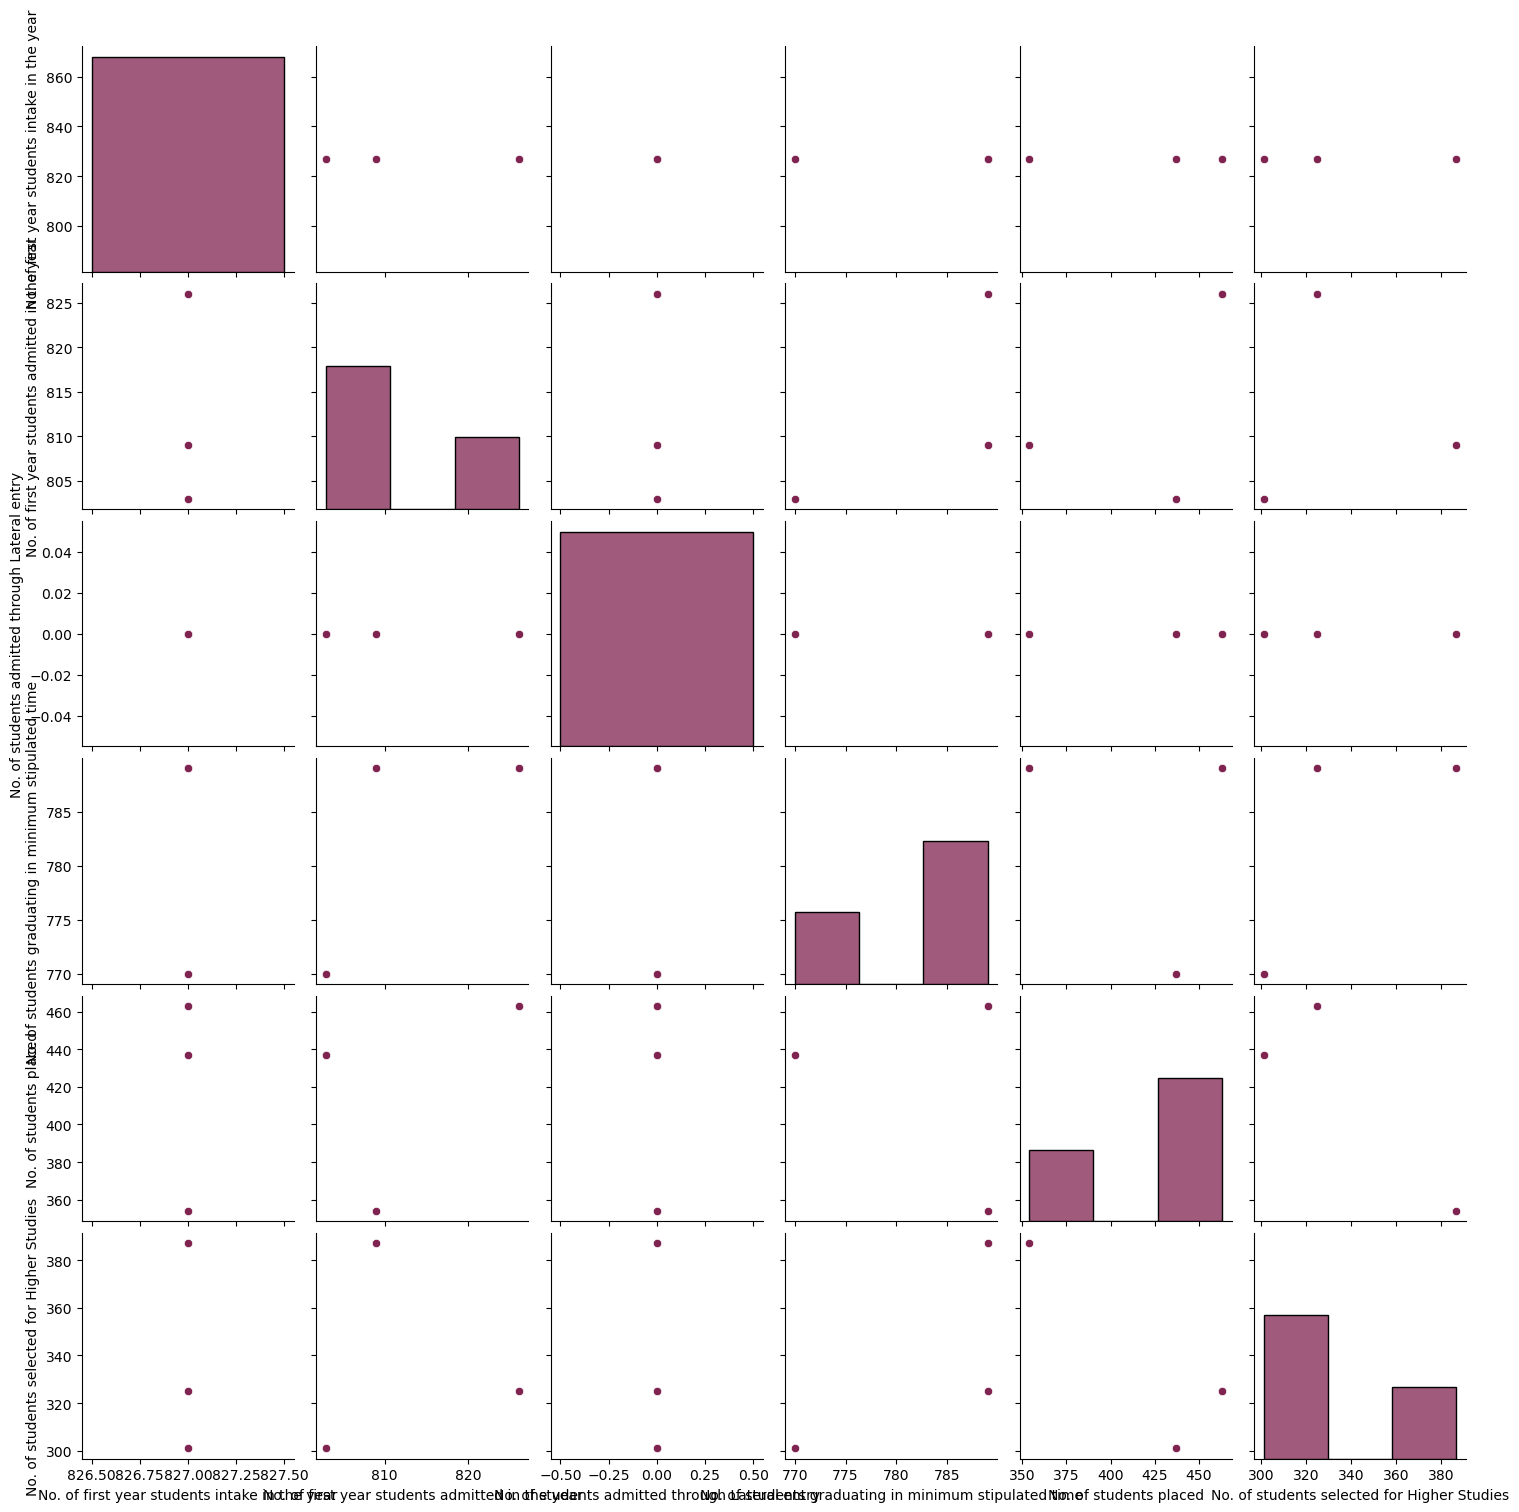

In [140]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(nirf4_2)

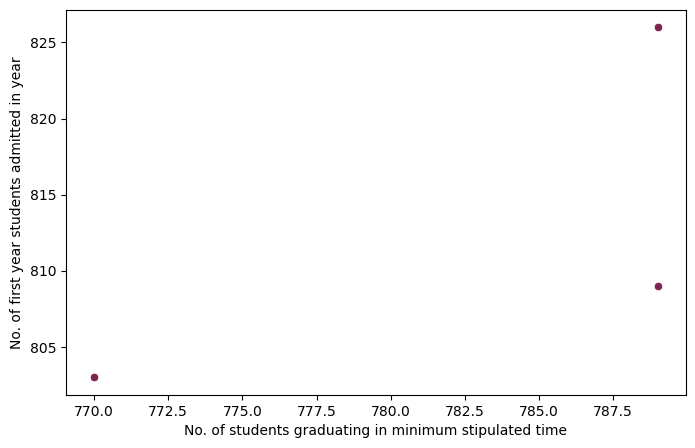

In [141]:
# No. of first year students admitted in year VS No. of students graduating in minimum stipulated time

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=nirf4_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

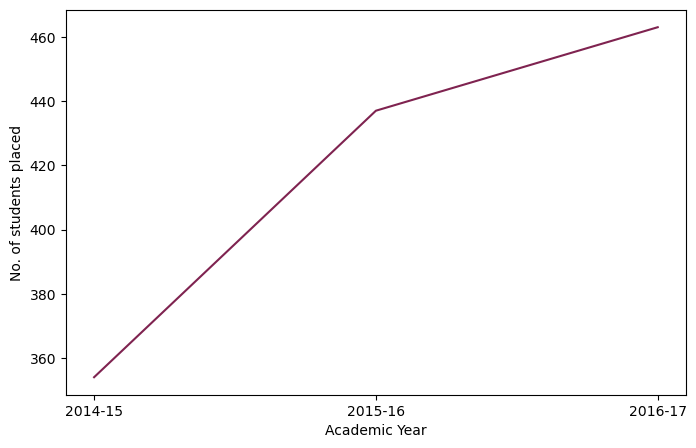

In [142]:
# No. of students placed VS Academic Year

sns.lineplot(data=nirf4_2, y='No. of students placed', x='Academic Year')

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

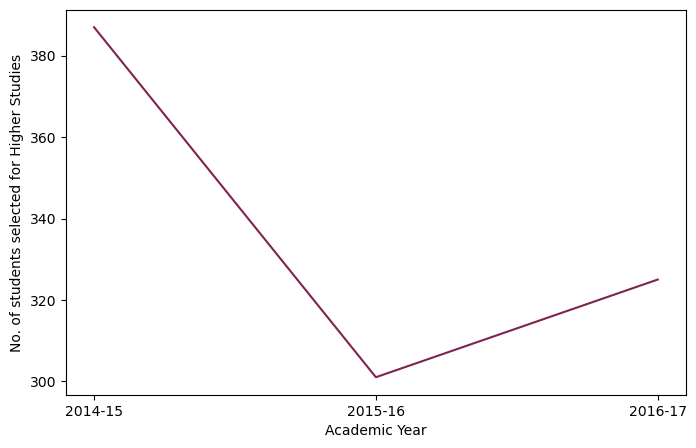

In [143]:
# No. of students selected for Higher Studies VS Academic Year

sns.lineplot(data=nirf4_2, y='No. of students selected for Higher Studies', x='Academic Year')

There is sharpe decrease in Students selected for higher studies in year 2015-16
This could be the reason for spike in students getting placed in year 2015-16 above.

In [144]:
# Funding details

nirf4_3= nirf4[10]
nirf4_3

Financial Year  \
0         Total no. of Consultancy Projects   
1         Total no. of Client Organizations   
2  Total Amount Received (Amount in Rupees)   
3                  Amount Received in Words   

                                             2019-20  \
0                                                315   
1                                                191   
2                                          310320868   
3  Thirty One Crore Three Lakh Twenty Thousand Ei...   

                                             2018-19  \
0                                                246   
1                                                123   
2                                          270496071   
3  Twenty Seven Crore Four Lakh Ninety Six Thousa...   

                                             2017-18  
0                                                261  
1                                                129  
2                                          308824752  
3  Thirty Crore Eighty Eight Lakh Twenty Four Tho...

In [145]:
nirf4_3 = nirf4_3.transpose()
nirf4_3.reset_index(inplace=True)
nirf4_3.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
nirf4_3

Financial Year    Total no. of Sponsored Projects  \
0  Financial Year  Total no. of Consultancy Projects   
1         2019-20                                315   
2         2018-19                                246   
3         2017-18                                261   

       Total no. of Funding Agencies  \
0  Total no. of Client Organizations   
1                                191   
2                                123   
3                                129   

   Total Amount Received (Amount in Rupees)  \
0  Total Amount Received (Amount in Rupees)   
1                                 310320868   
2                                 270496071   
3                                 308824752   

                            Amount Received in Words  
0                           Amount Received in Words  
1  Thirty One Crore Three Lakh Twenty Thousand Ei...  
2  Twenty Seven Crore Four Lakh Ninety Six Thousa...  
3  Thirty Crore Eighty Eight Lakh Twenty Four Tho...

In [146]:
# Drop irrelevant rows
nirf4_3 = nirf4_3.drop(0)
nirf4_3

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             315   
2        2018-19                             246   
3        2017-18                             261   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  \
1                           191                                310320868   
2                           123                                270496071   
3                           129                                308824752   

                            Amount Received in Words  
1  Thirty One Crore Three Lakh Twenty Thousand Ei...  
2  Twenty Seven Crore Four Lakh Ninety Six Thousa...  
3  Thirty Crore Eighty Eight Lakh Twenty Four Tho...

In [147]:
# Drop irrelevant Column
nirf4_3=nirf4_3.drop(['Amount Received in Words'], axis =1)
nirf4_3

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             315   
2        2018-19                             246   
3        2017-18                             261   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  
1                           191                                310320868  
2                           123                                270496071  
3                           129                                308824752

In [191]:
print(nirf4_3.dtypes)
nirf4_3 = nirf4_3.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(nirf4_3.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


In [192]:
nirf4_3.describe

<bound method NDFrame.describe of   Financial Year Total no. of Sponsored Projects  \
1        2019-20                             315   
2        2018-19                             246   
3        2017-18                             261   

  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  
1                           191                                 310320868  
2                           123                                 270496071  
3                           129                                 308824752  >

In [193]:
print("Median : ")
nirf4_3['Total Amount Received (Amount in Rupees)'].median()

Median : 


308824752.0

In [194]:
print("Maximum : ")
nirf4_3['Total Amount Received (Amount in Rupees)'].max()

Maximum : 


310320868

In [195]:
print("Minimum : ")
nirf4_3['Total Amount Received (Amount in Rupees)'].min()

Minimum : 


270496071

In [149]:
# 'Financial Resources: Utilised Amount for the Capital expenditure for previous 3 years' table

nirf4_6 = nirf4[6]
nirf4_6

Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2019-20  \
0                                    Utilised Amount   
1                                                NaN   
2              168000000 (Sixteen Crore Eighty Lakh)   
3  685769251 (Sixty Eight Crore Fifty Seven Lakh ...   
4             98500000 (Nine Crore Eighty Five Lakh)   
5            73400000 (Seven Crore Thirty Four Lakh)   

                                             2018-19  \
0                                    Utilised Amount   
1                                                NaN   
2              153000000 (Fifteen Crore Thirty Lakh)   
3  674586035 (Sixty Seven Crore Forty Five Lakh E...   
4              44400000 (Four Crore Forty Four Lakh)   
5             46700000 (Four Crore Sixty Seven Lakh)   

                                             2017-18  
0                                    Utilised Amount  
1                                                NaN  
2           129600000 (Twelve Crore Ninety Six Lakh)  
3  621194478 (Sixty Two Crore Eleven Lakh Ninety ...  
4              96400000 (Nine Crore Sixty Four Lakh)  
5                    15000000 (One Crore Fifty Lakh)

In [150]:
nirf4_6 = nirf4_6.transpose()
nirf4_6

0  \
Financial Year              NaN   
2019-20         Utilised Amount   
2018-19         Utilised Amount   
2017-18         Utilised Amount   

                                                                1  \
Financial Year  Annual Capital Expenditure on Academic Activit...   
2019-20                                                       NaN   
2018-19                                                       NaN   
2017-18                                                       NaN   

                                                              2  \
Financial Year  Library ( Books, Journals and e-Resources only)   
2019-20                   168000000 (Sixteen Crore Eighty Lakh)   
2018-19                   153000000 (Fifteen Crore Thirty Lakh)   
2017-18                129600000 (Twelve Crore Ninety Six Lakh)   

                                                                3  \
Financial Year        New Equipment and software for Laboratories   
2019-20         685769251 (Sixty Eight Crore Fifty Seven Lakh ...   
2018-19         674586035 (Sixty Seven Crore Forty Five Lakh E...   
2017-18         621194478 (Sixty Two Crore Eleven Lakh Ninety ...   

                                                     4  \
Financial Year                   Engineering Workshops   
2019-20         98500000 (Nine Crore Eighty Five Lakh)   
2018-19          44400000 (Four Crore Forty Four Lakh)   
2017-18          96400000 (Nine Crore Sixty Four Lakh)   

                                                                5  
Financial Year  Other expenditure on creation of Capital Asset...  
2019-20                   73400000 (Seven Crore Thirty Four Lakh)  
2018-19                    46700000 (Four Crore Sixty Seven Lakh)  
2017-18                           15000000 (One Crore Fifty Lakh)

In [151]:
nirf4_6.columns = ['Drop1','Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
nirf4_6.drop('Drop1', axis =1, inplace=True)
nirf4_6.drop('Drop', axis =1, inplace=True)
nirf4_6

Library  \
Financial Year  Library ( Books, Journals and e-Resources only)   
2019-20                   168000000 (Sixteen Crore Eighty Lakh)   
2018-19                   153000000 (Fifteen Crore Thirty Lakh)   
2017-18                129600000 (Twelve Crore Ninety Six Lakh)   

                                             Software & Equipment  \
Financial Year        New Equipment and software for Laboratories   
2019-20         685769251 (Sixty Eight Crore Fifty Seven Lakh ...   
2018-19         674586035 (Sixty Seven Crore Forty Five Lakh E...   
2017-18         621194478 (Sixty Two Crore Eleven Lakh Ninety ...   

                                          Eng Workshop  \
Financial Year                   Engineering Workshops   
2019-20         98500000 (Nine Crore Eighty Five Lakh)   
2018-19          44400000 (Four Crore Forty Four Lakh)   
2017-18          96400000 (Nine Crore Sixty Four Lakh)   

                                                           Others  
Financial Year  Other expenditure on creation of Capital Asset...  
2019-20                   73400000 (Seven Crore Thirty Four Lakh)  
2018-19                    46700000 (Four Crore Sixty Seven Lakh)  
2017-18                           15000000 (One Crore Fifty Lakh)

In [152]:
nirf4_6.reset_index(drop = True, inplace=True)

nirf4_6 = nirf4_6.drop(0)

In [153]:
fin_yr = ['2019-20', '2018-19', '2017-18']
nirf4_6['Financial Year'] = fin_yr

In [154]:
nirf4_6['Library'] = nirf4_6['Library'].str.replace('\d+', '')
nirf4_6['Software & Equipment'] = nirf4_6['Software & Equipment'].str.replace('\d+', '')
nirf4_6['Eng Workshop'] = nirf4_6['Eng Workshop'].str.replace('\d+', '')
nirf4_6['Others'] = nirf4_6['Others'].str.replace('\d+', '')

In [155]:
nirf4_6

Library  \
1      (Sixteen Crore Eighty Lakh)   
2      (Fifteen Crore Thirty Lakh)   
3   (Twelve Crore Ninety Six Lakh)   

                                Software & Equipment  \
1   (Sixty Eight Crore Fifty Seven Lakh Sixty Nin...   
2   (Sixty Seven Crore Forty Five Lakh Eighty Six...   
3   (Sixty Two Crore Eleven Lakh Ninety Four\rTho...   

                     Eng Workshop                           Others  \
1   (Nine Crore Eighty Five Lakh)   (Seven Crore Thirty Four Lakh)   
2    (Four Crore Forty Four Lakh)    (Four Crore Sixty Seven Lakh)   
3    (Nine Crore Sixty Four Lakh)           (One Crore Fifty Lakh)   

  Financial Year  
1        2019-20  
2        2018-19  
3        2017-18

**IIT KHARAGPUR**

In [156]:
import tabula

nirf5 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/IR-E-U-0573.pdf', pages='all')
nirf5_2= nirf5[2]
nirf5_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              656   
1       2015-16                                              656   
2       2016-17                                              656   

   No. of first year\rstudents admitted in\rthe year Academic Year.1  \
0                                                641         2015-16   
1                                                637         2016-17   
2                                                655         2017-18   

   No. of students\radmitted through\rLateral entry Academic Year.2  \
0                                                 0         2017-18   
1                                                 0         2018-19   
2                                                 0         2019-20   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                475          
1                                                535          
2                                                451          

   No. of students\rplaced  \
0                      391   
1                      437   
2                      416   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0       1275000(Twelve lakh\rSeventy Five\rThousand)    
1  1420059(Fourteen\rLakh Twenty\rThousand Fifty ...    
2                              1600000(Sixteen Lakh)    

   No. of students\rselected for Higher\rStudies  
0                                             44  
1                                             53  
2                                             32

In [157]:
nirf5_2.shape

(3, 10)

In [158]:
nirf5_2.columns.values

array(['Academic Year', 'No. of first year\rstudents intake in the\ryear',
       'No. of first year\rstudents admitted in\rthe year',
       'Academic Year.1',
       'No. of students\radmitted through\rLateral entry',
       'Academic Year.2',
       'No. of students\rgraduating in\rminimum stipulated\rtime',
       'No. of students\rplaced',
       'Median salary of\rplaced\rgraduates(Amount in\rRs.)',
       'No. of students\rselected for Higher\rStudies'], dtype=object)

In [159]:
cols = ['Academic Year.1', 'Academic Year.2']
nirf5_2 = nirf5_2.drop(cols, 1)
nirf5_2

Academic Year  No. of first year\rstudents intake in the\ryear  \
0       2014-15                                              656   
1       2015-16                                              656   
2       2016-17                                              656   

   No. of first year\rstudents admitted in\rthe year  \
0                                                641   
1                                                637   
2                                                655   

   No. of students\radmitted through\rLateral entry  \
0                                                 0   
1                                                 0   
2                                                 0   

   No. of students\rgraduating in\rminimum stipulated\rtime  \
0                                                475          
1                                                535          
2                                                451          

   No. of students\rplaced  \
0                      391   
1                      437   
2                      416   

  Median salary of\rplaced\rgraduates(Amount in\rRs.)  \
0       1275000(Twelve lakh\rSeventy Five\rThousand)    
1  1420059(Fourteen\rLakh Twenty\rThousand Fifty ...    
2                              1600000(Sixteen Lakh)    

   No. of students\rselected for Higher\rStudies  
0                                             44  
1                                             53  
2                                             32

In [160]:
nirf5_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
nirf5_2

Academic Year  No. of first year students intake in the year  \
0       2014-15                                            656   
1       2015-16                                            656   
2       2016-17                                            656   

   No. of first year students admitted in the year  \
0                                              641   
1                                              637   
2                                              655   

   No. of students admitted through Lateral entry  \
0                                               0   
1                                               0   
2                                               0   

   No. of students graduating in minimum stipulated time  \
0                                                475       
1                                                535       
2                                                451       

   No. of students placed    Median salary of placed graduates(Amount inRs.)  \
0                     391       1275000(Twelve lakh\rSeventy Five\rThousand)   
1                     437  1420059(Fourteen\rLakh Twenty\rThousand Fifty ...   
2                     416                              1600000(Sixteen Lakh)   

   No. of students selected for Higher Studies  
0                                           44  
1                                           53  
2                                           32

In [161]:
nirf5_2.isna()

Academic Year  No. of first year students intake in the year  \
0          False                                          False   
1          False                                          False   
2          False                                          False   

   No. of first year students admitted in the year  \
0                                            False   
1                                            False   
2                                            False   

   No. of students admitted through Lateral entry  \
0                                           False   
1                                           False   
2                                           False   

   No. of students graduating in minimum stipulated time  \
0                                              False       
1                                              False       
2                                              False       

   No. of students placed  Median salary of placed graduates(Amount inRs.)  \
0                   False                                            False   
1                   False                                            False   
2                   False                                            False   

   No. of students selected for Higher Studies  
0                                        False  
1                                        False  
2                                        False

In [162]:
nirf5_2.dropna(inplace=True)

In [163]:
nirf5_2.isnull().any()

Academic Year                                            False
No. of first year students intake in the year            False
No. of first year students admitted in the year          False
No. of students admitted through Lateral entry           False
No. of students graduating in minimum stipulated time    False
No. of students placed                                   False
Median salary of placed graduates(Amount inRs.)          False
No. of students selected for Higher Studies              False
dtype: bool

In [164]:
nirf5_2.isnull().sum()

Academic Year                                            0
No. of first year students intake in the year            0
No. of first year students admitted in the year          0
No. of students admitted through Lateral entry           0
No. of students graduating in minimum stipulated time    0
No. of students placed                                   0
Median salary of placed graduates(Amount inRs.)          0
No. of students selected for Higher Studies              0
dtype: int64

In [165]:
nirf5_2.duplicated().sum()

0

In [166]:
nirf5_2.skew(axis=0)

No. of first year students intake in the year            0.000000
No. of first year students admitted in the year          1.389636
No. of students admitted through Lateral entry           0.000000
No. of students graduating in minimum stipulated time    1.152070
No. of students placed                                  -0.259668
No. of students selected for Higher Studies             -0.423273
dtype: float64

In [167]:
nirf5_2_cat = nirf5_2.select_dtypes(include = ['object'])
nirf5catcolumns = list(nirf5_2_cat.columns.values)
print("Categorical Column = " ,nirf5catcolumns)

Categorical Column =  ['Academic Year', 'Median salary of placed graduates(Amount inRs.)']


In [168]:
nirf5_2_n = nirf5_2.select_dtypes(include = ['float64', 'int64'])
nirf5numericcolumns = list(nirf5_2_n.columns.values)
print("Total Numerical Columns = ",len(nirf5numericcolumns))

Total Numerical Columns =  6


In [169]:
nirf5_2_n.columns

Index(['No. of first year students intake in the year',
       'No. of first year students admitted in the year',
       'No. of students admitted through Lateral entry',
       'No. of students graduating in minimum stipulated time',
       'No. of students placed',
       'No. of students selected for Higher Studies'],
      dtype='object')

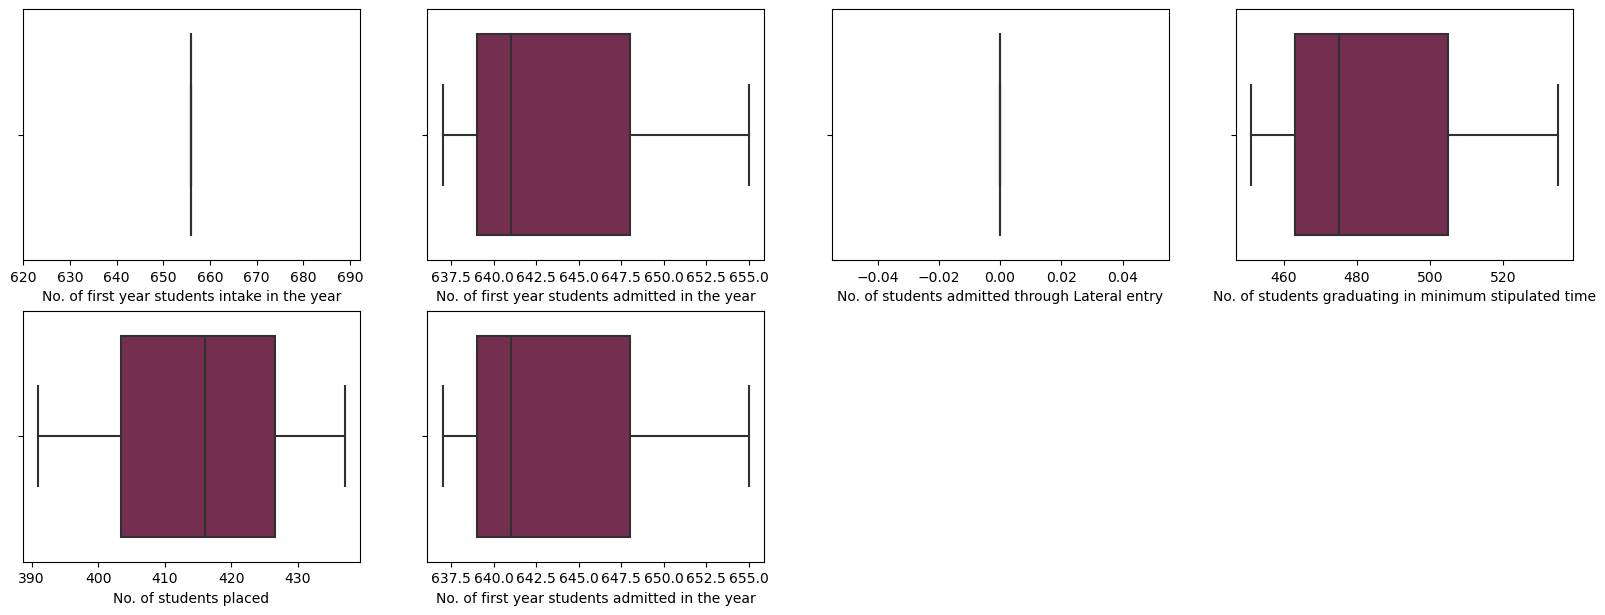

In [170]:
# to check outliers

plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(nirf5_2['No. of first year students intake in the year']);

plt.subplot(4,4,2)
sns.boxplot(nirf5_2['No. of first year students admitted in the year']);

plt.subplot(4,4,3)
sns.boxplot(nirf5_2['No. of students admitted through Lateral entry']);

plt.subplot(4,4,4)
sns.boxplot(nirf5_2['No. of students graduating in minimum stipulated time']);

plt.subplot(4,4,5)
sns.boxplot(nirf5_2['No. of students placed']);

plt.subplot(4,4,6)
sns.boxplot(nirf5_2['No. of first year students admitted in the year']);

In [171]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(nirf5_2_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(nirf5_2_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=nirf5_2_n[column],color='y')
    plt.show()


Description of No. of first year students intake in the year
----------------------------------------------------------------------------
count      3.0
mean     656.0
std        0.0
min      656.0
25%      656.0
50%      656.0
75%      656.0
max      656.0
Name: No. of first year students intake in the year, dtype: float64 

Distribution of No. of first year students intake in the year
----------------------------------------------------------------------------


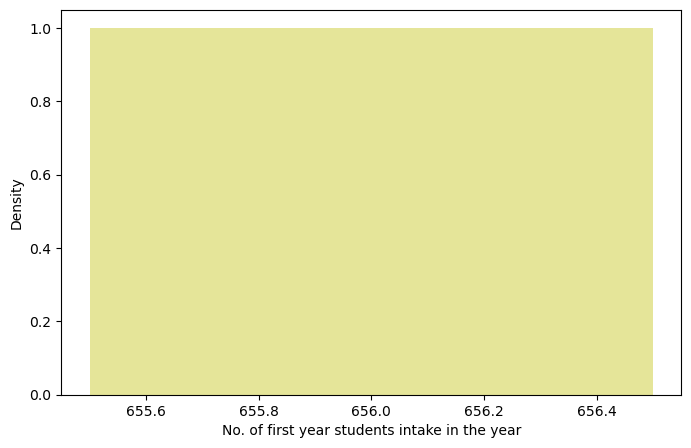

BoxPlot of No. of first year students intake in the year
----------------------------------------------------------------------------


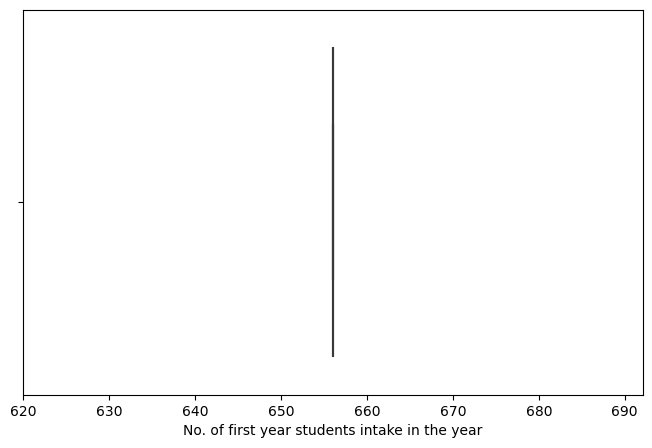

Description of No. of first year students admitted in the year
----------------------------------------------------------------------------
count      3.000000
mean     644.333333
std        9.451631
min      637.000000
25%      639.000000
50%      641.000000
75%      648.000000
max      655.000000
Name: No. of first year students admitted in the year, dtype: float64 

Distribution of No. of first year students admitted in the year
----------------------------------------------------------------------------


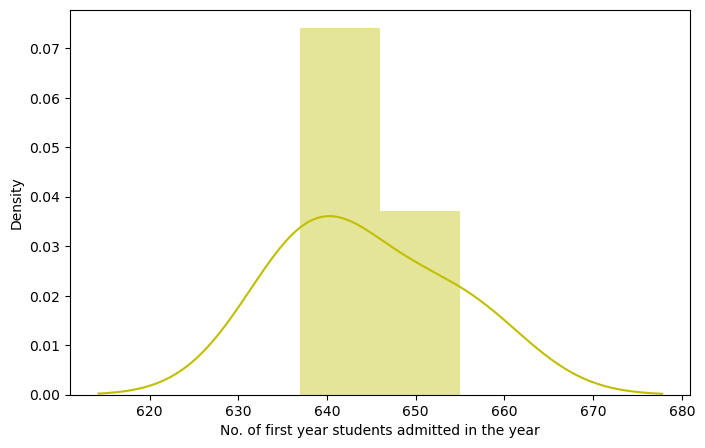

BoxPlot of No. of first year students admitted in the year
----------------------------------------------------------------------------


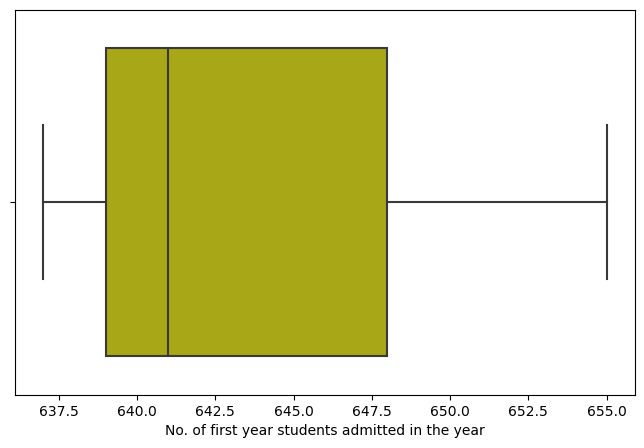

Description of No. of students admitted through Lateral entry
----------------------------------------------------------------------------
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: No. of students admitted through Lateral entry, dtype: float64 

Distribution of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


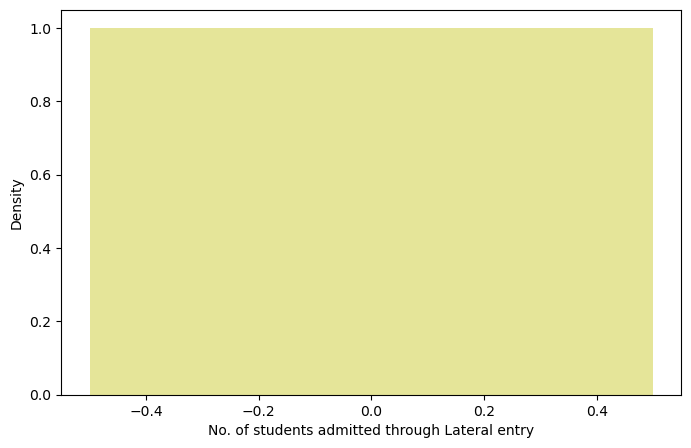

BoxPlot of No. of students admitted through Lateral entry
----------------------------------------------------------------------------


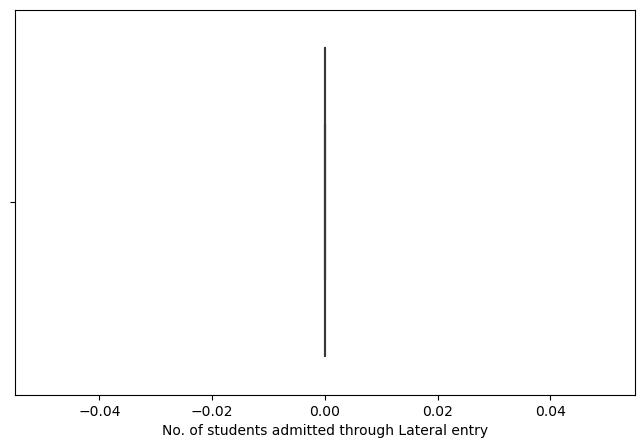

Description of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------
count      3.000000
mean     487.000000
std       43.266615
min      451.000000
25%      463.000000
50%      475.000000
75%      505.000000
max      535.000000
Name: No. of students graduating in minimum stipulated time, dtype: float64 

Distribution of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


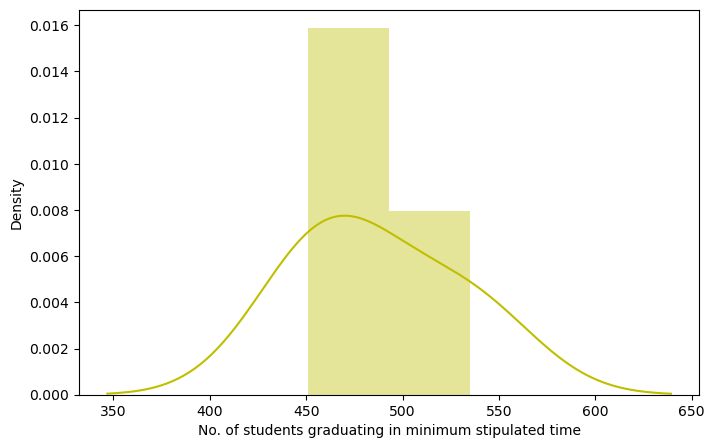

BoxPlot of No. of students graduating in minimum stipulated time
----------------------------------------------------------------------------


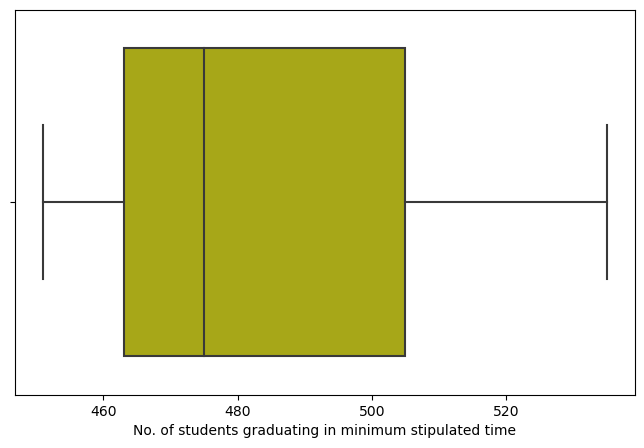

Description of No. of students placed
----------------------------------------------------------------------------
count      3.000000
mean     414.666667
std       23.028967
min      391.000000
25%      403.500000
50%      416.000000
75%      426.500000
max      437.000000
Name: No. of students placed, dtype: float64 

Distribution of No. of students placed
----------------------------------------------------------------------------


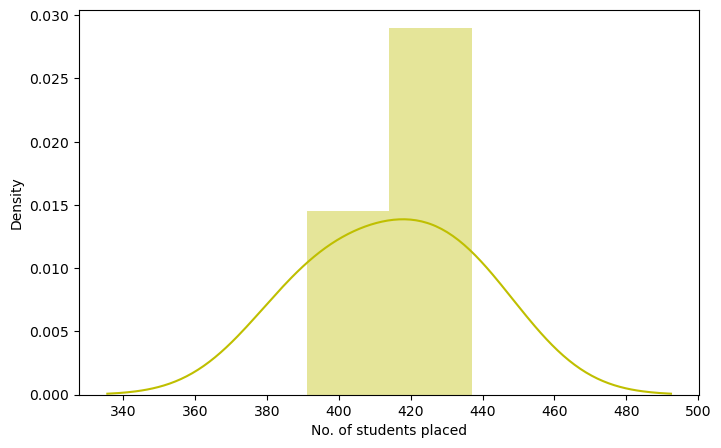

BoxPlot of No. of students placed
----------------------------------------------------------------------------


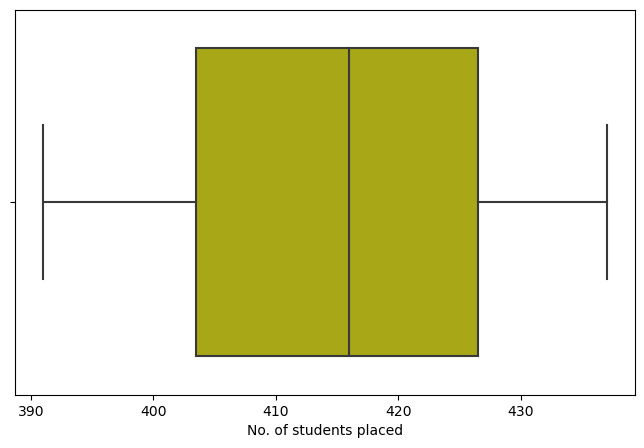

Description of No. of students selected for Higher Studies
----------------------------------------------------------------------------
count     3.000000
mean     43.000000
std      10.535654
min      32.000000
25%      38.000000
50%      44.000000
75%      48.500000
max      53.000000
Name: No. of students selected for Higher Studies, dtype: float64 

Distribution of No. of students selected for Higher Studies
----------------------------------------------------------------------------


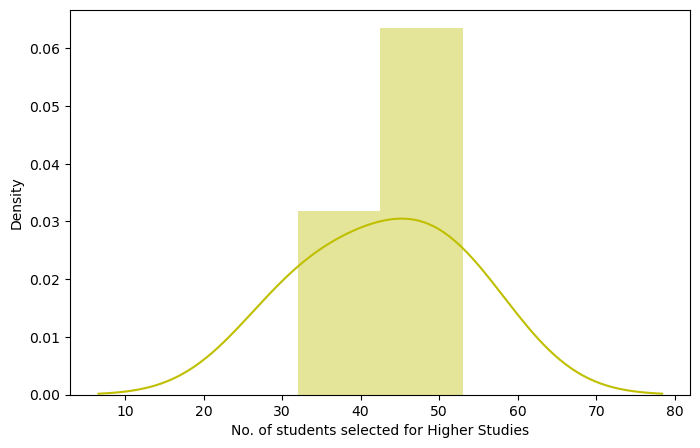

BoxPlot of No. of students selected for Higher Studies
----------------------------------------------------------------------------


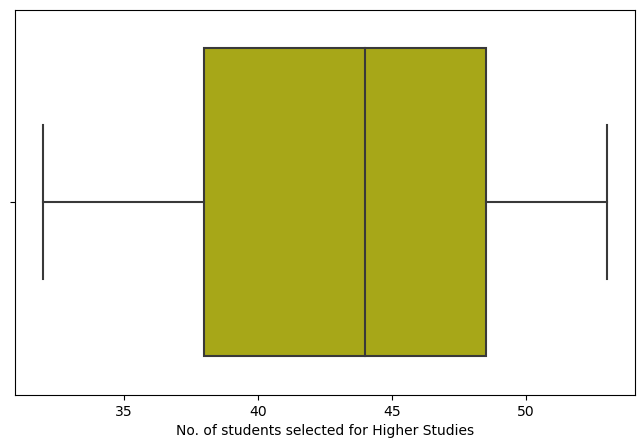

In [172]:
for x in nirf5numericcolumns:
    univariateAnalysis_numeric(x,10)

In [173]:
for column in nirf5_2.columns:
    if nirf5_2[column].dtype == 'object':
        print(column.upper(),': ',nirf5_2[column].nunique())
        print(nirf5_2[column].value_counts().sort_values())
        print('\n')

ACADEMIC YEAR :  3
2014-15    1
2015-16    1
2016-17    1
Name: Academic Year, dtype: int64


MEDIAN SALARY OF PLACED GRADUATES(AMOUNT INRS.) :  3
1275000(Twelve lakh\rSeventy Five\rThousand)           1
1420059(Fourteen\rLakh Twenty\rThousand Fifty Nine)    1
1600000(Sixteen Lakh)                                  1
Name: Median salary of placed graduates(Amount inRs.), dtype: int64




DATA VISUALIZATION & ANALYSIS


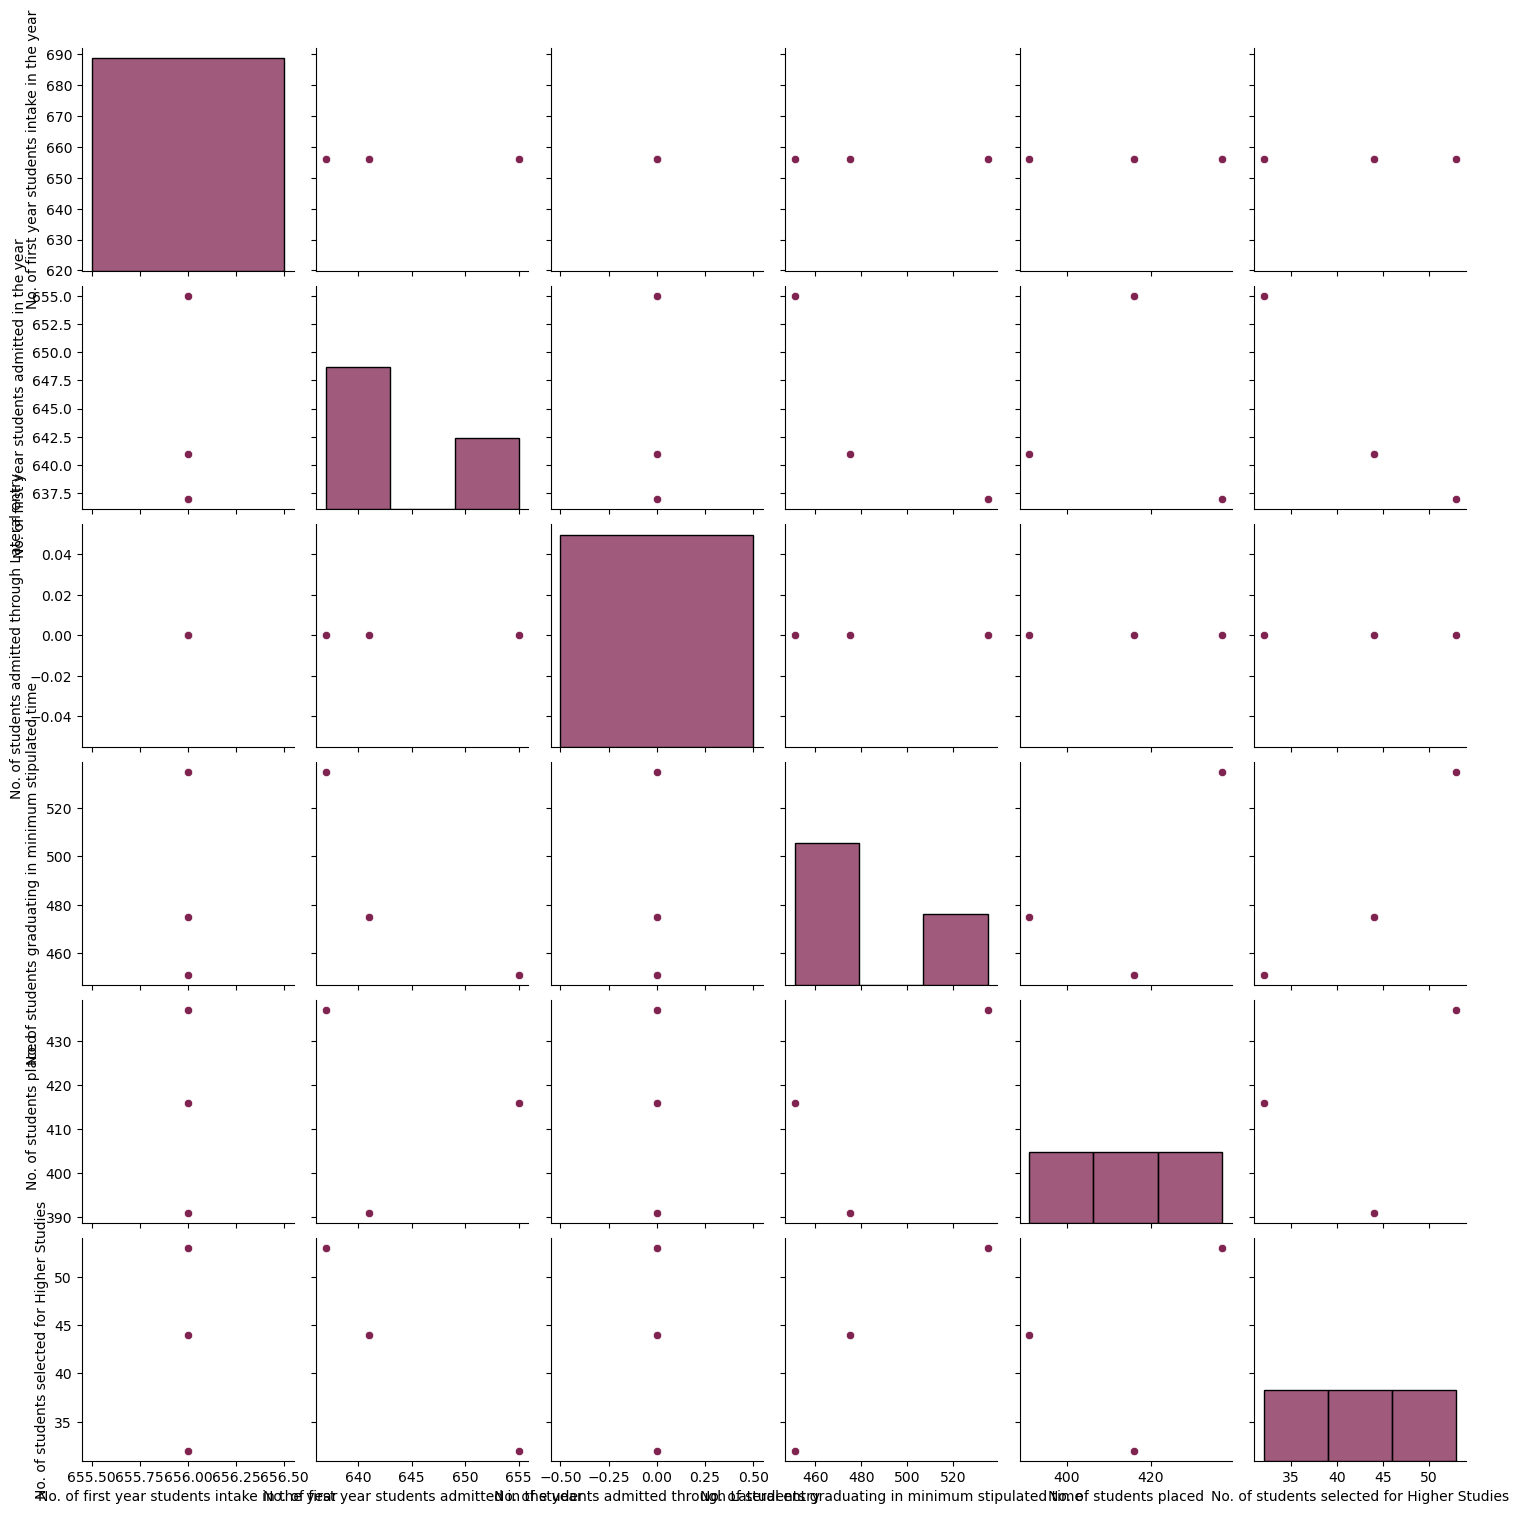

In [174]:
sns.set_palette('twilight_shifted_r')
sns.pairplot(nirf5_2)

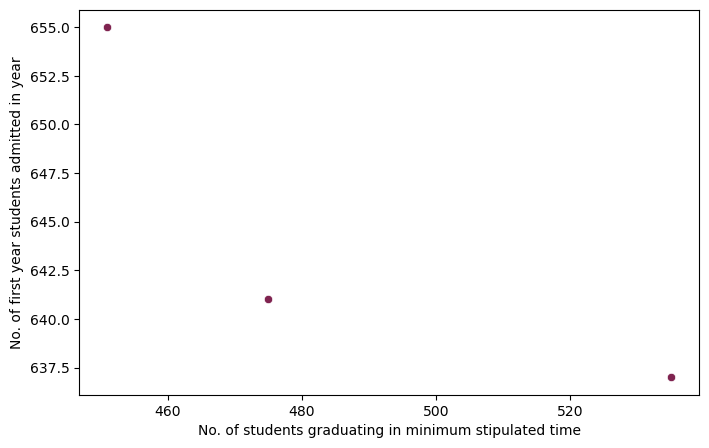

In [175]:
# No. of first year students admitted in year VS No. of students graduating in minimum stipulated time

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=nirf5_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

There seems to be a negative correlation b/w them
with increase in no. of students graduating, no. of students admitted seems to decrease.

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

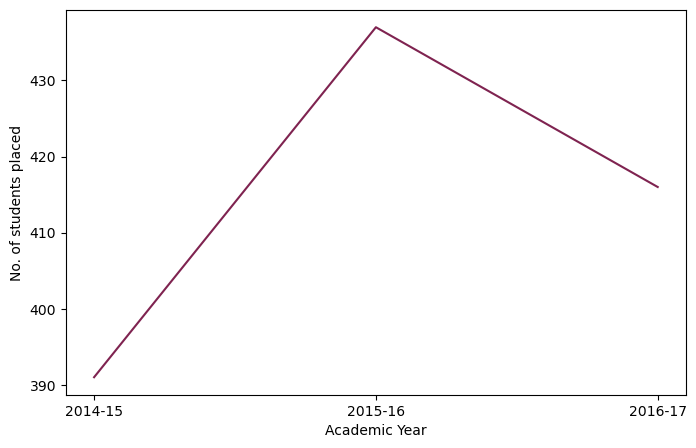

In [176]:
# No. of students placed VS Academic Year

sns.lineplot(data=nirf5_2, y='No. of students placed', x='Academic Year')

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

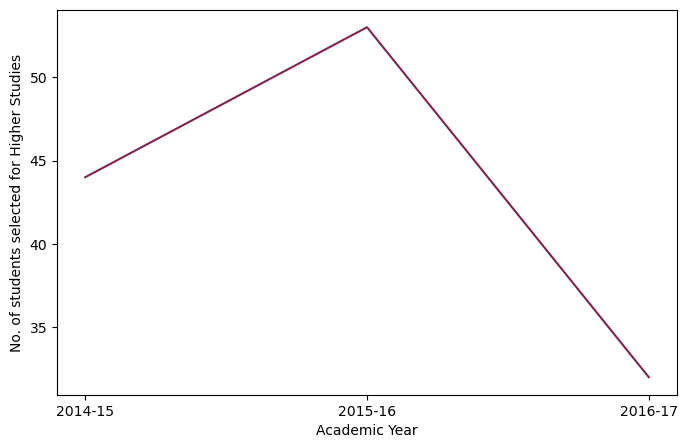

In [177]:
# No. of students selected for Higher Studies VS Academic Year

sns.lineplot(data=nirf5_2, y='No. of students selected for Higher Studies', x='Academic Year')

There is sharpe spike again in Students selected for higher studies in year 2015-16
Both placements and students getting selected got spiked during this year, which checks out with the data and could be due to some underlying cause.

In [196]:
# Funding details.

nirf5_4= nirf5[11]
nirf5_4

Financial Year  \
0           Total no. of Sponsored Projects   
1             Total no. of Funding Agencies   
2  Total Amount Received (Amount in Rupees)   
3                  Amount Received in Words   

                                             2019-20  \
0                                                154   
1                                                 65   
2                                          648432016   
3  Sixty Four Crore Eighty Four lakh Thirty Two T...   

                                             2018-19  \
0                                                700   
1                                                193   
2                                         1349147118   
3  One Three Four Crore Ninety One Lakh Forty Sev...   

                                          2017-18  
0                                             627  
1                                             202  
2                                      2051250000  
3  Two Zero Five Crore Twelve Lakh Fifty Thousand

In [197]:
# Transpose the tha dataframe and set relevant column names

nirf5_4 = nirf5_4.transpose()
nirf5_4.reset_index(inplace=True)
nirf5_4.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
nirf5_11

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             154   
2        2018-19                             700   
3        2017-18                             627   

  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  
1                            65                                 648432016  
2                           193                                1349147118  
3                           202                                2051250000

In [198]:
nirf5_4=nirf5_4.drop(0)
nirf5_4

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             154   
2        2018-19                             700   
3        2017-18                             627   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  \
1                            65                                648432016   
2                           193                               1349147118   
3                           202                               2051250000   

                            Amount Received in Words  
1  Sixty Four Crore Eighty Four lakh Thirty Two T...  
2  One Three Four Crore Ninety One Lakh Forty Sev...  
3     Two Zero Five Crore Twelve Lakh Fifty Thousand

In [199]:
nirf5_4=nirf5_4.drop(['Amount Received in Words'], axis =1)
nirf5_4

Financial Year Total no. of Sponsored Projects  \
1        2019-20                             154   
2        2018-19                             700   
3        2017-18                             627   

  Total no. of Funding Agencies Total Amount Received (Amount in Rupees)  
1                            65                                648432016  
2                           193                               1349147118  
3                           202                               2051250000

In [200]:
# convert Total Amount Received (Amount in Rupees) Column data type from object to int64

print(nirf5_4.dtypes)
nirf5_4 = nirf5_4.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(nirf5_4.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


In [201]:
nirf5_4.describe

<bound method NDFrame.describe of   Financial Year Total no. of Sponsored Projects  \
1        2019-20                             154   
2        2018-19                             700   
3        2017-18                             627   

  Total no. of Funding Agencies  Total Amount Received (Amount in Rupees)  
1                            65                                 648432016  
2                           193                                1349147118  
3                           202                                2051250000  >

In [202]:
print("Median : ")
nirf5_4['Total Amount Received (Amount in Rupees)'].median()

Median : 


1349147118.0

In [203]:
print("Maximum : ")
nirf5_4['Total Amount Received (Amount in Rupees)'].max()

Maximum : 


2051250000

In [204]:
print("Minimum : ")
nirf5_4['Total Amount Received (Amount in Rupees)'].min()

Minimum : 


648432016

In [184]:
nirf5_9 = nirf5[9]
nirf5_9

Financial Year  \
0                                                NaN   
1  Annual Capital Expenditure on Academic Activit...   
2    Library ( Books, Journals and e-Resources only)   
3        New Equipment and software for Laboratories   
4                              Engineering Workshops   
5  Other expenditure on creation of Capital Asset...   

                                             2019-20  \
0                                    Utilised Amount   
1                                                NaN   
2  227325689 (Twenty Two Crores Seventy Three Lak...   
3  224238505 (Twenty Two Crores Forty Two Lakhs T...   
4                                           0 (Zero)   
5  275567881 (Twenty Seven Crores Fifty Five Lakh...   

                                             2018-19  \
0                                    Utilised Amount   
1                                                NaN   
2  220397215 (twenty two crore three lakh ninety ...   
3  117316668 (eleven crore seventy three lakh six...   
4                                           0 (zero)   
5  589182201 (fifty eight crore ninety one lakh e...   

                                             2017-18  
0                                    Utilised Amount  
1                                                NaN  
2  175230715 (seventeen crore fifty two lakh thir...  
3  284543926 (twenty eight crore forty five lakh ...  
4                                           0 (zero)  
5  356546168 (thirty five crore sixty five lakh f...

In [185]:
nirf5_9 = nirf5_9.transpose()
nirf5_9

0  \
Financial Year              NaN   
2019-20         Utilised Amount   
2018-19         Utilised Amount   
2017-18         Utilised Amount   

                                                                1  \
Financial Year  Annual Capital Expenditure on Academic Activit...   
2019-20                                                       NaN   
2018-19                                                       NaN   
2017-18                                                       NaN   

                                                                2  \
Financial Year    Library ( Books, Journals and e-Resources only)   
2019-20         227325689 (Twenty Two Crores Seventy Three Lak...   
2018-19         220397215 (twenty two crore three lakh ninety ...   
2017-18         175230715 (seventeen crore fifty two lakh thir...   

                                                                3  \
Financial Year        New Equipment and software for Laboratories   
2019-20         224238505 (Twenty Two Crores Forty Two Lakhs T...   
2018-19         117316668 (eleven crore seventy three lakh six...   
2017-18         284543926 (twenty eight crore forty five lakh ...   

                                    4  \
Financial Year  Engineering Workshops   
2019-20                      0 (Zero)   
2018-19                      0 (zero)   
2017-18                      0 (zero)   

                                                                5  
Financial Year  Other expenditure on creation of Capital Asset...  
2019-20         275567881 (Twenty Seven Crores Fifty Five Lakh...  
2018-19         589182201 (fifty eight crore ninety one lakh e...  
2017-18         356546168 (thirty five crore sixty five lakh f...

In [186]:
nirf5_9.columns = ['Drop1','Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
nirf5_9.drop('Drop1', axis =1, inplace=True)
nirf5_9.drop('Drop', axis =1, inplace=True)
nirf5_9

Library  \
Financial Year    Library ( Books, Journals and e-Resources only)   
2019-20         227325689 (Twenty Two Crores Seventy Three Lak...   
2018-19         220397215 (twenty two crore three lakh ninety ...   
2017-18         175230715 (seventeen crore fifty two lakh thir...   

                                             Software & Equipment  \
Financial Year        New Equipment and software for Laboratories   
2019-20         224238505 (Twenty Two Crores Forty Two Lakhs T...   
2018-19         117316668 (eleven crore seventy three lakh six...   
2017-18         284543926 (twenty eight crore forty five lakh ...   

                         Eng Workshop  \
Financial Year  Engineering Workshops   
2019-20                      0 (Zero)   
2018-19                      0 (zero)   
2017-18                      0 (zero)   

                                                           Others  
Financial Year  Other expenditure on creation of Capital Asset...  
2019-20         275567881 (Twenty Seven Crores Fifty Five Lakh...  
2018-19         589182201 (fifty eight crore ninety one lakh e...  
2017-18         356546168 (thirty five crore sixty five lakh f...

In [187]:
nirf5_9.reset_index(drop = True, inplace=True)

nirf5_9 = nirf5_9.drop(0)

In [188]:
fin_yr = ['2019-20', '2018-19', '2017-18']
nirf5_9['Financial Year'] = fin_yr

In [189]:
nirf5_9['Library'] = nirf5_9['Library'].str.replace('\d+', '')
nirf5_9['Software & Equipment'] =nirf5_9['Software & Equipment'].str.replace('\d+', '')
nirf5_9['Eng Workshop'] = nirf5_9['Eng Workshop'].str.replace('\d+', '')
nirf5_9['Others'] = nirf5_9['Others'].str.replace('\d+', '')

In [190]:
nirf5_9

Library  \
1   (Twenty Two Crores Seventy Three Lakhs Twenty...   
2   (twenty two crore three lakh ninety seven tho...   
3   (seventeen crore fifty two lakh thirty thousa...   

                                Software & Equipment Eng Workshop  \
1   (Twenty Two Crores Forty Two Lakhs Thirty Eig...       (Zero)   
2   (eleven crore seventy three lakh sixteen thou...       (zero)   
3   (twenty eight crore forty five lakh forty thr...       (zero)   

                                              Others Financial Year  
1   (Twenty Seven Crores Fifty Five Lakhs Sixty S...        2019-20  
2   (fifty eight crore ninety one lakh eight two ...        2018-19  
3   (thirty five crore sixty five lakh forty six ...        2017-18